In [1]:
import pandas as pd
from matplotlib import pyplot as plt

Data for inflation per voiedoship taken from https://stat.gov.pl/wyszukiwarka/?query=tag:wska%C5%BAniki+cen+towar%C3%B3w+i+us%C5%82ug+konsumpcyjnych+wed%C5%82ug+wojew%C3%B3dztw#!/strona-1 

In [2]:
data = pd.read_csv("inflation_data.csv", parse_dates = ["date_of_measurement"])

In [3]:
data.head()

,region,q_prev_year,q_prev,date_of_measurement
0,poland,101.2,100.2,2019-03-31
1,dolnośląskie,100.8,100.3,2019-03-31
2,kujawsko-pomorskie,100.9,100.0,2019-03-31
3,lubelskie,101.0,100.0,2019-03-31
4,lubuskie,101.4,100.1,2019-03-31


Columns:\
region - voivodeships plus 1 region 'Poland' for stats for whole country\
q_prev_year - price comparing to base reference equal 100 for the analogous quarter of the previous year\
q_prev       - price comparing to base reference equal 100 for the previous quarter\
date_of_measurement - date approximated to the last day of the quarter.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   region               204 non-null    object        
 1   q_prev_year          204 non-null    float64       
 2   q_prev               204 non-null    float64       
 3   date_of_measurement  204 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 6.5+ KB


As explained earlier, inflation is expressed with reference base reference equal to 100. We are interested only in comparing prices to the analogous quarter of the previous year, not to the previous quarter.

In [5]:
data['inflation'] = data['q_prev_year']-100
data = data.drop('q_prev', axis=1)

In [6]:
data.head()

,region,q_prev_year,date_of_measurement,inflation
0,poland,101.2,2019-03-31,1.2
1,dolnośląskie,100.8,2019-03-31,0.8
2,kujawsko-pomorskie,100.9,2019-03-31,0.9
3,lubelskie,101.0,2019-03-31,1.0
4,lubuskie,101.4,2019-03-31,1.4


Timeseries diagram:

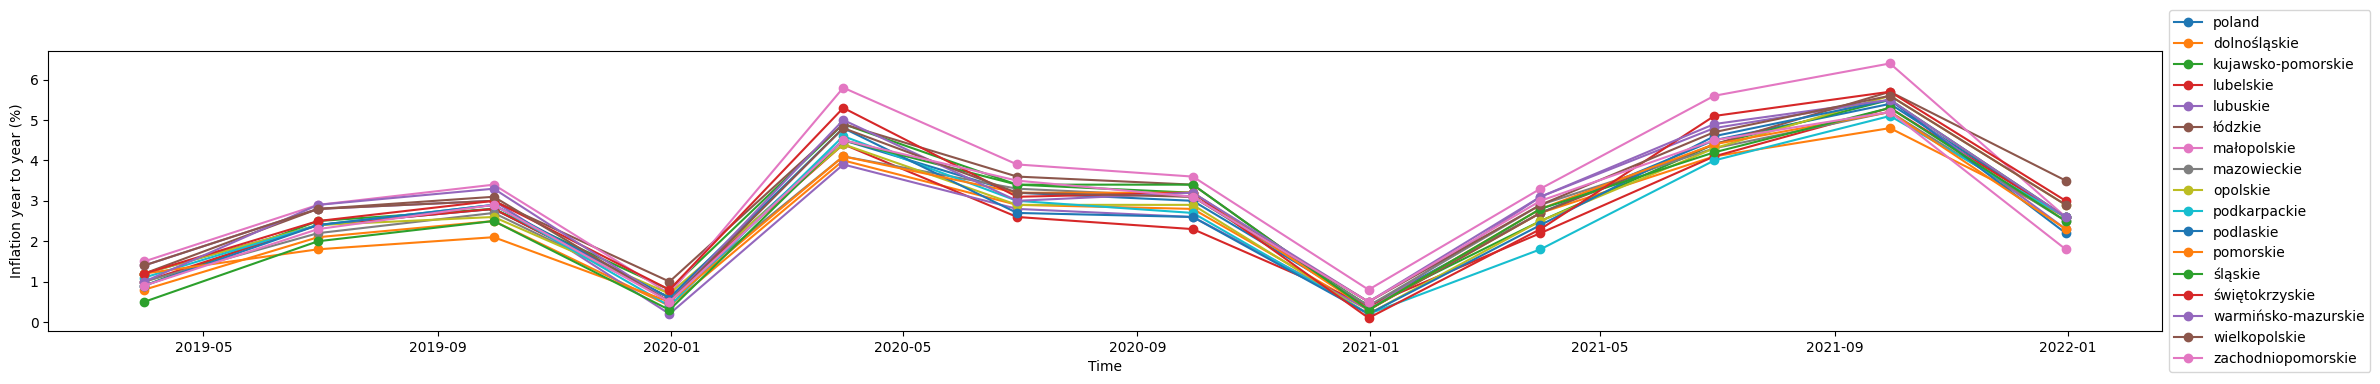

In [7]:
regions = list(data['region'].unique())
fig = plt.figure(figsize=(60,8))
ax1 = fig.add_subplot(2, 2, 1)
plt.xlabel("Time")
plt.ylabel("Inflation year to year (%)")

for rg in regions:
    rg_filtr = data['region'] == rg
    plt.plot(data['date_of_measurement'][rg_filtr],data['inflation'][rg_filtr],marker = "o")

plt.legend(regions,loc='center left', bbox_to_anchor=(1, 0.5))
#plt.legend(regions)
plt.show()

Let's build dictionary of cummulative inflation score per each region over 3 years 2019-2021:

In [8]:
df_cum_inf= round(data[data['region']!='poland'].groupby('region')['inflation'].mean(),3)
dt_cum_inf = df_cum_inf.to_dict()
dt_cum_inf

{'dolnośląskie': 2.5,
 'kujawsko-pomorskie': 2.825,
 'lubelskie': 2.558,
 'lubuskie': 2.725,
 'mazowieckie': 2.692,
 'małopolskie': 3.375,
 'opolskie': 2.717,
 'podkarpackie': 2.567,
 'podlaskie': 2.65,
 'pomorskie': 2.592,
 'warmińsko-mazurskie': 2.958,
 'wielkopolskie': 2.958,
 'zachodniopomorskie': 2.725,
 'łódzkie': 3.042,
 'śląskie': 2.642,
 'świętokrzyskie': 2.942}

Building color mapping per each quartile of inflation values in the dict:

In [9]:
inf_quratiles = pd.qcut(list(dt_cum_inf.values()),4, labels = ['green','yellow','orange','red'])
qt_color_mapping = dict(list(zip(list(dt_cum_inf.values()),inf_quratiles)))

In [10]:
qt_color_mapping

{2.5: 'green',
 2.825: 'orange',
 2.558: 'green',
 2.725: 'orange',
 2.692: 'yellow',
 3.375: 'red',
 2.717: 'yellow',
 2.567: 'green',
 2.65: 'yellow',
 2.592: 'green',
 2.958: 'red',
 3.042: 'red',
 2.642: 'yellow',
 2.942: 'orange'}

GeoJSON layer for voivodeships boundaries, source: https://github.com/ppatrzyk/polska-geojson?tab=readme-ov-file:

In [11]:
woj_data = {"type":"FeatureCollection", "features": [
{"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[19.4698,50.9154],[19.4628,50.91],[19.4642,50.8963],[19.4711,50.8859],[19.4863,50.8797],[19.5092,50.8811],[19.5251,50.8941],[19.5523,50.9001],[19.5697,50.9083],[19.5867,50.9053],[19.6139,50.8773],[19.618,50.8805],[19.6422,50.8788],[19.6616,50.8744],[19.6578,50.8633],[19.6701,50.8487],[19.6829,50.8452],[19.7279,50.8433],[19.7411,50.852],[19.7471,50.866],[19.7923,50.8508],[19.8194,50.8385],[19.8257,50.825],[19.8186,50.8207],[19.8205,50.8076],[19.8095,50.8036],[19.7842,50.8178],[19.7761,50.7995],[19.7954,50.7837],[19.7705,50.7773],[19.7417,50.7547],[19.7266,50.771],[19.721,50.7631],[19.7058,50.7618],[19.7044,50.7523],[19.7195,50.733],[19.7129,50.7292],[19.755,50.716],[19.7788,50.7217],[19.7937,50.7206],[19.8108,50.7254],[19.8083,50.7059],[19.8474,50.7018],[19.8504,50.6906],[19.8717,50.693],[19.873,50.683],[19.8616,50.6795],[19.8587,50.671],[19.8445,50.6668],[19.8352,50.6514],[19.8571,50.6459],[19.8829,50.6453],[19.8888,50.6366],[19.9098,50.642],[19.9222,50.6394],[19.909,50.6299],[19.8984,50.616],[19.8619,50.6217],[19.851,50.6122],[19.8445,50.5986],[19.8409,50.5907],[19.8249,50.5829],[19.8175,50.5735],[19.804,50.5656],[19.7897,50.5685],[19.7887,50.5545],[19.8417,50.5551],[19.8548,50.5439],[19.8828,50.5425],[19.9022,50.5393],[19.9117,50.5118],[19.9392,50.5026],[19.95,50.5048],[19.9523,50.4942],[19.964,50.4887],[19.9612,50.4768],[19.9397,50.4789],[19.9271,50.475],[19.9005,50.4735],[19.8921,50.4662],[19.903,50.4568],[19.8969,50.4524],[19.853,50.4474],[19.8535,50.4351],[19.8254,50.438],[19.8071,50.4361],[19.8,50.4439],[19.782,50.4401],[19.7695,50.4443],[19.7487,50.4421],[19.7318,50.4443],[19.7248,50.4409],[19.7019,50.4482],[19.6943,50.4351],[19.6776,50.4339],[19.6652,50.4237],[19.6717,50.4158],[19.6366,50.4094],[19.6271,50.4146],[19.6167,50.4062],[19.6058,50.4042],[19.5953,50.409],[19.5785,50.4072],[19.5688,50.4115],[19.5501,50.4128],[19.536,50.4203],[19.5185,50.4167],[19.5045,50.4011],[19.4876,50.397],[19.4917,50.366],[19.4603,50.3729],[19.4594,50.3634],[19.4822,50.3569],[19.4876,50.3473],[19.4806,50.3336],[19.4839,50.3236],[19.4595,50.3228],[19.451,50.3189],[19.4153,50.3317],[19.4147,50.3228],[19.4044,50.3144],[19.4106,50.3026],[19.3881,50.2892],[19.3816,50.273],[19.3615,50.2641],[19.3492,50.2656],[19.324,50.2588],[19.3401,50.2496],[19.3931,50.2334],[19.4111,50.2333],[19.4287,50.2255],[19.442,50.2266],[19.4025,50.2019],[19.3832,50.1997],[19.3637,50.1905],[19.337,50.1897],[19.3392,50.1816],[19.3518,50.177],[19.3451,50.1647],[19.3538,50.1539],[19.3316,50.1442],[19.2883,50.1404],[19.2706,50.1437],[19.2778,50.1197],[19.2592,50.117],[19.2494,50.1307],[19.2247,50.0973],[19.2232,50.0881],[19.2133,50.0741],[19.2224,50.0648],[19.1959,50.0652],[19.1779,50.0572],[19.1693,50.0604],[19.1461,50.0463],[19.1494,50.041],[19.1362,50.0332],[19.1429,50.0284],[19.1363,50.0191],[19.119,50.0092],[19.1181,49.9822],[19.1243,49.9664],[19.12,49.9607],[19.0981,49.9522],[19.1063,49.9427],[19.1186,49.9389],[19.1617,49.9395],[19.1688,49.9466],[19.1849,49.9501],[19.1865,49.9192],[19.1945,49.9133],[19.1945,49.886],[19.1729,49.8799],[19.1571,49.8651],[19.1709,49.853],[19.1969,49.8604],[19.2026,49.8716],[19.2371,49.8648],[19.2709,49.8607],[19.2892,49.8505],[19.2866,49.8164],[19.3033,49.7959],[19.3158,49.7845],[19.3168,49.7779],[19.3499,49.7714],[19.366,49.7778],[19.373,49.7707],[19.3867,49.7696],[19.3995,49.7617],[19.4202,49.7722],[19.4364,49.7571],[19.446,49.7426],[19.4446,49.7349],[19.4287,49.7275],[19.4293,49.7195],[19.4105,49.7101],[19.4004,49.7108],[19.3907,49.6984],[19.3738,49.6926],[19.3895,49.6843],[19.3918,49.6773],[19.4071,49.6786],[19.4138,49.6728],[19.4411,49.6805],[19.4594,49.6764],[19.465,49.6679],[19.4778,49.6608],[19.4689,49.648],[19.4808,49.6244],[19.4674,49.6138],[19.443,49.6092],[19.4446,49.6005],[19.4096,49.5918],[19.4076,49.5808],[19.4002,49.5742],[19.3714,49.5674],[19.3666,49.5537],[19.3686,49.545],[19.3624,49.5361],[19.347,49.5359],[19.3188,49.5311],[19.3156,49.5366],[19.2929,49.5332],[19.2815,49.5353],[19.2643,49.5324],[19.261,49.5273],[19.2336,49.5109],[19.237,49.5017],[19.2316,49.4878],[19.2209,49.475],[19.2283,49.4637],[19.219,49.4486],[19.2077,49.4518],[19.1965,49.4469],[19.1857,49.4347],[19.1974,49.4146],[19.1876,49.4097],[19.1773,49.414],[19.1534,49.4038],[19.1375,49.41],[19.1224,49.4026],[19.1073,49.4037],[19.0915,49.416],[19.0727,49.418],[19.0539,49.4152],[19.0447,49.4004],[19.027,49.394],[18.9896,49.3984],[18.9799,49.3952],[18.9712,49.4021],[18.9687,49.4133],[18.9857,49.4218],[18.9883,49.4318],[18.9778,49.4405],[18.9739,49.4517],[18.9608,49.4547],[18.9702,49.4768],[18.9605,49.4828],[18.9716,49.5043],[18.9417,49.5189],[18.9128,49.5176],[18.8971,49.5144],[18.8691,49.519],[18.843,49.5185],[18.8373,49.5236],[18.8441,49.5341],[18.8575,49.5379],[18.8592,49.5507],[18.8376,49.5622],[18.8293,49.5949],[18.8232,49.6041],[18.8243,49.6145],[18.8063,49.6513],[18.8101,49.671],[18.8046,49.6789],[18.7806,49.6854],[18.7641,49.6846],[18.7512,49.6769],[18.7355,49.6824],[18.7192,49.6838],[18.7065,49.7044],[18.6937,49.7066],[18.6682,49.7034],[18.6526,49.7077],[18.6252,49.7224],[18.6288,49.7263],[18.6291,49.7473],[18.6149,49.7534],[18.6101,49.7711],[18.5971,49.7847],[18.6,49.7894],[18.593,49.8017],[18.5827,49.8091],[18.5823,49.8181],[18.5694,49.8344],[18.5893,49.8455],[18.5837,49.8523],[18.6039,49.8571],[18.6024,49.8647],[18.5719,49.8722],[18.566,49.8831],[18.5801,49.9055],[18.5745,49.915],[18.559,49.918],[18.5448,49.9259],[18.535,49.9003],[18.5081,49.9028],[18.4847,49.9092],[18.4679,49.9156],[18.4642,49.9218],[18.4443,49.9234],[18.4327,49.9285],[18.4308,49.9382],[18.3921,49.934],[18.3677,49.9368],[18.356,49.9441],[18.3409,49.9257],[18.3333,49.9276],[18.3217,49.9159],[18.2992,49.9238],[18.2792,49.9401],[18.2818,49.9505],[18.278,49.9635],[18.2338,49.971],[18.2206,49.9689],[18.2065,49.9979],[18.1932,49.9946],[18.183,50.0004],[18.168,49.9985],[18.169,49.9864],[18.1538,49.9824],[18.1469,49.9916],[18.1311,49.9981],[18.117,49.9942],[18.1048,50.0009],[18.0933,50.015],[18.103,50.0226],[18.0859,50.0317],[18.0894,50.0441],[18.066,50.0481],[18.0617,50.0591],[18.0498,50.0584],[18.035,50.0658],[18.0575,50.0878],[18.0591,50.0963],[18.0723,50.1098],[18.0608,50.1159],[18.068,50.1295],[18.0502,50.1381],[18.0661,50.157],[18.0566,50.1607],[18.0778,50.174],[18.099,50.1772],[18.1105,50.1673],[18.1335,50.1844],[18.148,50.1817],[18.1624,50.1891],[18.1855,50.1869],[18.2051,50.1903],[18.2492,50.1926],[18.2352,50.202],[18.2359,50.2135],[18.2512,50.2226],[18.2718,50.2207],[18.2752,50.2249],[18.3084,50.2313],[18.313,50.2407],[18.3262,50.2412],[18.3469,50.2473],[18.3621,50.2473],[18.362,50.2566],[18.3766,50.2539],[18.4059,50.2547],[18.4259,50.249],[18.4205,50.2608],[18.427,50.2687],[18.4061,50.2771],[18.4076,50.2899],[18.3932,50.3054],[18.3921,50.3134],[18.409,50.3172],[18.3947,50.3378],[18.3733,50.3463],[18.3577,50.3566],[18.3728,50.3611],[18.3768,50.3803],[18.3906,50.3854],[18.3936,50.3915],[18.3781,50.4135],[18.3699,50.4158],[18.3698,50.4158],[18.3699,50.4158],[18.3698,50.4158],[18.3656,50.4245],[18.3872,50.4323],[18.3874,50.4453],[18.3818,50.449],[18.3838,50.4612],[18.3796,50.4788],[18.3838,50.4836],[18.4097,50.4746],[18.44,50.4807],[18.4526,50.4769],[18.452,50.4626],[18.4813,50.4583],[18.486,50.4699],[18.475,50.4731],[18.4672,50.4887],[18.4665,50.4995],[18.4479,50.4994],[18.4382,50.5272],[18.4299,50.5316],[18.4356,50.5447],[18.4779,50.5527],[18.506,50.5492],[18.5365,50.5423],[18.559,50.5401],[18.5727,50.5481],[18.5883,50.5472],[18.6054,50.5527],[18.6162,50.5692],[18.598,50.5686],[18.5908,50.5778],[18.6017,50.6045],[18.5901,50.6064],[18.5873,50.6138],[18.5174,50.6255],[18.5168,50.6396],[18.5064,50.6413],[18.5133,50.6581],[18.4941,50.6643],[18.4994,50.6895],[18.4839,50.7083],[18.5069,50.7132],[18.509,50.7261],[18.5483,50.732],[18.5492,50.7491],[18.5705,50.7447],[18.581,50.7525],[18.55,50.7596],[18.5272,50.7801],[18.5199,50.7963],[18.5219,50.8024],[18.5622,50.8089],[18.5629,50.8197],[18.558,50.8341],[18.5882,50.8516],[18.6161,50.8536],[18.637,50.8927],[18.6545,50.9147],[18.6488,50.9313],[18.6303,50.9312],[18.6124,50.9551],[18.6222,50.9656],[18.63,50.9638],[18.6483,50.969],[18.6483,50.9693],[18.6636,50.9706],[18.6682,50.989],[18.6562,51.005],[18.678,51.008],[18.6954,51.0157],[18.672,51.0491],[18.673,51.0569],[18.7029,51.0644],[18.7315,51.0664],[18.7494,51.0623],[18.7811,51.0658],[18.8029,51.0634],[18.8179,51.0682],[18.863,51.0727],[18.8835,51.059],[18.8955,51.0666],[18.9009,51.08],[18.9189,51.098],[18.9324,51.0931],[18.9554,51.0902],[18.9699,51.0806],[18.9931,51.0762],[19.0116,51.0664],[19.0157,51.0527],[19.0511,51.0426],[19.0563,51.0348],[19.0727,51.0355],[19.0954,51.0311],[19.1044,51.0263],[19.1108,51.0121],[19.1236,50.9996],[19.1327,51.0108],[19.1497,51.0096],[19.1449,51.0018],[19.1617,51.0006],[19.165,50.9946],[19.2065,50.9855],[19.2242,50.9859],[19.2407,50.9904],[19.2562,51.0063],[19.2439,51.0249],[19.245,51.0375],[19.2605,51.0311],[19.2918,51.0455],[19.3227,51.0462],[19.3314,51.0388],[19.3185,51.0282],[19.3186,51.0201],[19.3292,51.0132],[19.3474,51.0109],[19.3622,51.0039],[19.3562,50.9926],[19.3746,50.9944],[19.3867,51.0001],[19.4021,50.994],[19.4018,50.9885],[19.4132,50.9751],[19.4322,50.9649],[19.438,50.9439],[19.4633,50.9259],[19.4698,50.9154]]]},"properties":{"id":1,"nazwa":"śląskie"},"id":0},
{"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[17.8122,51.1349],[17.8234,51.118],[17.8648,51.1138],[17.8854,51.1037],[17.9056,51.107],[17.9173,51.1127],[17.9395,51.1089],[18.0151,51.1271],[18.0394,51.131],[18.0754,51.147],[18.0819,51.1661],[18.0938,51.1566],[18.1084,51.1559],[18.126,51.1691],[18.1372,51.172],[18.1637,51.1725],[18.1667,51.1647],[18.1869,51.1571],[18.2202,51.1548],[18.2399,51.1588],[18.2596,51.1576],[18.2779,51.1477],[18.289,51.1465],[18.3052,51.1353],[18.315,51.134],[18.3326,51.1392],[18.3536,51.1362],[18.3652,51.1382],[18.3817,51.1288],[18.4065,51.1241],[18.4189,51.1259],[18.4219,51.1171],[18.4543,51.1151],[18.4645,51.12],[18.4697,51.1044],[18.4814,51.0997],[18.4987,51.0996],[18.5156,51.1043],[18.5177,51.113],[18.5155,51.1336],[18.5208,51.1403],[18.5537,51.1388],[18.5676,51.119],[18.5623,51.1065],[18.5808,51.0903],[18.5776,51.082],[18.6083,51.0817],[18.6235,51.0769],[18.6232,51.0766],[18.6232,51.076],[18.6232,51.0756],[18.6232,51.0755],[18.6375,51.0634],[18.6607,51.0546],[18.673,51.0569],[18.672,51.0491],[18.6954,51.0157],[18.678,51.008],[18.6562,51.005],[18.6682,50.989],[18.6636,50.9706],[18.6483,50.9693],[18.6483,50.969],[18.63,50.9638],[18.6222,50.9656],[18.6124,50.9551],[18.6303,50.9312],[18.6488,50.9313],[18.6545,50.9147],[18.637,50.8927],[18.6161,50.8536],[18.5882,50.8516],[18.558,50.8341],[18.5629,50.8197],[18.5622,50.8089],[18.5219,50.8024],[18.5199,50.7963],[18.5272,50.7801],[18.55,50.7596],[18.581,50.7525],[18.5705,50.7447],[18.5492,50.7491],[18.5483,50.732],[18.509,50.7261],[18.5069,50.7132],[18.4839,50.7083],[18.4994,50.6895],[18.4941,50.6643],[18.5133,50.6581],[18.5064,50.6413],[18.5168,50.6396],[18.5174,50.6255],[18.5873,50.6138],[18.5901,50.6064],[18.6017,50.6045],[18.5908,50.5778],[18.598,50.5686],[18.6162,50.5692],[18.6054,50.5527],[18.5883,50.5472],[18.5727,50.5481],[18.559,50.5401],[18.5365,50.5423],[18.506,50.5492],[18.4779,50.5527],[18.4356,50.5447],[18.4299,50.5316],[18.4382,50.5272],[18.4479,50.4994],[18.4665,50.4995],[18.4672,50.4887],[18.475,50.4731],[18.486,50.4699],[18.4813,50.4583],[18.452,50.4626],[18.4526,50.4769],[18.44,50.4807],[18.4097,50.4746],[18.3838,50.4836],[18.3796,50.4788],[18.3838,50.4612],[18.3818,50.449],[18.3874,50.4453],[18.3872,50.4323],[18.3656,50.4245],[18.3698,50.4158],[18.3699,50.4158],[18.3698,50.4158],[18.3699,50.4158],[18.3781,50.4135],[18.3936,50.3915],[18.3906,50.3854],[18.3768,50.3803],[18.3728,50.3611],[18.3577,50.3566],[18.3733,50.3463],[18.3947,50.3378],[18.409,50.3172],[18.3921,50.3134],[18.3932,50.3054],[18.4076,50.2899],[18.4061,50.2771],[18.427,50.2687],[18.4205,50.2608],[18.4259,50.249],[18.4059,50.2547],[18.3766,50.2539],[18.362,50.2566],[18.3621,50.2473],[18.3469,50.2473],[18.3262,50.2412],[18.313,50.2407],[18.3084,50.2313],[18.2752,50.2249],[18.2718,50.2207],[18.2512,50.2226],[18.2359,50.2135],[18.2352,50.202],[18.2492,50.1926],[18.2051,50.1903],[18.1855,50.1869],[18.1624,50.1891],[18.148,50.1817],[18.1335,50.1844],[18.1105,50.1673],[18.099,50.1772],[18.0778,50.174],[18.0566,50.1607],[18.0661,50.157],[18.0502,50.1381],[18.068,50.1295],[18.0608,50.1159],[18.0723,50.1098],[18.0591,50.0963],[18.0575,50.0878],[18.035,50.0658],[18.0052,50.0535],[18.0088,50.0313],[18.0247,50.0388],[18.0434,50.0367],[18.049,50.0275],[18.0463,50.0159],[18.0354,50.011],[18.0066,50.0114],[17.9916,50.0147],[17.9842,50.0055],[17.9731,50.0086],[17.954,50.0051],[17.9229,49.9787],[17.9092,49.9765],[17.8852,49.9793],[17.8686,49.9725],[17.8266,49.9942],[17.8369,50.0036],[17.8277,50.0113],[17.8042,50.0124],[17.7916,50.0192],[17.7779,50.0201],[17.7704,50.0358],[17.7719,50.0459],[17.7568,50.0609],[17.7499,50.0774],[17.7298,50.0899],[17.7309,50.0972],[17.7051,50.1144],[17.6833,50.1173],[17.6766,50.103],[17.6503,50.1108],[17.6391,50.1314],[17.6108,50.1401],[17.5927,50.1599],[17.6012,50.1696],[17.6267,50.1704],[17.6282,50.1716],[17.6282,50.1717],[17.6282,50.1716],[17.6282,50.1717],[17.6283,50.1718],[17.6286,50.1719],[17.629,50.1723],[17.6293,50.1726],[17.6293,50.1727],[17.6293,50.1726],[17.6293,50.1727],[17.6298,50.1728],[17.6415,50.1755],[17.6423,50.1758],[17.6432,50.1758],[17.6661,50.1779],[17.6773,50.182],[17.6799,50.1827],[17.7021,50.1845],[17.711,50.1955],[17.7104,50.1982],[17.7101,50.1992],[17.7242,50.2066],[17.7346,50.2025],[17.7585,50.2066],[17.7566,50.2214],[17.765,50.2364],[17.7365,50.2505],[17.725,50.2567],[17.7272,50.274],[17.7346,50.2776],[17.7449,50.292],[17.7521,50.2995],[17.7291,50.3034],[17.7225,50.3177],[17.713,50.3226],[17.6869,50.328],[17.6891,50.3019],[17.6684,50.2908],[17.6655,50.2881],[17.6635,50.2869],[17.6586,50.285],[17.6507,50.2777],[17.6173,50.2669],[17.6038,50.2689],[17.5993,50.2703],[17.5987,50.2705],[17.5981,50.2707],[17.5981,50.2724],[17.5981,50.273],[17.598,50.2733],[17.598,50.2734],[17.5978,50.2737],[17.5977,50.2737],[17.5978,50.2737],[17.5977,50.2737],[17.5979,50.2741],[17.5978,50.2744],[17.5978,50.2745],[17.5975,50.2749],[17.5969,50.2754],[17.5942,50.277],[17.5937,50.2771],[17.5932,50.2773],[17.5919,50.2783],[17.5868,50.278],[17.5867,50.278],[17.5866,50.278],[17.5867,50.278],[17.5866,50.278],[17.5861,50.278],[17.5799,50.2771],[17.5733,50.275],[17.5733,50.2749],[17.5733,50.275],[17.5648,50.2713],[17.5646,50.271],[17.549,50.2699],[17.5153,50.2746],[17.4956,50.2751],[17.4729,50.27],[17.4578,50.2701],[17.4545,50.2565],[17.4375,50.2517],[17.4207,50.2774],[17.4069,50.2739],[17.3888,50.2828],[17.3661,50.2821],[17.363,50.265],[17.3498,50.2639],[17.3428,50.2809],[17.3482,50.2874],[17.3463,50.2985],[17.3537,50.308],[17.3376,50.3132],[17.3405,50.3227],[17.3278,50.3271],[17.3112,50.3202],[17.2898,50.3175],[17.2638,50.3282],[17.2479,50.3318],[17.2254,50.3447],[17.2011,50.364],[17.1991,50.3751],[17.2038,50.3861],[17.1841,50.3899],[17.1795,50.3862],[17.1433,50.3804],[17.1224,50.3943],[17.1111,50.3937],[17.1108,50.405],[17.085,50.4058],[17.081,50.4022],[17.0531,50.4069],[17.0243,50.4214],[17.0135,50.4186],[16.9983,50.4277],[16.9825,50.4197],[16.9712,50.4214],[16.9461,50.434],[16.927,50.4384],[16.9079,50.4494],[16.9403,50.4611],[16.9474,50.4802],[16.959,50.4878],[16.9714,50.4889],[16.9805,50.4824],[16.976,50.4756],[17.0201,50.4803],[17.0192,50.4651],[17.0492,50.4643],[17.062,50.4756],[17.0643,50.4889],[17.0567,50.5049],[17.0618,50.5093],[17.0692,50.514],[17.0743,50.515],[17.0613,50.5369],[17.0757,50.556],[17.0941,50.5644],[17.0992,50.5759],[17.1149,50.5874],[17.124,50.6084],[17.1864,50.6163],[17.213,50.6161],[17.236,50.6132],[17.2448,50.6197],[17.2427,50.628],[17.2302,50.6407],[17.2354,50.6463],[17.2395,50.6713],[17.2347,50.6811],[17.2472,50.6821],[17.2591,50.6905],[17.2202,50.7014],[17.2208,50.7137],[17.252,50.7177],[17.2756,50.7446],[17.2914,50.7465],[17.2976,50.7533],[17.2795,50.7609],[17.2664,50.7718],[17.2734,50.7879],[17.2908,50.7925],[17.3046,50.7886],[17.3451,50.7843],[17.3547,50.7948],[17.3492,50.8026],[17.3275,50.8186],[17.3429,50.8316],[17.3282,50.8506],[17.3467,50.8519],[17.3664,50.8598],[17.3842,50.862],[17.3851,50.8756],[17.3951,50.8755],[17.3939,50.8878],[17.3667,50.8983],[17.3525,50.9007],[17.3704,50.9182],[17.3816,50.9247],[17.4026,50.9187],[17.4075,50.9107],[17.4325,50.9162],[17.4301,50.9256],[17.438,50.9399],[17.4309,50.9459],[17.4314,50.9671],[17.464,50.9783],[17.4691,50.9719],[17.5016,50.9756],[17.5047,50.985],[17.5407,50.9922],[17.542,51.0025],[17.5283,51.0025],[17.5143,51.0116],[17.5189,51.0254],[17.5335,51.043],[17.5255,51.0491],[17.5273,51.067],[17.5582,51.0678],[17.5821,51.0818],[17.5624,51.0926],[17.5782,51.1108],[17.5721,51.118],[17.5764,51.1294],[17.5677,51.1378],[17.5455,51.1436],[17.5447,51.1545],[17.5948,51.1687],[17.5966,51.1785],[17.607,51.1894],[17.6195,51.1844],[17.6206,51.1754],[17.6404,51.1731],[17.6693,51.1608],[17.6981,51.171],[17.7161,51.175],[17.738,51.1741],[17.7538,51.1868],[17.7798,51.1832],[17.7953,51.1941],[17.8121,51.188],[17.8278,51.1933],[17.8422,51.1889],[17.8512,51.1724],[17.8329,51.143],[17.8122,51.1349]]]},"properties":{"id":2,"nazwa":"opolskie"},"id":1},
{"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[16.8487,53.6287],[16.8537,53.6387],[16.8665,53.6503],[16.8922,53.6559],[16.8998,53.6409],[16.8934,53.6285],[16.8962,53.6211],[16.91,53.6129],[16.9163,53.6005],[16.941,53.5817],[16.9387,53.5717],[16.9491,53.5588],[16.9488,53.5496],[16.966,53.5486],[16.9794,53.556],[17.0014,53.5498],[17.0058,53.5377],[16.9941,53.5319],[17.012,53.5202],[17.0328,53.5158],[17.0646,53.5232],[17.0898,53.5427],[17.1426,53.5313],[17.1637,53.5281],[17.1724,53.5327],[17.2151,53.5341],[17.2445,53.5312],[17.2656,53.537],[17.2822,53.5337],[17.2961,53.5246],[17.3096,53.525],[17.3055,53.5127],[17.3245,53.513],[17.3271,53.5027],[17.3507,53.4935],[17.3633,53.4972],[17.3867,53.4967],[17.3907,53.491],[17.3825,53.4686],[17.3476,53.4534],[17.3456,53.4529],[17.3309,53.4364],[17.2947,53.4218],[17.2957,53.4037],[17.2852,53.3943],[17.2481,53.3796],[17.2523,53.369],[17.2717,53.36],[17.2939,53.3533],[17.3252,53.3472],[17.334,53.3487],[17.3555,53.3291],[17.3596,53.3181],[17.3847,53.307],[17.3944,53.2892],[17.4073,53.2825],[17.4201,53.2833],[17.438,53.268],[17.4237,53.2553],[17.4279,53.2464],[17.4127,53.2414],[17.4173,53.231],[17.4051,53.2268],[17.3689,53.2268],[17.3631,53.2232],[17.3319,53.2178],[17.329,53.214],[17.3458,53.2011],[17.3367,53.1841],[17.3369,53.1715],[17.3469,53.1638],[17.3365,53.1554],[17.3897,53.1442],[17.384,53.133],[17.3526,53.1311],[17.3609,53.1174],[17.3572,53.0872],[17.3345,53.0774],[17.3239,53.0783],[17.3306,53.0512],[17.3367,53.0427],[17.3324,53.019],[17.3154,53.0191],[17.3016,52.9948],[17.317,52.99],[17.3169,52.974],[17.3686,52.9733],[17.3946,52.9824],[17.411,52.971],[17.4257,52.9674],[17.4573,52.9509],[17.4913,52.9458],[17.4983,52.9325],[17.5186,52.928],[17.5096,52.9178],[17.519,52.8968],[17.5183,52.8857],[17.5271,52.8582],[17.5133,52.8549],[17.5158,52.8385],[17.5123,52.8318],[17.521,52.8215],[17.5045,52.8041],[17.5077,52.7942],[17.4974,52.7855],[17.4604,52.7868],[17.4528,52.7972],[17.4324,52.7839],[17.4159,52.7838],[17.4081,52.7715],[17.4078,52.7618],[17.4187,52.7513],[17.4393,52.7504],[17.4693,52.7336],[17.488,52.7293],[17.4672,52.6804],[17.5008,52.6846],[17.5061,52.6731],[17.5168,52.6742],[17.544,52.6896],[17.5573,52.6882],[17.5781,52.6952],[17.5813,52.7046],[17.6146,52.703],[17.6276,52.7082],[17.6404,52.6924],[17.6314,52.6791],[17.6388,52.6638],[17.6303,52.6549],[17.6465,52.6448],[17.6776,52.6486],[17.6754,52.6402],[17.6824,52.6238],[17.6762,52.6051],[17.7092,52.612],[17.7491,52.6325],[17.7162,52.6397],[17.739,52.6509],[17.7605,52.6495],[17.7665,52.6385],[17.7771,52.6363],[17.7843,52.6514],[17.8116,52.6452],[17.8255,52.6345],[17.8446,52.6282],[17.8765,52.6286],[17.909,52.608],[17.9093,52.5946],[17.9015,52.5856],[17.9181,52.5804],[17.9463,52.5783],[17.9463,52.5687],[17.9613,52.5705],[17.9742,52.5631],[17.9901,52.5712],[17.9874,52.5431],[17.9977,52.5414],[18.0026,52.555],[18.0227,52.555],[18.0595,52.5428],[18.0644,52.5517],[18.0954,52.5531],[18.1068,52.5385],[18.0918,52.5317],[18.0902,52.5205],[18.1063,52.5138],[18.1242,52.5164],[18.125,52.5071],[18.1378,52.5048],[18.1546,52.5095],[18.2026,52.5006],[18.2002,52.4863],[18.2203,52.4827],[18.2447,52.4875],[18.2602,52.4812],[18.2942,52.4997],[18.2943,52.4997],[18.2942,52.4997],[18.2943,52.4997],[18.3065,52.5035],[18.3452,52.5217],[18.3399,52.5375],[18.3525,52.5434],[18.3859,52.532],[18.3759,52.5039],[18.387,52.4849],[18.384,52.4772],[18.4197,52.4732],[18.4228,52.4795],[18.4635,52.4766],[18.4622,52.4904],[18.4736,52.4921],[18.4925,52.5032],[18.5266,52.4988],[18.5267,52.4988],[18.5266,52.4988],[18.5267,52.4988],[18.5478,52.484],[18.5597,52.4841],[18.5627,52.473],[18.5717,52.465],[18.589,52.4616],[18.6025,52.4639],[18.608,52.4559],[18.6261,52.4557],[18.6501,52.4503],[18.6509,52.4358],[18.658,52.4219],[18.6768,52.4232],[18.6826,52.4112],[18.6811,52.4002],[18.7108,52.4007],[18.7322,52.38],[18.7325,52.3736],[18.754,52.361],[18.7511,52.3463],[18.7555,52.3328],[18.7786,52.3344],[18.7872,52.3421],[18.8142,52.3524],[18.8356,52.3431],[18.8555,52.3484],[18.8699,52.3601],[18.9125,52.3662],[18.9113,52.3784],[18.929,52.3788],[18.9208,52.3989],[18.9408,52.3915],[18.9551,52.379],[18.9695,52.3778],[18.98,52.3646],[18.9669,52.3612],[19.0081,52.3493],[19.0053,52.3398],[19.029,52.3321],[19.0471,52.3328],[19.045,52.3185],[19.0363,52.3154],[19.0385,52.2993],[19.0457,52.2957],[19.0348,52.2707],[19.05,52.2734],[19.0948,52.2706],[19.1003,52.2659],[19.1025,52.2425],[19.0805,52.2385],[19.0821,52.2228],[19.0898,52.2067],[19.0776,52.2001],[19.0524,52.2126],[19.0202,52.2154],[18.9812,52.2078],[18.9636,52.2064],[18.951,52.1954],[18.9306,52.1992],[18.9182,52.186],[18.9156,52.1608],[18.9083,52.1468],[18.9111,52.1327],[18.9316,52.1232],[18.9425,52.1279],[18.9498,52.1193],[18.9443,52.1056],[18.9308,52.1043],[18.9251,52.0793],[18.8855,52.08],[18.8667,52.0875],[18.8421,52.0802],[18.8399,52.0717],[18.8278,52.0642],[18.8124,52.0673],[18.7865,52.061],[18.7638,52.0675],[18.7528,52.0765],[18.7238,52.0649],[18.7166,52.0436],[18.7165,52.0323],[18.7285,52.021],[18.726,52.0131],[18.7346,52.0027],[18.7176,51.995],[18.7334,51.9791],[18.7332,51.9682],[18.7155,51.9701],[18.7236,51.9581],[18.7382,51.9627],[18.7425,51.9371],[18.7679,51.9278],[18.7489,51.9076],[18.7368,51.901],[18.7365,51.8922],[18.721,51.8735],[18.6968,51.8657],[18.701,51.8529],[18.6928,51.8451],[18.6886,51.8225],[18.6486,51.8268],[18.6425,51.8339],[18.6303,51.8308],[18.6132,51.8344],[18.5949,51.8481],[18.5671,51.8442],[18.55,51.8454],[18.5227,51.8344],[18.5099,51.8423],[18.5073,51.8544],[18.4844,51.85],[18.4721,51.851],[18.4646,51.838],[18.4648,51.8212],[18.447,51.8272],[18.4393,51.8255],[18.4443,51.7985],[18.4369,51.7936],[18.4093,51.7917],[18.4293,51.7732],[18.4322,51.7648],[18.4215,51.7579],[18.4151,51.7453],[18.4235,51.7359],[18.4208,51.7268],[18.4082,51.7266],[18.4122,51.7006],[18.3956,51.6995],[18.3642,51.6817],[18.3553,51.6605],[18.3809,51.6523],[18.37,51.6343],[18.3528,51.6333],[18.3682,51.618],[18.3684,51.6174],[18.3527,51.6072],[18.3521,51.6006],[18.3768,51.6001],[18.3706,51.591],[18.3727,51.5768],[18.3648,51.5645],[18.3694,51.5437],[18.3598,51.5405],[18.3606,51.5314],[18.3801,51.5182],[18.3828,51.4773],[18.3616,51.468],[18.3522,51.4508],[18.3407,51.441],[18.3405,51.4301],[18.3263,51.4198],[18.296,51.4295],[18.2553,51.4388],[18.2279,51.4519],[18.1882,51.4412],[18.2058,51.433],[18.2113,51.423],[18.2042,51.4138],[18.2062,51.401],[18.1897,51.3865],[18.1493,51.3914],[18.138,51.3781],[18.1351,51.3608],[18.1265,51.3575],[18.0988,51.362],[18.0745,51.3499],[18.0934,51.3411],[18.0925,51.3257],[18.1128,51.3108],[18.1137,51.2849],[18.1031,51.2804],[18.1164,51.2757],[18.1034,51.2683],[18.11,51.2602],[18.1264,51.2689],[18.138,51.2641],[18.1533,51.264],[18.1507,51.2732],[18.1703,51.2714],[18.1675,51.2429],[18.1749,51.2382],[18.1796,51.2222],[18.1786,51.2203],[18.1652,51.2123],[18.1627,51.192],[18.1736,51.1919],[18.1637,51.1725],[18.1372,51.172],[18.126,51.1691],[18.1084,51.1559],[18.0938,51.1566],[18.0819,51.1661],[18.0754,51.147],[18.0394,51.131],[18.0151,51.1271],[17.9395,51.1089],[17.9173,51.1127],[17.9056,51.107],[17.8854,51.1037],[17.8648,51.1138],[17.8234,51.118],[17.8122,51.1349],[17.8329,51.143],[17.8512,51.1724],[17.8422,51.1889],[17.8278,51.1933],[17.8121,51.188],[17.7953,51.1941],[17.7776,51.1978],[17.7565,51.2166],[17.7542,51.2353],[17.744,51.243],[17.7429,51.2573],[17.7516,51.2812],[17.7503,51.2907],[17.7662,51.3006],[17.756,51.3113],[17.7649,51.3164],[17.7438,51.3287],[17.7436,51.3465],[17.7285,51.3523],[17.723,51.3594],[17.7098,51.3589],[17.7043,51.3667],[17.7155,51.3714],[17.72,51.3861],[17.7313,51.3866],[17.7369,51.4],[17.7522,51.3985],[17.7548,51.4073],[17.7485,51.4146],[17.7234,51.4224],[17.7141,51.4185],[17.7196,51.405],[17.7031,51.3995],[17.6686,51.416],[17.6611,51.41],[17.6401,51.4213],[17.6251,51.4191],[17.6129,51.423],[17.6039,51.4094],[17.5896,51.4099],[17.5706,51.4051],[17.5543,51.4105],[17.5406,51.4213],[17.5519,51.4352],[17.5482,51.4429],[17.5207,51.4624],[17.529,51.4698],[17.52,51.476],[17.5231,51.4849],[17.514,51.5015],[17.5216,51.5146],[17.5543,51.5175],[17.5727,51.5299],[17.5749,51.5493],[17.5724,51.5668],[17.5601,51.5704],[17.5562,51.5843],[17.5219,51.59],[17.5192,51.604],[17.4866,51.6167],[17.4713,51.6261],[17.4382,51.6329],[17.4185,51.6306],[17.3862,51.6351],[17.3586,51.643],[17.3301,51.6479],[17.2911,51.6439],[17.2622,51.6434],[17.2412,51.6336],[17.2156,51.6296],[17.2083,51.6112],[17.2155,51.5993],[17.2107,51.5897],[17.2147,51.5738],[17.188,51.5765],[17.1708,51.5698],[17.1255,51.5653],[17.1085,51.576],[17.0647,51.5664],[17.0702,51.5551],[17.0593,51.5517],[17.0461,51.556],[17.0204,51.5535],[17.0071,51.5493],[16.9817,51.5509],[16.9788,51.545],[16.9624,51.5447],[16.9559,51.5528],[16.9279,51.5524],[16.9162,51.5582],[16.8957,51.5784],[16.8873,51.581],[16.8508,51.5799],[16.8317,51.5756],[16.8193,51.5777],[16.8111,51.5869],[16.7948,51.5917],[16.7996,51.6035],[16.772,51.6136],[16.7661,51.6277],[16.7764,51.6313],[16.7833,51.641],[16.7691,51.6447],[16.7425,51.6449],[16.7259,51.6478],[16.6814,51.6469],[16.685,51.6559],[16.6499,51.6578],[16.6392,51.666],[16.6422,51.6835],[16.6731,51.693],[16.6823,51.7079],[16.6603,51.7133],[16.6449,51.722],[16.6399,51.735],[16.6479,51.7442],[16.6351,51.749],[16.619,51.7447],[16.6003,51.7459],[16.5806,51.7521],[16.5767,51.7686],[16.5439,51.7657],[16.5452,51.7801],[16.4845,51.7823],[16.4492,51.788],[16.4162,51.7849],[16.3886,51.7912],[16.4018,51.8045],[16.394,51.8197],[16.4005,51.8378],[16.3795,51.8389],[16.3871,51.8464],[16.3577,51.8574],[16.3351,51.8711],[16.3515,51.8807],[16.3204,51.8869],[16.2803,51.9002],[16.2727,51.8951],[16.2521,51.9005],[16.244,51.8881],[16.2293,51.876],[16.2149,51.8698],[16.2002,51.872],[16.1929,51.8851],[16.169,51.8845],[16.1435,51.895],[16.1063,51.8959],[16.1087,51.9036],[16.1382,51.9255],[16.1269,51.9316],[16.1306,51.9437],[16.1239,51.9514],[16.1373,51.9544],[16.1332,51.9724],[16.1212,51.9919],[16.106,51.9968],[16.0786,51.9829],[16.0606,51.9772],[16.01,51.9815],[16.0031,51.9956],[15.9746,51.9983],[15.965,52.0178],[15.966,52.0339],[15.9944,52.0352],[15.9917,52.0504],[16.0055,52.0543],[15.9877,52.0622],[15.9884,52.0672],[15.9698,52.0754],[15.9674,52.082],[15.9414,52.0885],[15.9208,52.0693],[15.8993,52.0769],[15.8771,52.088],[15.8603,52.0865],[15.8333,52.1111],[15.8495,52.1135],[15.8543,52.121],[15.875,52.1305],[15.8836,52.1559],[15.8831,52.1628],[15.8584,52.169],[15.8621,52.1774],[15.8613,52.1978],[15.8495,52.2133],[15.8608,52.2276],[15.8524,52.2621],[15.8814,52.2842],[15.8786,52.2981],[15.8919,52.3103],[15.8824,52.3273],[15.8882,52.3362],[15.8813,52.3522],[15.8893,52.3608],[15.8881,52.372],[15.9006,52.3827],[15.8962,52.3942],[15.8702,52.3965],[15.8608,52.4027],[15.8434,52.403],[15.8279,52.4204],[15.8158,52.4272],[15.8041,52.4434],[15.8267,52.4514],[15.8333,52.4446],[15.8308,52.436],[15.846,52.4314],[15.8779,52.4373],[15.8753,52.4427],[15.8956,52.4466],[15.8929,52.4682],[15.8852,52.4875],[15.8679,52.5021],[15.863,52.5104],[15.8348,52.5293],[15.8584,52.544],[15.8324,52.5662],[15.8247,52.5671],[15.8281,52.5825],[15.7959,52.6058],[15.7846,52.6185],[15.7939,52.6279],[15.7937,52.6371],[15.7763,52.6379],[15.783,52.6531],[15.7819,52.6617],[15.814,52.6678],[15.8129,52.6792],[15.8003,52.6953],[15.7953,52.7085],[15.8123,52.7097],[15.8373,52.7063],[15.8849,52.7149],[15.9074,52.7149],[15.9199,52.7232],[15.9449,52.7292],[15.9485,52.7444],[15.9423,52.7591],[15.9262,52.784],[15.9383,52.7862],[15.9346,52.8014],[15.9032,52.8061],[15.8932,52.8128],[15.9018,52.8353],[15.9187,52.8411],[15.9229,52.8311],[15.9517,52.8432],[15.9463,52.8542],[15.9609,52.8542],[15.9741,52.859],[15.9715,52.8669],[15.9797,52.8809],[15.9676,52.8988],[15.978,52.9099],[15.9798,52.9337],[15.9605,52.9561],[15.962,52.9695],[15.9562,52.9765],[15.9537,53.0016],[15.9578,53.0227],[15.9554,53.0403],[15.9625,53.0414],[16.0101,53.0337],[16.0231,53.0356],[16.045,53.0288],[16.0545,53.0216],[16.0835,53.0145],[16.1168,53.0121],[16.1378,53.0137],[16.1861,53.0336],[16.2295,53.0394],[16.2514,53.0462],[16.2709,53.0492],[16.2949,53.0381],[16.3169,53.0367],[16.3241,53.0497],[16.3642,53.0822],[16.346,53.1124],[16.3599,53.1144],[16.3724,53.1285],[16.3906,53.131],[16.3983,53.1484],[16.3916,53.1578],[16.3992,53.1637],[16.4248,53.1486],[16.4325,53.1564],[16.445,53.1544],[16.4552,53.1644],[16.4766,53.1702],[16.4838,53.1642],[16.4995,53.1633],[16.5011,53.1727],[16.5205,53.1858],[16.5312,53.2066],[16.5291,53.2138],[16.5448,53.2172],[16.5586,53.229],[16.577,53.2312],[16.5957,53.2277],[16.5965,53.2176],[16.6096,53.2087],[16.6346,53.2199],[16.6325,53.2338],[16.6207,53.2336],[16.6342,53.2603],[16.6503,53.2768],[16.6621,53.2787],[16.6745,53.2901],[16.7138,53.299],[16.6859,53.3078],[16.6782,53.3197],[16.6566,53.3209],[16.6235,53.3462],[16.594,53.345],[16.5743,53.3543],[16.5626,53.353],[16.5512,53.3587],[16.5328,53.3758],[16.5257,53.3672],[16.5084,53.3761],[16.4994,53.385],[16.4751,53.3881],[16.477,53.3973],[16.4666,53.4041],[16.4438,53.4532],[16.4362,53.4606],[16.4541,53.4884],[16.4823,53.4767],[16.4901,53.4703],[16.5322,53.4783],[16.5803,53.4787],[16.5844,53.4837],[16.6417,53.4842],[16.6772,53.5051],[16.6954,53.5181],[16.7104,53.5161],[16.7206,53.5262],[16.7192,53.5455],[16.7272,53.5551],[16.7278,53.5673],[16.7402,53.5668],[16.7464,53.5757],[16.7395,53.5837],[16.7439,53.596],[16.7603,53.6175],[16.7582,53.6241],[16.8138,53.6308],[16.8146,53.6411],[16.8261,53.6434],[16.8417,53.6261],[16.8487,53.6287]]]},"properties":{"id":3,"nazwa":"wielkopolskie"},"id":2},
{"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[16.3716,54.4414],[16.3946,54.4477],[16.4315,54.487],[16.4797,54.5164],[16.4968,54.5231],[16.5299,54.5407],[16.6145,54.5598],[16.6887,54.5696],[16.6991,54.5692],[16.7126,54.5542],[16.7392,54.5384],[16.7481,54.5276],[16.7392,54.5177],[16.7566,54.4946],[16.764,54.4861],[16.7933,54.4874],[16.8275,54.4648],[16.8211,54.4563],[16.8411,54.4384],[16.8396,54.432],[16.8244,54.4157],[16.8401,54.4053],[16.8404,54.3987],[16.8586,54.3826],[16.8507,54.3741],[16.8215,54.3683],[16.8078,54.3705],[16.8281,54.3458],[16.8231,54.3379],[16.8229,54.3379],[16.8231,54.3379],[16.8241,54.3316],[16.8139,54.3186],[16.838,54.3139],[16.8543,54.3076],[16.8625,54.2897],[16.8651,54.261],[16.8313,54.2458],[16.8169,54.2464],[16.7858,54.24],[16.7744,54.2407],[16.7292,54.2256],[16.713,54.2126],[16.7197,54.2024],[16.7327,54.2037],[16.7341,54.1767],[16.7503,54.1714],[16.7568,54.1578],[16.7736,54.1535],[16.7747,54.1336],[16.779,54.1192],[16.793,54.1212],[16.8046,54.1161],[16.7935,54.1009],[16.7937,54.0756],[16.8126,54.0731],[16.8119,54.0617],[16.7984,54.0556],[16.7981,54.0383],[16.7859,54.0285],[16.7848,54.0201],[16.8014,54.004],[16.8041,53.9936],[16.8423,53.9979],[16.847,53.9839],[16.8746,53.977],[16.88,53.9637],[16.8755,53.9446],[16.9087,53.9253],[16.9349,53.9142],[16.9506,53.9123],[16.9647,53.9046],[16.9821,53.9049],[16.9765,53.8796],[16.9547,53.8747],[16.9063,53.8758],[16.8724,53.8687],[16.8653,53.8518],[16.8724,53.8454],[16.8762,53.8318],[16.8945,53.8233],[16.9086,53.8214],[16.9095,53.8018],[16.9207,53.7991],[16.9445,53.8009],[16.9307,53.7772],[16.9206,53.7746],[16.9007,53.761],[16.8577,53.7471],[16.8773,53.7191],[16.8803,53.6884],[16.8922,53.6559],[16.8665,53.6503],[16.8537,53.6387],[16.8487,53.6287],[16.8417,53.6261],[16.8261,53.6434],[16.8146,53.6411],[16.8138,53.6308],[16.7582,53.6241],[16.7603,53.6175],[16.7439,53.596],[16.7395,53.5837],[16.7464,53.5757],[16.7402,53.5668],[16.7278,53.5673],[16.7272,53.5551],[16.7192,53.5455],[16.7206,53.5262],[16.7104,53.5161],[16.6954,53.5181],[16.6772,53.5051],[16.6417,53.4842],[16.5844,53.4837],[16.5803,53.4787],[16.5322,53.4783],[16.4901,53.4703],[16.4823,53.4767],[16.4541,53.4884],[16.4362,53.4606],[16.4438,53.4532],[16.4666,53.4041],[16.477,53.3973],[16.4751,53.3881],[16.4994,53.385],[16.5084,53.3761],[16.5257,53.3672],[16.5328,53.3758],[16.5512,53.3587],[16.5626,53.353],[16.5743,53.3543],[16.594,53.345],[16.6235,53.3462],[16.6566,53.3209],[16.6782,53.3197],[16.6859,53.3078],[16.7138,53.299],[16.6745,53.2901],[16.6621,53.2787],[16.6503,53.2768],[16.6342,53.2603],[16.6207,53.2336],[16.6325,53.2338],[16.6346,53.2199],[16.6096,53.2087],[16.5965,53.2176],[16.5957,53.2277],[16.577,53.2312],[16.5586,53.229],[16.5448,53.2172],[16.5291,53.2138],[16.5312,53.2066],[16.5205,53.1858],[16.5011,53.1727],[16.4995,53.1633],[16.4838,53.1642],[16.4766,53.1702],[16.4552,53.1644],[16.445,53.1544],[16.4325,53.1564],[16.4248,53.1486],[16.3992,53.1637],[16.3916,53.1578],[16.3983,53.1484],[16.3906,53.131],[16.3724,53.1285],[16.3599,53.1144],[16.346,53.1124],[16.3642,53.0822],[16.3241,53.0497],[16.3169,53.0367],[16.2949,53.0381],[16.2709,53.0492],[16.2514,53.0462],[16.2295,53.0394],[16.1861,53.0336],[16.1378,53.0137],[16.1168,53.0121],[16.0835,53.0145],[16.0545,53.0216],[16.045,53.0288],[16.0231,53.0356],[16.0101,53.0337],[15.9625,53.0414],[15.9943,53.0731],[15.9957,53.0894],[15.9852,53.093],[15.9793,53.1103],[15.9129,53.12],[15.9118,53.124],[15.8804,53.1187],[15.8753,53.1211],[15.8482,53.1152],[15.86,53.0937],[15.8115,53.0844],[15.8216,53.0652],[15.7917,53.0592],[15.807,53.045],[15.7879,53.0428],[15.7675,53.0203],[15.778,53.0151],[15.7691,52.9995],[15.7434,52.9914],[15.7191,52.9886],[15.6919,52.9982],[15.6611,52.99],[15.6377,52.9773],[15.6185,52.9835],[15.6024,52.985],[15.588,52.9811],[15.5734,52.9866],[15.5545,53.0119],[15.5469,53.0145],[15.5328,53.0057],[15.4858,52.9968],[15.4653,52.9887],[15.4438,52.9899],[15.4197,52.9833],[15.4052,52.9745],[15.3868,52.9687],[15.3686,52.9466],[15.3507,52.9431],[15.2878,52.958],[15.2836,52.9448],[15.292,52.9328],[15.3023,52.9264],[15.3327,52.8993],[15.2856,52.886],[15.0718,52.8306],[15.0684,52.837],[15.0491,52.8435],[15.0388,52.8612],[15.0148,52.8568],[14.9908,52.8425],[14.9816,52.8489],[14.9783,52.8661],[14.9564,52.8709],[14.9178,52.8893],[14.9042,52.8839],[14.8904,52.8607],[14.9103,52.8552],[14.9198,52.8468],[14.9099,52.8382],[14.8945,52.8353],[14.8875,52.8467],[14.8657,52.8473],[14.8733,52.8338],[14.8545,52.8245],[14.8651,52.8114],[14.8644,52.7912],[14.8505,52.7852],[14.8489,52.7775],[14.8135,52.773],[14.8091,52.765],[14.7894,52.752],[14.7997,52.7375],[14.7915,52.705],[14.7916,52.6971],[14.7784,52.6823],[14.7501,52.6653],[14.7476,52.6471],[14.7326,52.6405],[14.7214,52.631],[14.6899,52.6334],[14.6583,52.6423],[14.6605,52.6491],[14.6383,52.6593],[14.5829,52.6326],[14.564,52.6247],[14.5053,52.6434],[14.463,52.6627],[14.4578,52.6739],[14.4356,52.68],[14.424,52.6962],[14.4135,52.7008],[14.4049,52.7114],[14.3837,52.7256],[14.3735,52.7367],[14.3609,52.7406],[14.3525,52.7507],[14.3217,52.7626],[14.305,52.7655],[14.2804,52.7737],[14.2301,52.805],[14.2175,52.8169],[14.1524,52.8242],[14.1301,52.8283],[14.1237,52.8454],[14.1588,52.8773],[14.1616,52.8881],[14.1523,52.9006],[14.1502,52.9163],[14.1426,52.9332],[14.1443,52.9435],[14.1388,52.9518],[14.1437,52.9614],[14.1606,52.9646],[14.1687,52.9736],[14.2094,52.9882],[14.2356,52.9932],[14.259,53.003],[14.2916,53.02],[14.3123,53.0355],[14.338,53.0466],[14.3524,53.0589],[14.3655,53.0786],[14.3713,53.0965],[14.3702,53.1046],[14.3783,53.1116],[14.3873,53.1424],[14.3737,53.1543],[14.3663,53.172],[14.3746,53.1878],[14.3773,53.2018],[14.4059,53.2107],[14.4085,53.2232],[14.4308,53.2391],[14.436,53.2496],[14.4496,53.2595],[14.4452,53.2744],[14.4212,53.2761],[14.4149,53.3019],[14.4068,53.3087],[14.4154,53.3244],[14.4055,53.3471],[14.3903,53.3537],[14.3954,53.3692],[14.3893,53.3878],[14.3733,53.4089],[14.3687,53.4326],[14.3713,53.4564],[14.3581,53.4573],[14.3507,53.496],[14.3269,53.5038],[14.3158,53.5251],[14.3159,53.5369],[14.3058,53.5439],[14.3026,53.5534],[14.3139,53.5651],[14.3119,53.5797],[14.3169,53.6181],[14.3111,53.6185],[14.2839,53.6344],[14.2848,53.6587],[14.2708,53.6668],[14.2823,53.6743],[14.2668,53.6987],[14.2735,53.7444],[14.267,53.7535],[14.2836,53.7723],[14.2139,53.8654],[14.2154,53.8808],[14.2121,53.9006],[14.204,53.9066],[14.2076,53.9159],[14.2261,53.9277],[14.2497,53.924],[14.2726,53.9242],[14.2712,53.9348],[14.2804,53.9376],[14.3015,53.9304],[14.3029,53.9196],[14.3445,53.9119],[14.3662,53.9127],[14.4085,53.9198],[14.4285,53.9255],[14.4548,53.9364],[14.4992,53.9634],[14.5347,53.9703],[14.5685,53.9812],[14.6436,53.9986],[14.6683,54.003],[14.7023,54.0132],[14.7277,54.0229],[14.7812,54.0338],[14.9293,54.0617],[15.0596,54.0949],[15.0955,54.1003],[15.1372,54.1106],[15.2472,54.135],[15.286,54.1471],[15.3961,54.1605],[15.4294,54.1654],[15.4801,54.166],[15.5245,54.1748],[15.5532,54.1876],[15.5884,54.1876],[15.6428,54.1971],[15.6612,54.1988],[15.7188,54.2092],[15.7583,54.2179],[15.8099,54.2327],[15.8483,54.2411],[15.876,54.2443],[15.9373,54.248],[15.974,54.2513],[16.0293,54.2585],[16.1024,54.2744],[16.1546,54.2922],[16.2047,54.3152],[16.2624,54.3493],[16.3138,54.3834],[16.3575,54.4206],[16.3743,54.4378],[16.3716,54.4414]]]},"properties":{"id":4,"nazwa":"zachodniopomorskie"},"id":3},
{"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[19.7471,50.866],[19.7739,50.8777],[19.7968,50.9084],[19.8089,50.9071],[19.8325,50.916],[19.8488,50.9357],[19.8421,50.948],[19.8304,50.9586],[19.8297,50.9678],[19.8475,50.9947],[19.8635,51.0047],[19.8604,51.0141],[19.8675,51.0212],[19.864,51.0302],[19.8752,51.0469],[19.8862,51.0476],[19.8972,51.0286],[19.8989,51.028],[19.9369,51.0246],[19.9357,51.0111],[19.9484,51.0131],[19.9588,51.0022],[19.9559,50.9921],[20.0175,50.9624],[20.0254,50.9712],[20.0356,50.9726],[20.0394,50.9879],[20.0326,50.9953],[20.048,51.0094],[20.0509,51.0264],[20.0482,51.0544],[20.0562,51.0577],[20.0454,51.0686],[19.9818,51.0731],[19.9864,51.0782],[19.9929,51.1004],[19.9881,51.1189],[19.9927,51.1341],[19.9883,51.1395],[20.0258,51.1647],[19.9941,51.184],[20.0258,51.2004],[20.0535,51.2027],[20.0681,51.195],[20.1195,51.1893],[20.1759,51.1963],[20.1788,51.2071],[20.206,51.2],[20.2146,51.2096],[20.2172,51.1991],[20.2324,51.2013],[20.2381,51.2078],[20.2516,51.2068],[20.2621,51.2203],[20.2513,51.2216],[20.256,51.2367],[20.2428,51.2458],[20.2457,51.2565],[20.2605,51.2588],[20.2649,51.2509],[20.278,51.2443],[20.3101,51.2431],[20.3344,51.2547],[20.354,51.2504],[20.3605,51.2408],[20.3711,51.2366],[20.3797,51.246],[20.3753,51.2618],[20.3857,51.2633],[20.3904,51.2722],[20.365,51.3075],[20.3653,51.3079],[20.3644,51.3084],[20.3644,51.3105],[20.3849,51.3188],[20.4144,51.3207],[20.4328,51.3394],[20.4635,51.3364],[20.4639,51.3317],[20.5072,51.3314],[20.5165,51.3194],[20.5112,51.3129],[20.4926,51.3073],[20.5016,51.2869],[20.537,51.2697],[20.5248,51.2604],[20.535,51.2523],[20.546,51.2304],[20.566,51.2315],[20.579,51.2447],[20.6105,51.2425],[20.6216,51.2301],[20.6469,51.2176],[20.6753,51.2102],[20.7003,51.196],[20.702,51.182],[20.6853,51.1736],[20.6887,51.1588],[20.6974,51.149],[20.7184,51.1727],[20.7712,51.157],[20.7662,51.1499],[20.7822,51.1453],[20.7877,51.1528],[20.813,51.1458],[20.8217,51.1578],[20.8091,51.1612],[20.8216,51.1784],[20.85,51.1706],[20.8798,51.1544],[20.9207,51.1953],[20.968,51.1766],[20.9654,51.1739],[21.0008,51.1596],[20.9932,51.152],[20.9985,51.1445],[21.0243,51.1504],[21.0229,51.1586],[21.0566,51.1571],[21.0696,51.174],[21.0749,51.1986],[21.07,51.2114],[21.1106,51.2008],[21.1079,51.1932],[21.1199,51.1887],[21.1161,51.1789],[21.0967,51.1647],[21.0912,51.1551],[21.1282,51.1409],[21.1342,51.1285],[21.154,51.1255],[21.1602,51.1022],[21.1509,51.0995],[21.1528,51.0803],[21.3555,51.0853],[21.3542,51.0662],[21.3704,51.0655],[21.3831,51.0583],[21.3818,51.0406],[21.4025,51.0327],[21.4313,51.0295],[21.4636,51.0131],[21.5046,51.0317],[21.4861,51.0357],[21.513,51.0561],[21.5291,51.059],[21.5421,51.057],[21.5446,51.0478],[21.5605,51.0555],[21.5818,51.0607],[21.5901,51.0578],[21.6141,51.0653],[21.6403,51.0763],[21.6496,51.0695],[21.6763,51.078],[21.6916,51.0658],[21.7052,51.0427],[21.7211,51.0418],[21.7299,51.0473],[21.7521,51.0374],[21.7858,51.0576],[21.7914,51.0679],[21.803,51.0721],[21.8216,51.0587],[21.8264,51.047],[21.821,51.0392],[21.8056,51.0326],[21.8033,51.0219],[21.8195,51.0092],[21.8216,50.9866],[21.8172,50.978],[21.8195,50.9641],[21.8129,50.9551],[21.8129,50.9345],[21.8307,50.905],[21.8319,50.883],[21.8479,50.8582],[21.8416,50.8443],[21.8467,50.8352],[21.8665,50.8221],[21.869,50.8136],[21.8643,50.8027],[21.8612,50.7867],[21.8406,50.7601],[21.8424,50.7351],[21.8299,50.7204],[21.826,50.6995],[21.8189,50.69],[21.7863,50.68],[21.7938,50.6757],[21.7786,50.657],[21.7801,50.6451],[21.7612,50.648],[21.7483,50.6552],[21.739,50.6438],[21.7226,50.6454],[21.7074,50.6276],[21.6751,50.6095],[21.6674,50.6011],[21.6575,50.573],[21.6474,50.5627],[21.6241,50.5454],[21.604,50.5212],[21.5901,50.517],[21.5538,50.5205],[21.5317,50.5142],[21.4862,50.4975],[21.4541,50.4941],[21.4427,50.4847],[21.4506,50.4693],[21.4437,50.4565],[21.4013,50.4392],[21.3671,50.441],[21.3112,50.4217],[21.2995,50.4136],[21.281,50.4084],[21.2811,50.3937],[21.2579,50.3914],[21.2513,50.3789],[21.2315,50.3743],[21.2196,50.3573],[21.2088,50.3549],[21.188,50.3504],[21.1865,50.3373],[21.1766,50.3298],[21.1667,50.3331],[21.1657,50.3423],[21.1447,50.3543],[21.1224,50.3514],[21.113,50.3384],[21.0831,50.3364],[21.0753,50.3257],[21.0617,50.317],[21.0484,50.3151],[21.0365,50.3191],[21.0142,50.3133],[20.9946,50.3151],[20.9719,50.314],[20.9552,50.316],[20.9451,50.3125],[20.9319,50.2981],[20.8929,50.306],[20.8763,50.2948],[20.8549,50.2961],[20.8482,50.2788],[20.8276,50.2751],[20.8058,50.2895],[20.7899,50.2896],[20.7783,50.2832],[20.7709,50.2702],[20.7543,50.2654],[20.728,50.2503],[20.7313,50.2333],[20.7062,50.2252],[20.7036,50.2182],[20.6866,50.2179],[20.6815,50.2059],[20.6521,50.2045],[20.6394,50.211],[20.6328,50.2104],[20.624,50.2007],[20.6065,50.2045],[20.5935,50.2016],[20.5724,50.1866],[20.5632,50.1997],[20.5392,50.1974],[20.532,50.1914],[20.5117,50.1893],[20.4903,50.1929],[20.4697,50.2008],[20.4365,50.197],[20.4155,50.1912],[20.4102,50.2118],[20.3847,50.2076],[20.3746,50.216],[20.3743,50.2272],[20.3871,50.2323],[20.3975,50.2415],[20.3676,50.2487],[20.3468,50.2626],[20.3331,50.2675],[20.3436,50.277],[20.3617,50.2811],[20.3565,50.2889],[20.3383,50.2919],[20.344,50.3054],[20.3327,50.3045],[20.3279,50.3186],[20.3022,50.3229],[20.2925,50.328],[20.3033,50.3357],[20.2924,50.3458],[20.3269,50.3515],[20.3372,50.3623],[20.3252,50.3669],[20.3209,50.3845],[20.3058,50.389],[20.3039,50.3982],[20.293,50.4049],[20.2899,50.4191],[20.266,50.427],[20.2606,50.4415],[20.273,50.4643],[20.2478,50.4753],[20.2258,50.4781],[20.2205,50.4894],[20.204,50.4957],[20.1716,50.491],[20.1666,50.4844],[20.1306,50.4899],[20.1176,50.4851],[20.0937,50.4896],[20.0763,50.5096],[20.0542,50.5116],[20.0389,50.5002],[20.0271,50.5086],[20.0076,50.5155],[19.9771,50.5192],[19.95,50.5048],[19.9392,50.5026],[19.9117,50.5118],[19.9022,50.5393],[19.8828,50.5425],[19.8548,50.5439],[19.8417,50.5551],[19.7887,50.5545],[19.7897,50.5685],[19.804,50.5656],[19.8175,50.5735],[19.8249,50.5829],[19.8409,50.5907],[19.8445,50.5986],[19.851,50.6122],[19.8619,50.6217],[19.8984,50.616],[19.909,50.6299],[19.9222,50.6394],[19.9098,50.642],[19.8888,50.6366],[19.8829,50.6453],[19.8571,50.6459],[19.8352,50.6514],[19.8445,50.6668],[19.8587,50.671],[19.8616,50.6795],[19.873,50.683],[19.8717,50.693],[19.8504,50.6906],[19.8474,50.7018],[19.8083,50.7059],[19.8108,50.7254],[19.7937,50.7206],[19.7788,50.7217],[19.755,50.716],[19.7129,50.7292],[19.7195,50.733],[19.7044,50.7523],[19.7058,50.7618],[19.721,50.7631],[19.7266,50.771],[19.7417,50.7547],[19.7705,50.7773],[19.7954,50.7837],[19.7761,50.7995],[19.7842,50.8178],[19.8095,50.8036],[19.8205,50.8076],[19.8186,50.8207],[19.8257,50.825],[19.8194,50.8385],[19.7923,50.8508],[19.7471,50.866]]]},"properties":{"id":5,"nazwa":"świętokrzyskie"},"id":4},
{"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[18.6768,53.6907],[18.6879,53.6991],[18.7084,53.6865],[18.731,53.6844],[18.7413,53.6928],[18.789,53.7021],[18.7715,53.6769],[18.753,53.6635],[18.7393,53.6446],[18.7405,53.6323],[18.7607,53.6047],[18.7735,53.607],[18.8253,53.6048],[18.8432,53.602],[18.89,53.5995],[18.9063,53.5942],[18.9151,53.5795],[18.9247,53.5911],[18.9436,53.5882],[18.9873,53.5899],[18.9888,53.5951],[19.0187,53.591],[19.0498,53.5967],[19.0966,53.5967],[19.1293,53.5883],[19.1577,53.5815],[19.1821,53.579],[19.1997,53.5701],[19.1893,53.5478],[19.2079,53.5481],[19.214,53.5388],[19.2106,53.5247],[19.1892,53.5116],[19.2058,53.4967],[19.2256,53.4888],[19.2232,53.4804],[19.2363,53.4683],[19.2259,53.4612],[19.2258,53.4531],[19.2417,53.453],[19.2466,53.4345],[19.2546,53.4315],[19.2445,53.4109],[19.2592,53.3965],[19.2912,53.3892],[19.3047,53.3986],[19.3074,53.4115],[19.3295,53.405],[19.3806,53.4109],[19.3908,53.3976],[19.4045,53.392],[19.4193,53.3784],[19.4444,53.376],[19.4326,53.3638],[19.458,53.3598],[19.4657,53.3693],[19.4819,53.3709],[19.4852,53.36],[19.5199,53.3703],[19.5183,53.3585],[19.526,53.3521],[19.519,53.3393],[19.5201,53.3304],[19.587,53.3317],[19.5958,53.3378],[19.6124,53.3383],[19.6416,53.3446],[19.6724,53.3373],[19.6901,53.3363],[19.6871,53.3125],[19.6898,53.3068],[19.7181,53.3021],[19.7122,53.2886],[19.7188,53.2793],[19.7034,53.2669],[19.6833,53.2584],[19.6916,53.2518],[19.6891,53.2361],[19.7436,53.2282],[19.7459,53.211],[19.7417,53.1888],[19.7511,53.1843],[19.7532,53.1709],[19.7616,53.1518],[19.7326,53.1445],[19.712,53.1347],[19.7105,53.1215],[19.6929,53.1195],[19.6671,53.1061],[19.6385,53.1066],[19.6388,53.0931],[19.6454,53.0893],[19.6479,53.0756],[19.6458,53.0543],[19.6522,53.0378],[19.666,53.0382],[19.6781,53.032],[19.6835,53.0186],[19.6771,53.0007],[19.6702,52.9935],[19.6816,52.9651],[19.6716,52.9556],[19.6546,52.9613],[19.6487,52.9697],[19.6361,52.9698],[19.624,52.9772],[19.6121,52.9769],[19.5884,52.9832],[19.5683,52.9857],[19.5593,52.9791],[19.5861,52.963],[19.5825,52.9569],[19.5408,52.9484],[19.5289,52.9364],[19.487,52.9403],[19.4847,52.944],[19.4447,52.939],[19.4508,52.9254],[19.4654,52.9165],[19.4586,52.9067],[19.4857,52.886],[19.4922,52.878],[19.5087,52.8679],[19.475,52.8654],[19.4634,52.8559],[19.473,52.8515],[19.444,52.8374],[19.4288,52.8408],[19.423,52.8327],[19.4377,52.8147],[19.453,52.8046],[19.4657,52.8045],[19.4643,52.7942],[19.4712,52.7854],[19.4946,52.7784],[19.5065,52.762],[19.4975,52.7495],[19.5189,52.7477],[19.5195,52.7425],[19.5011,52.737],[19.5026,52.715],[19.5258,52.7037],[19.4919,52.7076],[19.4931,52.7146],[19.4648,52.7207],[19.455,52.7257],[19.4413,52.723],[19.4401,52.7119],[19.4467,52.7056],[19.4366,52.6931],[19.4369,52.6812],[19.4303,52.6716],[19.4162,52.6717],[19.4136,52.6606],[19.403,52.6445],[19.3804,52.641],[19.3679,52.6283],[19.4015,52.6199],[19.4261,52.6114],[19.4193,52.5994],[19.3952,52.5901],[19.3949,52.5773],[19.3782,52.5686],[19.3411,52.5671],[19.3515,52.535],[19.3217,52.5292],[19.3601,52.5215],[19.3861,52.5191],[19.3887,52.5095],[19.3721,52.5072],[19.354,52.4885],[19.3581,52.4813],[19.3389,52.4798],[19.3332,52.4668],[19.3194,52.449],[19.2991,52.4453],[19.284,52.45],[19.2681,52.4488],[19.2592,52.4426],[19.2618,52.4357],[19.2867,52.433],[19.2966,52.4237],[19.293,52.4112],[19.2862,52.4067],[19.2892,52.3927],[19.2727,52.3939],[19.2639,52.3842],[19.2247,52.3616],[19.21,52.3656],[19.2092,52.3534],[19.1805,52.349],[19.1596,52.3408],[19.1482,52.3468],[19.124,52.3428],[19.1008,52.3479],[19.0834,52.3436],[19.06,52.3324],[19.0471,52.3328],[19.029,52.3321],[19.0053,52.3398],[19.0081,52.3493],[18.9669,52.3612],[18.98,52.3646],[18.9695,52.3778],[18.9551,52.379],[18.9408,52.3915],[18.9208,52.3989],[18.929,52.3788],[18.9113,52.3784],[18.9125,52.3662],[18.8699,52.3601],[18.8555,52.3484],[18.8356,52.3431],[18.8142,52.3524],[18.7872,52.3421],[18.7786,52.3344],[18.7555,52.3328],[18.7511,52.3463],[18.754,52.361],[18.7325,52.3736],[18.7322,52.38],[18.7108,52.4007],[18.6811,52.4002],[18.6826,52.4112],[18.6768,52.4232],[18.658,52.4219],[18.6509,52.4358],[18.6501,52.4503],[18.6261,52.4557],[18.608,52.4559],[18.6025,52.4639],[18.589,52.4616],[18.5717,52.465],[18.5627,52.473],[18.5597,52.4841],[18.5478,52.484],[18.5267,52.4988],[18.5266,52.4988],[18.5267,52.4988],[18.5266,52.4988],[18.4925,52.5032],[18.4736,52.4921],[18.4622,52.4904],[18.4635,52.4766],[18.4228,52.4795],[18.4197,52.4732],[18.384,52.4772],[18.387,52.4849],[18.3759,52.5039],[18.3859,52.532],[18.3525,52.5434],[18.3399,52.5375],[18.3452,52.5217],[18.3065,52.5035],[18.2943,52.4997],[18.2942,52.4997],[18.2943,52.4997],[18.2942,52.4997],[18.2602,52.4812],[18.2447,52.4875],[18.2203,52.4827],[18.2002,52.4863],[18.2026,52.5006],[18.1546,52.5095],[18.1378,52.5048],[18.125,52.5071],[18.1242,52.5164],[18.1063,52.5138],[18.0902,52.5205],[18.0918,52.5317],[18.1068,52.5385],[18.0954,52.5531],[18.0644,52.5517],[18.0595,52.5428],[18.0227,52.555],[18.0026,52.555],[17.9977,52.5414],[17.9874,52.5431],[17.9901,52.5712],[17.9742,52.5631],[17.9613,52.5705],[17.9463,52.5687],[17.9463,52.5783],[17.9181,52.5804],[17.9015,52.5856],[17.9093,52.5946],[17.909,52.608],[17.8765,52.6286],[17.8446,52.6282],[17.8255,52.6345],[17.8116,52.6452],[17.7843,52.6514],[17.7771,52.6363],[17.7665,52.6385],[17.7605,52.6495],[17.739,52.6509],[17.7162,52.6397],[17.7491,52.6325],[17.7092,52.612],[17.6762,52.6051],[17.6824,52.6238],[17.6754,52.6402],[17.6776,52.6486],[17.6465,52.6448],[17.6303,52.6549],[17.6388,52.6638],[17.6314,52.6791],[17.6404,52.6924],[17.6276,52.7082],[17.6146,52.703],[17.5813,52.7046],[17.5781,52.6952],[17.5573,52.6882],[17.544,52.6896],[17.5168,52.6742],[17.5061,52.6731],[17.5008,52.6846],[17.4672,52.6804],[17.488,52.7293],[17.4693,52.7336],[17.4393,52.7504],[17.4187,52.7513],[17.4078,52.7618],[17.4081,52.7715],[17.4159,52.7838],[17.4324,52.7839],[17.4528,52.7972],[17.4604,52.7868],[17.4974,52.7855],[17.5077,52.7942],[17.5045,52.8041],[17.521,52.8215],[17.5123,52.8318],[17.5158,52.8385],[17.5133,52.8549],[17.5271,52.8582],[17.5183,52.8857],[17.519,52.8968],[17.5096,52.9178],[17.5186,52.928],[17.4983,52.9325],[17.4913,52.9458],[17.4573,52.9509],[17.4257,52.9674],[17.411,52.971],[17.3946,52.9824],[17.3686,52.9733],[17.3169,52.974],[17.317,52.99],[17.3016,52.9948],[17.3154,53.0191],[17.3324,53.019],[17.3367,53.0427],[17.3306,53.0512],[17.3239,53.0783],[17.3345,53.0774],[17.3572,53.0872],[17.3609,53.1174],[17.3526,53.1311],[17.384,53.133],[17.3897,53.1442],[17.3365,53.1554],[17.3469,53.1638],[17.3369,53.1715],[17.3367,53.1841],[17.3458,53.2011],[17.329,53.214],[17.3319,53.2178],[17.3631,53.2232],[17.3689,53.2268],[17.4051,53.2268],[17.4173,53.231],[17.4127,53.2414],[17.4279,53.2464],[17.4237,53.2553],[17.438,53.268],[17.4201,53.2833],[17.4073,53.2825],[17.3944,53.2892],[17.3847,53.307],[17.3596,53.3181],[17.3555,53.3291],[17.334,53.3487],[17.3252,53.3472],[17.2939,53.3533],[17.2717,53.36],[17.2523,53.369],[17.2481,53.3796],[17.2852,53.3943],[17.2957,53.4037],[17.2947,53.4218],[17.3309,53.4364],[17.3456,53.4529],[17.3476,53.4534],[17.3825,53.4686],[17.3907,53.491],[17.3938,53.5078],[17.4027,53.5133],[17.4038,53.5236],[17.4115,53.5337],[17.4219,53.5358],[17.4207,53.5486],[17.4136,53.5603],[17.4185,53.5646],[17.4218,53.5821],[17.4282,53.5892],[17.4514,53.6021],[17.4836,53.6039],[17.5102,53.6132],[17.523,53.6063],[17.5283,53.5945],[17.5433,53.5809],[17.5793,53.5785],[17.6044,53.5969],[17.6267,53.5878],[17.6508,53.5816],[17.6567,53.5712],[17.6749,53.572],[17.6742,53.5836],[17.6583,53.5858],[17.657,53.594],[17.668,53.6007],[17.6872,53.5927],[17.7046,53.5952],[17.7304,53.5929],[17.7347,53.6046],[17.7187,53.614],[17.7119,53.6362],[17.7324,53.6481],[17.7342,53.6633],[17.7436,53.6684],[17.7407,53.678],[17.7539,53.6793],[17.7665,53.6882],[17.7722,53.6999],[17.7981,53.6788],[17.808,53.6794],[17.8335,53.6924],[17.8522,53.6879],[17.8638,53.6929],[17.8784,53.7074],[17.8967,53.7099],[17.8894,53.7277],[17.8761,53.746],[17.8601,53.755],[17.8686,53.7596],[17.9009,53.7479],[17.9318,53.7493],[17.9503,53.7459],[17.9536,53.7381],[17.9694,53.7382],[17.9864,53.7315],[17.9912,53.7245],[18.0344,53.7262],[18.0468,53.7362],[18.0577,53.7605],[18.0706,53.7735],[18.072,53.7811],[18.108,53.7696],[18.1108,53.7582],[18.1305,53.7694],[18.1518,53.7682],[18.1549,53.7532],[18.1706,53.7453],[18.1939,53.7564],[18.2047,53.7401],[18.219,53.7398],[18.2561,53.7462],[18.2739,53.7317],[18.2741,53.7168],[18.2542,53.7113],[18.2638,53.701],[18.2919,53.6994],[18.3462,53.6923],[18.3542,53.6874],[18.42,53.6919],[18.4185,53.6872],[18.4681,53.6959],[18.4758,53.7037],[18.4942,53.6992],[18.5145,53.7038],[18.5232,53.6915],[18.5145,53.681],[18.5298,53.6792],[18.5281,53.6687],[18.5401,53.6663],[18.5506,53.6559],[18.5802,53.6579],[18.5856,53.6736],[18.6095,53.6706],[18.6306,53.6746],[18.6552,53.6936],[18.6768,53.6907]]]},"properties":{"id":6,"nazwa":"kujawsko-pomorskie"},"id":5},
{"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[21.926,53.0781],[21.9141,53.0697],[21.9128,53.0685],[21.8982,53.0607],[21.8726,53.0588],[21.8588,53.0641],[21.8604,53.0717],[21.8433,53.078],[21.8099,53.1138],[21.7844,53.112],[21.7569,53.1134],[21.7362,53.1092],[21.6946,53.138],[21.6936,53.1482],[21.7068,53.1659],[21.6871,53.1772],[21.6802,53.1879],[21.6811,53.195],[21.6696,53.2083],[21.6774,53.2165],[21.6633,53.2289],[21.6622,53.2385],[21.6338,53.257],[21.6267,53.2662],[21.6583,53.2618],[21.6598,53.2778],[21.6451,53.2835],[21.649,53.2922],[21.6662,53.3111],[21.7005,53.3132],[21.7128,53.3046],[21.7354,53.3127],[21.7093,53.3197],[21.6928,53.3358],[21.6694,53.3361],[21.6542,53.3495],[21.6609,53.3556],[21.6813,53.3626],[21.684,53.3681],[21.6544,53.3722],[21.6617,53.378],[21.6524,53.3972],[21.6267,53.4073],[21.6225,53.414],[21.625,53.4285],[21.6073,53.4357],[21.6089,53.4499],[21.6036,53.4534],[21.6058,53.4763],[21.613,53.4808],[21.6479,53.4812],[21.6867,53.4928],[21.7308,53.4888],[21.7521,53.4832],[21.7906,53.4793],[21.8206,53.4668],[21.8583,53.4589],[21.8811,53.4613],[21.891,53.4665],[21.9033,53.4858],[21.902,53.4932],[21.9235,53.5085],[21.9356,53.5114],[21.9526,53.5094],[21.9899,53.5221],[22.0097,53.5136],[22.0158,53.5012],[22.0307,53.4971],[22.0417,53.5082],[22.0505,53.5249],[22.0754,53.5358],[22.0958,53.5323],[22.1279,53.5415],[22.1943,53.5662],[22.2095,53.5777],[22.2279,53.5858],[22.2391,53.5961],[22.272,53.6106],[22.2851,53.6232],[22.2984,53.6243],[22.3248,53.6341],[22.3529,53.6472],[22.3532,53.6519],[22.4007,53.6671],[22.423,53.6815],[22.4448,53.6723],[22.4509,53.6629],[22.4685,53.6675],[22.4716,53.6783],[22.4654,53.6901],[22.4916,53.7002],[22.5142,53.6992],[22.5664,53.7214],[22.5848,53.7269],[22.597,53.7183],[22.6108,53.7192],[22.6165,53.7325],[22.6261,53.7422],[22.6695,53.7569],[22.6968,53.7616],[22.7268,53.8039],[22.7244,53.8227],[22.7267,53.8332],[22.7581,53.8497],[22.779,53.8656],[22.7854,53.8834],[22.775,53.8963],[22.7828,53.9155],[22.7512,53.9432],[22.7146,53.9569],[22.7091,53.9666],[22.694,53.9773],[22.691,54.0004],[22.6799,54.0054],[22.671,54.0207],[22.6707,54.0289],[22.6286,54.0475],[22.6008,54.0519],[22.5969,54.0665],[22.6038,54.0819],[22.6355,54.093],[22.6361,54.1079],[22.6205,54.1129],[22.6019,54.1365],[22.5792,54.1416],[22.5471,54.1377],[22.5354,54.1529],[22.5369,54.1604],[22.5191,54.1613],[22.5191,54.1677],[22.5006,54.1864],[22.4837,54.1996],[22.4939,54.2145],[22.5278,54.2294],[22.5319,54.2489],[22.5527,54.2514],[22.5796,54.2652],[22.6107,54.2599],[22.6244,54.2687],[22.6447,54.2878],[22.6929,54.2754],[22.7293,54.2849],[22.7457,54.2912],[22.7513,54.2982],[22.768,54.2894],[22.79,54.2999],[22.784,54.3058],[22.7928,54.3256],[22.7818,54.3334],[22.803,54.341],[22.8061,54.3495],[22.792,54.3633],[22.8114,54.371],[22.8363,54.4065],[22.8547,54.4104],[22.888,54.4091],[22.8875,54.3999],[22.9347,54.3962],[22.9485,54.3928],[22.9838,54.3896],[22.9848,54.3845],[23.0102,54.3828],[22.9939,54.3619],[23.0094,54.3557],[23.0477,54.3492],[23.0632,54.341],[23.0509,54.3335],[23.0421,54.316],[23.0922,54.2985],[23.1404,54.3159],[23.1598,54.3096],[23.1542,54.297],[23.1764,54.2909],[23.2024,54.2886],[23.2115,54.2782],[23.2238,54.2719],[23.2339,54.2609],[23.2489,54.2568],[23.2818,54.2607],[23.2887,54.2571],[23.3375,54.2517],[23.3484,54.2457],[23.3582,54.2336],[23.3817,54.2282],[23.3826,54.2275],[23.3832,54.2268],[23.3942,54.2169],[23.4064,54.1963],[23.4192,54.1911],[23.4245,54.1775],[23.459,54.1755],[23.4612,54.1678],[23.4755,54.1634],[23.4858,54.1532],[23.4953,54.1326],[23.4926,54.117],[23.502,54.1129],[23.507,54.0995],[23.5183,54.0898],[23.5184,54.0787],[23.5286,54.0658],[23.5249,54.0311],[23.5162,54.0286],[23.509,54.0118],[23.5009,54.0077],[23.4812,53.9988],[23.4904,53.9739],[23.5063,53.9658],[23.5149,53.9566],[23.5116,53.9159],[23.5243,53.872],[23.5241,53.8626],[23.5482,53.8561],[23.5535,53.8319],[23.5465,53.8267],[23.5447,53.7963],[23.5491,53.7678],[23.5821,53.7438],[23.5856,53.7283],[23.5853,53.7057],[23.6027,53.6626],[23.6269,53.5958],[23.651,53.5456],[23.6597,53.5214],[23.6672,53.5126],[23.7074,53.4365],[23.7371,53.3916],[23.7635,53.3381],[23.799,53.2742],[23.8188,53.244],[23.8553,53.2318],[23.8612,53.2211],[23.8572,53.2104],[23.8684,53.1939],[23.8957,53.1764],[23.9077,53.1722],[23.9174,53.1568],[23.9158,53.143],[23.8973,53.1312],[23.8872,53.1165],[23.8888,53.105],[23.8721,53.082],[23.8785,53.0794],[23.8823,53.0661],[23.9026,53.0582],[23.8987,53.0504],[23.9168,53.039],[23.91,53.0328],[23.9254,53.0246],[23.9333,52.9884],[23.9311,52.9762],[23.9463,52.9587],[23.9165,52.9388],[23.9162,52.9048],[23.9258,52.8988],[23.9237,52.8545],[23.9246,52.8307],[23.9396,52.8132],[23.9386,52.7129],[23.9001,52.6912],[23.8925,52.6797],[23.8794,52.6797],[23.7562,52.6145],[23.7315,52.6086],[23.7186,52.6147],[23.6414,52.6075],[23.5877,52.5941],[23.5402,52.5802],[23.5046,52.5663],[23.4666,52.5494],[23.4579,52.5404],[23.4358,52.53],[23.4081,52.5115],[23.3567,52.4689],[23.3122,52.425],[23.3103,52.414],[23.2999,52.4038],[23.278,52.3928],[23.2384,52.3544],[23.2162,52.3304],[23.1783,52.2831],[23.1552,52.2799],[23.1284,52.2878],[23.1155,52.2995],[23.1069,52.2991],[23.0725,52.2816],[23.0514,52.2854],[23.0483,52.2915],[23.0589,52.3041],[23.0452,52.3249],[23.0381,52.3292],[23.0137,52.3328],[22.997,52.3316],[22.9765,52.3468],[22.966,52.3634],[22.9572,52.3682],[22.9197,52.3745],[22.8917,52.3647],[22.8513,52.3588],[22.7955,52.3737],[22.7682,52.3725],[22.7526,52.384],[22.7395,52.3815],[22.7337,52.369],[22.7203,52.3736],[22.7228,52.3833],[22.7067,52.3922],[22.6869,52.393],[22.6663,52.3857],[22.6568,52.3933],[22.6457,52.3888],[22.6276,52.393],[22.6133,52.3881],[22.6074,52.3984],[22.5678,52.4028],[22.5578,52.4164],[22.5419,52.4242],[22.5414,52.4393],[22.5542,52.4632],[22.5462,52.4677],[22.5289,52.4623],[22.525,52.4721],[22.512,52.4813],[22.5101,52.4902],[22.5267,52.5212],[22.4902,52.5471],[22.4837,52.5607],[22.4693,52.5652],[22.4567,52.5868],[22.4174,52.5994],[22.4086,52.6097],[22.4513,52.6247],[22.4495,52.64],[22.4629,52.6393],[22.4678,52.649],[22.4501,52.6543],[22.4425,52.6649],[22.4447,52.6821],[22.435,52.6981],[22.4469,52.7267],[22.4511,52.7606],[22.4607,52.7707],[22.4538,52.7882],[22.44,52.7914],[22.3897,52.7955],[22.3875,52.7855],[22.3772,52.7784],[22.3542,52.7753],[22.3446,52.7778],[22.341,52.7649],[22.3469,52.7574],[22.3385,52.751],[22.3037,52.748],[22.2999,52.7542],[22.3037,52.7695],[22.3014,52.7833],[22.2842,52.778],[22.2624,52.8154],[22.2512,52.8256],[22.2523,52.8338],[22.2715,52.8393],[22.2747,52.832],[22.3051,52.8393],[22.3074,52.8577],[22.2869,52.8536],[22.2846,52.8643],[22.292,52.8709],[22.2837,52.879],[22.2693,52.885],[22.2509,52.8764],[22.2179,52.8829],[22.2072,52.883],[22.2097,52.8545],[22.1741,52.8581],[22.1498,52.8466],[22.1424,52.8513],[22.1242,52.8427],[22.1131,52.849],[22.1014,52.862],[22.084,52.8457],[22.0594,52.8501],[22.0379,52.8511],[22.0394,52.8603],[22.0292,52.8664],[22.035,52.8851],[22.0252,52.8859],[22.0077,52.8763],[22.0038,52.8847],[22.0084,52.9037],[21.9917,52.9196],[22.0125,52.9239],[22.0279,52.9343],[22.0113,52.9418],[22.016,52.9499],[21.9992,52.9621],[22.0018,52.9723],[21.9795,52.979],[21.9633,52.9787],[21.9535,52.9867],[21.9291,52.9856],[21.8932,53.0004],[21.8836,53.0072],[21.8769,53.0217],[21.8933,53.0276],[21.8977,53.0458],[21.9113,53.0388],[21.9407,53.038],[21.9385,53.046],[21.9226,53.0462],[21.925,53.0596],[21.9411,53.0716],[21.926,53.0781]]]},"properties":{"id":7,"nazwa":"podlaskie"},"id":6},
{"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[16.4162,51.7849],[16.4492,51.788],[16.4845,51.7823],[16.5452,51.7801],[16.5439,51.7657],[16.5767,51.7686],[16.5806,51.7521],[16.6003,51.7459],[16.619,51.7447],[16.6351,51.749],[16.6479,51.7442],[16.6399,51.735],[16.6449,51.722],[16.6603,51.7133],[16.6823,51.7079],[16.6731,51.693],[16.6422,51.6835],[16.6392,51.666],[16.6499,51.6578],[16.685,51.6559],[16.6814,51.6469],[16.7259,51.6478],[16.7425,51.6449],[16.7691,51.6447],[16.7833,51.641],[16.7764,51.6313],[16.7661,51.6277],[16.772,51.6136],[16.7996,51.6035],[16.7948,51.5917],[16.8111,51.5869],[16.8193,51.5777],[16.8317,51.5756],[16.8508,51.5799],[16.8873,51.581],[16.8957,51.5784],[16.9162,51.5582],[16.9279,51.5524],[16.9559,51.5528],[16.9624,51.5447],[16.9788,51.545],[16.9817,51.5509],[17.0071,51.5493],[17.0204,51.5535],[17.0461,51.556],[17.0593,51.5517],[17.0702,51.5551],[17.0647,51.5664],[17.1085,51.576],[17.1255,51.5653],[17.1708,51.5698],[17.188,51.5765],[17.2147,51.5738],[17.2107,51.5897],[17.2155,51.5993],[17.2083,51.6112],[17.2156,51.6296],[17.2412,51.6336],[17.2622,51.6434],[17.2911,51.6439],[17.3301,51.6479],[17.3586,51.643],[17.3862,51.6351],[17.4185,51.6306],[17.4382,51.6329],[17.4713,51.6261],[17.4866,51.6167],[17.5192,51.604],[17.5219,51.59],[17.5562,51.5843],[17.5601,51.5704],[17.5724,51.5668],[17.5749,51.5493],[17.5727,51.5299],[17.5543,51.5175],[17.5216,51.5146],[17.514,51.5015],[17.5231,51.4849],[17.52,51.476],[17.529,51.4698],[17.5207,51.4624],[17.5482,51.4429],[17.5519,51.4352],[17.5406,51.4213],[17.5543,51.4105],[17.5706,51.4051],[17.5896,51.4099],[17.6039,51.4094],[17.6129,51.423],[17.6251,51.4191],[17.6401,51.4213],[17.6611,51.41],[17.6686,51.416],[17.7031,51.3995],[17.7196,51.405],[17.7141,51.4185],[17.7234,51.4224],[17.7485,51.4146],[17.7548,51.4073],[17.7522,51.3985],[17.7369,51.4],[17.7313,51.3866],[17.72,51.3861],[17.7155,51.3714],[17.7043,51.3667],[17.7098,51.3589],[17.723,51.3594],[17.7285,51.3523],[17.7436,51.3465],[17.7438,51.3287],[17.7649,51.3164],[17.756,51.3113],[17.7662,51.3006],[17.7503,51.2907],[17.7516,51.2812],[17.7429,51.2573],[17.744,51.243],[17.7542,51.2353],[17.7565,51.2166],[17.7776,51.1978],[17.7953,51.1941],[17.7798,51.1832],[17.7538,51.1868],[17.738,51.1741],[17.7161,51.175],[17.6981,51.171],[17.6693,51.1608],[17.6404,51.1731],[17.6206,51.1754],[17.6195,51.1844],[17.607,51.1894],[17.5966,51.1785],[17.5948,51.1687],[17.5447,51.1545],[17.5455,51.1436],[17.5677,51.1378],[17.5764,51.1294],[17.5721,51.118],[17.5782,51.1108],[17.5624,51.0926],[17.5821,51.0818],[17.5582,51.0678],[17.5273,51.067],[17.5255,51.0491],[17.5335,51.043],[17.5189,51.0254],[17.5143,51.0116],[17.5283,51.0025],[17.542,51.0025],[17.5407,50.9922],[17.5047,50.985],[17.5016,50.9756],[17.4691,50.9719],[17.464,50.9783],[17.4314,50.9671],[17.4309,50.9459],[17.438,50.9399],[17.4301,50.9256],[17.4325,50.9162],[17.4075,50.9107],[17.4026,50.9187],[17.3816,50.9247],[17.3704,50.9182],[17.3525,50.9007],[17.3667,50.8983],[17.3939,50.8878],[17.3951,50.8755],[17.3851,50.8756],[17.3842,50.862],[17.3664,50.8598],[17.3467,50.8519],[17.3282,50.8506],[17.3429,50.8316],[17.3275,50.8186],[17.3492,50.8026],[17.3547,50.7948],[17.3451,50.7843],[17.3046,50.7886],[17.2908,50.7925],[17.2734,50.7879],[17.2664,50.7718],[17.2795,50.7609],[17.2976,50.7533],[17.2914,50.7465],[17.2756,50.7446],[17.252,50.7177],[17.2208,50.7137],[17.2202,50.7014],[17.2591,50.6905],[17.2472,50.6821],[17.2347,50.6811],[17.2395,50.6713],[17.2354,50.6463],[17.2302,50.6407],[17.2427,50.628],[17.2448,50.6197],[17.236,50.6132],[17.213,50.6161],[17.1864,50.6163],[17.124,50.6084],[17.1149,50.5874],[17.0992,50.5759],[17.0941,50.5644],[17.0757,50.556],[17.0613,50.5369],[17.0743,50.515],[17.0692,50.514],[17.0618,50.5093],[17.0567,50.5049],[17.0643,50.4889],[17.062,50.4756],[17.0492,50.4643],[17.0192,50.4651],[17.0201,50.4803],[16.976,50.4756],[16.9805,50.4824],[16.9714,50.4889],[16.959,50.4878],[16.9474,50.4802],[16.9403,50.4611],[16.9079,50.4494],[16.881,50.4423],[16.8807,50.4362],[16.8605,50.4112],[16.8718,50.4031],[16.9082,50.3911],[16.9195,50.3687],[16.9156,50.3628],[16.9298,50.3458],[16.9361,50.3435],[16.9343,50.3308],[16.9407,50.3198],[16.9559,50.3122],[17.0026,50.3021],[17.02,50.2783],[17.0166,50.2673],[17.0016,50.2564],[17.0107,50.2427],[17.0283,50.23],[17.0148,50.2194],[16.9985,50.2159],[16.9927,50.2263],[16.9806,50.2361],[16.9763,50.2449],[16.9632,50.2391],[16.9655,50.2313],[16.956,50.2225],[16.927,50.223],[16.9174,50.2262],[16.8875,50.2156],[16.8827,50.1998],[16.8716,50.197],[16.8469,50.2073],[16.8361,50.1989],[16.8099,50.1893],[16.8007,50.1801],[16.7974,50.1657],[16.7833,50.1456],[16.7617,50.1361],[16.7466,50.1351],[16.7294,50.1172],[16.7239,50.1052],[16.7036,50.0963],[16.6781,50.1038],[16.6409,50.1122],[16.6138,50.1253],[16.6029,50.1347],[16.5953,50.1405],[16.5802,50.1434],[16.5855,50.152],[16.5608,50.1643],[16.5582,50.174],[16.5638,50.18],[16.5544,50.1965],[16.5608,50.2053],[16.5483,50.2297],[16.5376,50.239],[16.5228,50.2394],[16.4975,50.2598],[16.4667,50.2875],[16.4646,50.2957],[16.4482,50.305],[16.4322,50.3238],[16.4321,50.324],[16.4097,50.3243],[16.3993,50.3192],[16.3832,50.3288],[16.3752,50.3423],[16.3612,50.3536],[16.368,50.367],[16.3608,50.3795],[16.3373,50.3782],[16.3263,50.3821],[16.3023,50.3822],[16.2865,50.3677],[16.2677,50.3794],[16.2631,50.3936],[16.2381,50.4141],[16.2218,50.4069],[16.2096,50.427],[16.1983,50.4288],[16.1988,50.4418],[16.2052,50.4487],[16.2197,50.4519],[16.2313,50.4595],[16.2557,50.4676],[16.2493,50.4719],[16.2685,50.4829],[16.2941,50.4792],[16.3006,50.4908],[16.3124,50.4941],[16.3117,50.5062],[16.319,50.5079],[16.3438,50.4958],[16.3604,50.5012],[16.3739,50.5164],[16.4018,50.5299],[16.3874,50.5418],[16.4109,50.5479],[16.4034,50.5663],[16.4264,50.5708],[16.4449,50.5796],[16.4435,50.5863],[16.423,50.6063],[16.4032,50.618],[16.3944,50.6187],[16.3625,50.6483],[16.3512,50.6478],[16.3431,50.6615],[16.3221,50.6666],[16.305,50.6591],[16.2818,50.6614],[16.28,50.6681],[16.2584,50.6671],[16.2339,50.6711],[16.2218,50.6502],[16.2205,50.6365],[16.1997,50.6311],[16.1988,50.6307],[16.1876,50.6272],[16.1704,50.6453],[16.1484,50.6533],[16.1395,50.6508],[16.1258,50.6606],[16.1037,50.6634],[16.0951,50.653],[16.0676,50.6398],[16.0624,50.6317],[16.0584,50.6131],[16.0426,50.6142],[16.0292,50.6038],[16.0062,50.606],[15.9864,50.6147],[15.9984,50.6229],[16.0148,50.6285],[16.001,50.6453],[16.0042,50.6584],[15.9897,50.6783],[15.9886,50.6849],[15.9666,50.6918],[15.9384,50.6867],[15.9345,50.687],[15.934,50.6869],[15.9322,50.6865],[15.9311,50.6859],[15.8889,50.6757],[15.8799,50.6712],[15.861,50.6744],[15.8634,50.6802],[15.8517,50.707],[15.8299,50.7247],[15.8318,50.7428],[15.8143,50.7554],[15.7915,50.7527],[15.7792,50.7423],[15.7598,50.7436],[15.735,50.7361],[15.7234,50.7398],[15.7057,50.7373],[15.6886,50.7428],[15.6839,50.7526],[15.6593,50.7599],[15.6486,50.7595],[15.6221,50.7652],[15.6164,50.7723],[15.6018,50.7768],[15.5788,50.779],[15.564,50.7761],[15.5457,50.7805],[15.5243,50.777],[15.511,50.7908],[15.4937,50.7882],[15.4805,50.7908],[15.4502,50.8071],[15.4388,50.8091],[15.4208,50.8032],[15.4151,50.7928],[15.3921,50.7759],[15.3748,50.7776],[15.374,50.7887],[15.3662,50.8018],[15.3743,50.8111],[15.3747,50.8209],[15.3676,50.8376],[15.3522,50.8515],[15.3098,50.8614],[15.2771,50.891],[15.2705,50.9121],[15.268,50.9177],[15.2678,50.9325],[15.29,50.9474],[15.292,50.9535],[15.2739,50.9629],[15.2741,50.9795],[15.2485,50.9797],[15.2372,50.9945],[15.2185,50.9955],[15.2091,50.9918],[15.2087,50.9919],[15.2029,50.9915],[15.1893,50.9802],[15.1783,50.9847],[15.1718,51.02],[15.1444,51.0134],[15.135,50.9991],[15.1361,50.9916],[15.1269,50.9912],[15.122,50.9926],[15.12,50.9932],[15.1128,50.9922],[15.1094,50.9918],[15.1064,50.9916],[15.1028,50.9932],[15.1008,50.9948],[15.1007,50.9948],[15.1008,50.9948],[15.1007,50.9948],[15.1005,50.9952],[15.1005,50.9954],[15.1005,50.996],[15.1003,50.9963],[15.0989,50.9977],[15.0989,50.9978],[15.0989,50.9977],[15.0989,50.9978],[15.099,50.9982],[15.0992,50.9987],[15.0969,51.0019],[15.0984,51.004],[15.1052,51.0067],[15.1058,51.0072],[15.1059,51.0072],[15.106,51.0072],[15.1059,51.0072],[15.106,51.0072],[15.1061,51.0071],[15.1072,51.0082],[15.1071,51.0091],[15.1071,51.0097],[15.1071,51.0098],[15.1061,51.0103],[15.1039,51.0113],[15.1036,51.0114],[15.1037,51.0116],[15.1026,51.0121],[15.1025,51.0121],[15.1025,51.0122],[15.1026,51.0121],[15.1026,51.0122],[15.1025,51.0122],[15.1011,51.0125],[15.0941,51.0125],[15.0936,51.0126],[15.0788,51.0137],[15.077,51.0145],[15.0763,51.0166],[15.0577,51.0225],[15.0557,51.012],[15.0386,51.0121],[15.03,51.022],[15.0219,51.0221],[15.0161,51.0198],[15.0161,51.0195],[15.0161,51.0194],[15.0161,51.0195],[15.0161,51.0194],[15.0161,51.0192],[15.015,51.0168],[15.0129,51.0158],[15.0128,51.0157],[15.0129,51.0158],[15.0128,51.0157],[15.0065,51.0137],[14.9854,51.0108],[14.9682,50.99],[14.9915,50.9807],[14.9912,50.9808],[14.994,50.982],[14.9947,50.9824],[14.996,50.9825],[14.9981,50.9832],[14.9983,50.9834],[15.0054,50.9862],[15.0057,50.9863],[15.0173,50.9668],[15.0108,50.963],[15.0154,50.9496],[15.0104,50.9381],[14.9894,50.9216],[14.9989,50.9129],[14.9962,50.9006],[15.0021,50.869],[14.9859,50.8691],[14.9593,50.8619],[14.9374,50.8694],[14.9002,50.876],[14.8973,50.8674],[14.8756,50.877],[14.8639,50.8706],[14.8405,50.869],[14.8234,50.8706],[14.8196,50.8851],[14.8434,50.9007],[14.8516,50.9106],[14.8659,50.9166],[14.8753,50.9308],[14.8966,50.9406],[14.8931,50.9501],[14.9043,50.9684],[14.9174,50.9739],[14.9199,50.9887],[14.9381,51.0117],[14.9354,51.0206],[14.9477,51.0283],[14.9537,51.0467],[14.9647,51.0501],[14.9676,51.0711],[14.9795,51.0774],[14.9836,51.0902],[14.9826,51.1134],[14.9978,51.1228],[14.9908,51.1415],[15.001,51.1499],[14.9931,51.1624],[15.0088,51.1826],[15.0047,51.1909],[15.0182,51.221],[15.0164,51.2277],[15.0379,51.244],[15.0233,51.2501],[15.0371,51.2577],[15.0329,51.2944],[15.013,51.3008],[15.0086,51.3166],[14.9924,51.3237],[14.9778,51.3417],[14.9742,51.364],[15.0089,51.3644],[15.009,51.3742],[15.0179,51.3935],[15.0712,51.397],[15.083,51.4086],[15.0851,51.4252],[15.1118,51.4284],[15.1297,51.4379],[15.1506,51.4424],[15.187,51.464],[15.2037,51.4585],[15.1999,51.4493],[15.2082,51.4443],[15.2435,51.4463],[15.252,51.449],[15.2875,51.4308],[15.2983,51.4201],[15.3249,51.4185],[15.3281,51.4291],[15.3433,51.4469],[15.3337,51.4516],[15.3394,51.4741],[15.3772,51.4698],[15.3671,51.4929],[15.3712,51.5079],[15.3847,51.5184],[15.3856,51.5283],[15.3969,51.5302],[15.407,51.5205],[15.437,51.5273],[15.4625,51.5223],[15.4692,51.5146],[15.4858,51.5136],[15.4877,51.5276],[15.595,51.4697],[15.5861,51.4518],[15.6014,51.4479],[15.6234,51.4635],[15.6241,51.472],[15.6347,51.4789],[15.6548,51.4722],[15.6673,51.4889],[15.6676,51.499],[15.6789,51.5124],[15.701,51.5125],[15.714,51.5174],[15.7107,51.5235],[15.713,51.5428],[15.7032,51.5464],[15.706,51.5563],[15.7236,51.5521],[15.7425,51.5557],[15.7695,51.5696],[15.8239,51.5738],[15.8158,51.6029],[15.834,51.6222],[15.8304,51.6368],[15.8376,51.645],[15.8526,51.6495],[15.8561,51.6574],[15.8428,51.6613],[15.8343,51.6722],[15.8425,51.6816],[15.8656,51.6926],[15.8682,51.716],[15.8853,51.7213],[15.8925,51.7295],[15.9124,51.7255],[15.9264,51.7296],[15.9298,51.7376],[15.9521,51.7339],[15.9608,51.743],[15.9766,51.7481],[15.9688,51.7683],[15.989,51.7692],[15.9823,51.7785],[15.9719,51.7825],[15.966,51.7915],[15.9948,51.8048],[16.0179,51.8013],[16.035,51.7953],[16.034,51.785],[16.0727,51.7777],[16.0913,51.7684],[16.1332,51.7591],[16.1651,51.7598],[16.1779,51.7638],[16.16,51.7117],[16.1723,51.7092],[16.1858,51.7161],[16.2184,51.7133],[16.2278,51.6987],[16.2391,51.688],[16.2515,51.6863],[16.2631,51.6749],[16.2694,51.6847],[16.2979,51.6899],[16.3027,51.6985],[16.3265,51.7021],[16.3476,51.7091],[16.3504,51.7157],[16.3693,51.7288],[16.3616,51.7359],[16.378,51.753],[16.3765,51.7626],[16.3833,51.7704],[16.3952,51.7672],[16.4069,51.7724],[16.4162,51.7849]]]},"properties":{"id":8,"nazwa":"dolnośląskie"},"id":7},
{"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[22.5437,50.3563],[22.5493,50.3572],[22.5656,50.3591],[22.583,50.3556],[22.5955,50.3487],[22.6239,50.3573],[22.6421,50.358],[22.6422,50.358],[22.6421,50.358],[22.6422,50.358],[22.644,50.3583],[22.6555,50.3558],[22.6616,50.3553],[22.6676,50.3539],[22.6676,50.354],[22.6687,50.3543],[22.6694,50.3541],[22.6706,50.3548],[22.6715,50.3549],[22.6877,50.3565],[22.6872,50.3457],[22.668,50.3393],[22.6198,50.3331],[22.6066,50.3255],[22.6078,50.3109],[22.6076,50.3109],[22.6079,50.3108],[22.6078,50.3109],[22.6189,50.3084],[22.6392,50.3033],[22.6442,50.3059],[22.6732,50.2981],[22.6862,50.2992],[22.7009,50.2947],[22.7076,50.2914],[22.7193,50.2955],[22.7375,50.3021],[22.752,50.3029],[22.7761,50.3013],[22.8214,50.302],[22.8552,50.2945],[22.8806,50.3008],[22.9443,50.2922],[22.9852,50.2943],[23.0172,50.2869],[23.0541,50.3058],[23.0668,50.3231],[23.0891,50.3298],[23.1838,50.396],[23.2181,50.3839],[23.2521,50.3653],[23.2791,50.3762],[23.3053,50.38],[23.3176,50.3927],[23.3535,50.4019],[23.3581,50.4105],[23.3876,50.4054],[23.3702,50.3995],[23.3662,50.3888],[23.3828,50.3833],[23.3739,50.377],[23.3789,50.3683],[23.405,50.364],[23.4125,50.3515],[23.4362,50.3454],[23.4065,50.3058],[23.4285,50.3023],[23.457,50.3032],[23.47,50.2936],[23.4999,50.2995],[23.5179,50.2897],[23.5048,50.2868],[23.5139,50.2788],[23.5089,50.2613],[23.5278,50.2623],[23.5425,50.2586],[23.5479,50.2518],[23.5063,50.2303],[23.4701,50.2179],[23.4294,50.1842],[23.3803,50.1594],[23.3421,50.1336],[23.314,50.112],[23.2969,50.1029],[23.2792,50.0998],[23.2793,50.0863],[23.2646,50.0789],[23.2393,50.0545],[23.216,50.0475],[23.213,50.0311],[23.1426,49.9712],[23.1149,49.9565],[23.1075,49.942],[23.0885,49.9248],[23.0652,49.9084],[23.0314,49.8795],[22.9955,49.8422],[22.9707,49.8386],[22.9544,49.8033],[22.9328,49.7933],[22.8979,49.7645],[22.8968,49.7518],[22.8734,49.7406],[22.8521,49.7204],[22.8478,49.7101],[22.8219,49.6945],[22.8056,49.6934],[22.7872,49.6765],[22.7833,49.6572],[22.7494,49.6313],[22.6847,49.5717],[22.6747,49.5492],[22.6632,49.5388],[22.6408,49.53],[22.6512,49.5084],[22.6704,49.4975],[22.6967,49.4951],[22.7135,49.4362],[22.7325,49.3986],[22.7468,49.3599],[22.7432,49.3358],[22.751,49.3166],[22.7441,49.2988],[22.7396,49.2473],[22.7213,49.2413],[22.7149,49.2265],[22.7475,49.2165],[22.7345,49.2119],[22.7289,49.197],[22.7226,49.1959],[22.7075,49.1748],[22.7147,49.1703],[22.7303,49.1756],[22.7328,49.1822],[22.752,49.1814],[22.7384,49.1595],[22.7603,49.1525],[22.7924,49.1534],[22.7934,49.138],[22.8164,49.128],[22.8421,49.11],[22.876,49.0967],[22.8928,49.0946],[22.8841,49.0818],[22.8682,49.0773],[22.8664,49.0596],[22.8758,49.0511],[22.8665,49.0409],[22.8788,49.0247],[22.8941,49.0176],[22.8916,49.0077],[22.8597,49.002],[22.8474,49.0025],[22.8337,49.0261],[22.8132,49.0251],[22.8095,49.0346],[22.8001,49.0366],[22.7862,49.0465],[22.7655,49.0535],[22.755,49.0429],[22.7354,49.049],[22.7146,49.0515],[22.6991,49.0497],[22.6833,49.0389],[22.6516,49.0508],[22.638,49.0614],[22.6257,49.0803],[22.605,49.0845],[22.5998,49.0935],[22.5825,49.0973],[22.5598,49.0873],[22.5348,49.0933],[22.5113,49.0922],[22.4998,49.0859],[22.4871,49.0884],[22.4668,49.1007],[22.4553,49.1037],[22.4284,49.0985],[22.4095,49.1051],[22.3902,49.1274],[22.3813,49.1305],[22.3697,49.1455],[22.3346,49.1465],[22.3205,49.1356],[22.2972,49.1415],[22.2818,49.1421],[22.2462,49.1533],[22.2246,49.153],[22.2278,49.1635],[22.2359,49.1685],[22.2306,49.1807],[22.2096,49.1825],[22.193,49.1744],[22.1759,49.1831],[22.1429,49.1936],[22.1438,49.2005],[22.1276,49.2005],[22.078,49.2088],[22.0506,49.2163],[22.0302,49.2255],[22.039,49.245],[22.0408,49.2584],[22.0331,49.2647],[22.0336,49.2791],[22.0107,49.2895],[21.9832,49.3104],[21.9774,49.3264],[21.961,49.3491],[21.932,49.3464],[21.918,49.3542],[21.9065,49.3528],[21.8934,49.3572],[21.8873,49.369],[21.8755,49.3736],[21.859,49.3686],[21.8476,49.3786],[21.8402,49.3915],[21.8258,49.3908],[21.8174,49.3843],[21.797,49.3785],[21.778,49.356],[21.7662,49.3672],[21.7634,49.3835],[21.7258,49.3992],[21.7235,49.4108],[21.6975,49.4183],[21.6847,49.4114],[21.6589,49.4168],[21.6566,49.4244],[21.6441,49.4313],[21.6309,49.4473],[21.6148,49.4448],[21.6016,49.4353],[21.5837,49.4338],[21.565,49.4412],[21.551,49.4331],[21.5342,49.4354],[21.5241,49.4317],[21.5112,49.4197],[21.4957,49.4296],[21.4854,49.4263],[21.479,49.4158],[21.4562,49.4163],[21.4341,49.4123],[21.4066,49.4266],[21.3987,49.4338],[21.3922,49.4558],[21.4114,49.4678],[21.4092,49.474],[21.3927,49.4815],[21.3907,49.489],[21.4164,49.4923],[21.4076,49.5096],[21.3929,49.5115],[21.3826,49.5253],[21.3809,49.5385],[21.3598,49.5431],[21.3645,49.5539],[21.3753,49.5629],[21.3738,49.5705],[21.3638,49.577],[21.3475,49.5793],[21.3324,49.5867],[21.3267,49.5937],[21.3409,49.6069],[21.3627,49.6336],[21.3577,49.6497],[21.3417,49.6593],[21.3468,49.69],[21.3408,49.6972],[21.3204,49.6984],[21.331,49.7197],[21.3158,49.7282],[21.3187,49.7392],[21.3102,49.7488],[21.2905,49.7488],[21.2813,49.7552],[21.2578,49.7521],[21.2535,49.763],[21.2418,49.7761],[21.2456,49.7845],[21.2686,49.7958],[21.2761,49.8039],[21.3084,49.7961],[21.3303,49.8039],[21.3322,49.8108],[21.3489,49.8147],[21.3358,49.8273],[21.3168,49.8353],[21.2829,49.8457],[21.2573,49.8413],[21.2343,49.8501],[21.2282,49.8608],[21.2254,49.8841],[21.261,49.8849],[21.2796,49.892],[21.2882,49.9094],[21.2847,49.9241],[21.248,49.9304],[21.2309,49.9287],[21.1925,49.9316],[21.1791,49.9287],[21.1708,49.9442],[21.161,49.9509],[21.161,49.9646],[21.1507,49.9761],[21.1491,49.9931],[21.1544,50.0034],[21.1788,50.0118],[21.1929,50.0293],[21.173,50.0391],[21.1515,50.0453],[21.1461,50.0543],[21.1664,50.0598],[21.1798,50.0787],[21.1692,50.0791],[21.1601,50.0895],[21.199,50.095],[21.1846,50.1003],[21.1769,50.112],[21.1907,50.1205],[21.1485,50.1264],[21.146,50.1345],[21.1643,50.136],[21.1758,50.1426],[21.1524,50.1476],[21.1708,50.1769],[21.165,50.1806],[21.1666,50.2017],[21.1708,50.207],[21.1422,50.2377],[21.1821,50.2393],[21.1481,50.2553],[21.1594,50.268],[21.1832,50.2865],[21.1838,50.298],[21.194,50.3042],[21.2225,50.3109],[21.2132,50.3311],[21.2194,50.3356],[21.2088,50.3549],[21.2196,50.3573],[21.2315,50.3743],[21.2513,50.3789],[21.2579,50.3914],[21.2811,50.3937],[21.281,50.4084],[21.2995,50.4136],[21.3112,50.4217],[21.3671,50.441],[21.4013,50.4392],[21.4437,50.4565],[21.4506,50.4693],[21.4427,50.4847],[21.4541,50.4941],[21.4862,50.4975],[21.5317,50.5142],[21.5538,50.5205],[21.5901,50.517],[21.604,50.5212],[21.6241,50.5454],[21.6474,50.5627],[21.6575,50.573],[21.6674,50.6011],[21.6751,50.6095],[21.7074,50.6276],[21.7226,50.6454],[21.739,50.6438],[21.7483,50.6552],[21.7612,50.648],[21.7801,50.6451],[21.7786,50.657],[21.7938,50.6757],[21.7863,50.68],[21.8189,50.69],[21.826,50.6995],[21.8299,50.7204],[21.8424,50.7351],[21.8406,50.7601],[21.8612,50.7867],[21.8643,50.8027],[21.8747,50.7982],[21.8797,50.7889],[21.8754,50.7796],[21.8954,50.7797],[21.9206,50.7746],[21.9502,50.7716],[21.9724,50.7878],[21.9944,50.7832],[22.0133,50.7959],[22.0412,50.8099],[22.0521,50.8205],[22.0943,50.8141],[22.1374,50.801],[22.163,50.7973],[22.1523,50.7718],[22.1975,50.7609],[22.2007,50.7523],[22.1704,50.7062],[22.1763,50.7007],[22.1691,50.6889],[22.1469,50.673],[22.1702,50.6665],[22.2063,50.6662],[22.2232,50.6598],[22.2472,50.6332],[22.2497,50.6206],[22.2823,50.6226],[22.3084,50.6165],[22.3228,50.6184],[22.3493,50.6141],[22.3568,50.609],[22.3789,50.6041],[22.3827,50.5979],[22.3996,50.5938],[22.4073,50.5855],[22.4266,50.5843],[22.4653,50.5919],[22.4684,50.586],[22.4832,50.5812],[22.5065,50.5842],[22.5198,50.5832],[22.5362,50.5721],[22.5355,50.5532],[22.5201,50.5488],[22.5121,50.5389],[22.5202,50.5342],[22.5343,50.5375],[22.5367,50.5167],[22.5412,50.5057],[22.5552,50.5055],[22.571,50.5099],[22.577,50.5043],[22.5711,50.4953],[22.5396,50.4841],[22.5122,50.4867],[22.5115,50.4816],[22.526,50.4753],[22.5672,50.4832],[22.5864,50.483],[22.5862,50.4773],[22.5601,50.4692],[22.5454,50.452],[22.5303,50.4471],[22.5205,50.4642],[22.51,50.4567],[22.4972,50.4552],[22.4655,50.4603],[22.4633,50.4657],[22.4445,50.4621],[22.4563,50.4522],[22.4592,50.434],[22.4501,50.433],[22.4462,50.419],[22.4119,50.4234],[22.4049,50.398],[22.4372,50.3997],[22.4352,50.3925],[22.4529,50.3886],[22.4514,50.3708],[22.4823,50.3551],[22.5037,50.3529],[22.5149,50.3458],[22.5309,50.3547],[22.5437,50.3563]]]},"properties":{"id":9,"nazwa":"podkarpackie"},"id":8},
{"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[20.5632,50.1997],[20.5724,50.1866],[20.5935,50.2016],[20.6065,50.2045],[20.624,50.2007],[20.6328,50.2104],[20.6394,50.211],[20.6521,50.2045],[20.6815,50.2059],[20.6866,50.2179],[20.7036,50.2182],[20.7062,50.2252],[20.7313,50.2333],[20.728,50.2503],[20.7543,50.2654],[20.7709,50.2702],[20.7783,50.2832],[20.7899,50.2896],[20.8058,50.2895],[20.8276,50.2751],[20.8482,50.2788],[20.8549,50.2961],[20.8763,50.2948],[20.8929,50.306],[20.9319,50.2981],[20.9451,50.3125],[20.9552,50.316],[20.9719,50.314],[20.9946,50.3151],[21.0142,50.3133],[21.0365,50.3191],[21.0484,50.3151],[21.0617,50.317],[21.0753,50.3257],[21.0831,50.3364],[21.113,50.3384],[21.1224,50.3514],[21.1447,50.3543],[21.1657,50.3423],[21.1667,50.3331],[21.1766,50.3298],[21.1865,50.3373],[21.188,50.3504],[21.2088,50.3549],[21.2194,50.3356],[21.2132,50.3311],[21.2225,50.3109],[21.194,50.3042],[21.1838,50.298],[21.1832,50.2865],[21.1594,50.268],[21.1481,50.2553],[21.1821,50.2393],[21.1422,50.2377],[21.1708,50.207],[21.1666,50.2017],[21.165,50.1806],[21.1708,50.1769],[21.1524,50.1476],[21.1758,50.1426],[21.1643,50.136],[21.146,50.1345],[21.1485,50.1264],[21.1907,50.1205],[21.1769,50.112],[21.1846,50.1003],[21.199,50.095],[21.1601,50.0895],[21.1692,50.0791],[21.1798,50.0787],[21.1664,50.0598],[21.1461,50.0543],[21.1515,50.0453],[21.173,50.0391],[21.1929,50.0293],[21.1788,50.0118],[21.1544,50.0034],[21.1491,49.9931],[21.1507,49.9761],[21.161,49.9646],[21.161,49.9509],[21.1708,49.9442],[21.1791,49.9287],[21.1925,49.9316],[21.2309,49.9287],[21.248,49.9304],[21.2847,49.9241],[21.2882,49.9094],[21.2796,49.892],[21.261,49.8849],[21.2254,49.8841],[21.2282,49.8608],[21.2343,49.8501],[21.2573,49.8413],[21.2829,49.8457],[21.3168,49.8353],[21.3358,49.8273],[21.3489,49.8147],[21.3322,49.8108],[21.3303,49.8039],[21.3084,49.7961],[21.2761,49.8039],[21.2686,49.7958],[21.2456,49.7845],[21.2418,49.7761],[21.2535,49.763],[21.2578,49.7521],[21.2813,49.7552],[21.2905,49.7488],[21.3102,49.7488],[21.3187,49.7392],[21.3158,49.7282],[21.331,49.7197],[21.3204,49.6984],[21.3408,49.6972],[21.3468,49.69],[21.3417,49.6593],[21.3577,49.6497],[21.3627,49.6336],[21.3409,49.6069],[21.3267,49.5937],[21.3324,49.5867],[21.3475,49.5793],[21.3638,49.577],[21.3738,49.5705],[21.3753,49.5629],[21.3645,49.5539],[21.3598,49.5431],[21.3809,49.5385],[21.3826,49.5253],[21.3929,49.5115],[21.4076,49.5096],[21.4164,49.4923],[21.3907,49.489],[21.3927,49.4815],[21.4092,49.474],[21.4114,49.4678],[21.3922,49.4558],[21.3987,49.4338],[21.3727,49.4326],[21.3687,49.439],[21.3371,49.4514],[21.3068,49.4484],[21.2775,49.4609],[21.2673,49.4572],[21.2593,49.4467],[21.2407,49.4342],[21.2241,49.4267],[21.2273,49.417],[21.2123,49.408],[21.1921,49.401],[21.1522,49.427],[21.124,49.4366],[21.1137,49.4239],[21.0964,49.4295],[21.0818,49.425],[21.0565,49.4217],[21.0472,49.4169],[21.0543,49.4042],[21.1041,49.3764],[21.0941,49.3651],[21.066,49.3653],[21.0544,49.3618],[21.0439,49.3654],[21.0273,49.3569],[20.9882,49.3271],[20.9941,49.3127],[20.9866,49.3066],[20.9757,49.3095],[20.9403,49.2992],[20.9243,49.299],[20.9105,49.3072],[20.8972,49.3253],[20.8779,49.3203],[20.8824,49.3332],[20.8595,49.3484],[20.8397,49.3349],[20.8259,49.3344],[20.8022,49.3555],[20.7887,49.3608],[20.7792,49.3751],[20.7642,49.3709],[20.7618,49.3834],[20.7475,49.3923],[20.7582,49.4002],[20.7423,49.4038],[20.7461,49.4121],[20.7229,49.4197],[20.6927,49.42],[20.6653,49.4044],[20.6426,49.401],[20.636,49.4085],[20.6113,49.4125],[20.6002,49.3883],[20.58,49.3829],[20.5762,49.3762],[20.5577,49.3781],[20.5467,49.3855],[20.5099,49.3934],[20.5034,49.404],[20.4901,49.4064],[20.4763,49.4141],[20.4642,49.416],[20.4464,49.4119],[20.4296,49.4157],[20.428,49.402],[20.4048,49.3923],[20.3824,49.391],[20.3793,49.4056],[20.3617,49.3982],[20.325,49.403],[20.3243,49.3906],[20.3211,49.3774],[20.3256,49.3713],[20.3229,49.353],[20.3142,49.3435],[20.293,49.3515],[20.2731,49.3514],[20.2661,49.3471],[20.2509,49.3505],[20.2318,49.3463],[20.2219,49.3518],[20.2128,49.3448],[20.1952,49.3423],[20.1842,49.3278],[20.1706,49.3277],[20.1758,49.3141],[20.159,49.3065],[20.146,49.318],[20.1329,49.3006],[20.1287,49.2771],[20.122,49.2679],[20.1022,49.2529],[20.0978,49.2345],[20.1016,49.2227],[20.0872,49.2075],[20.0845,49.1929],[20.0878,49.1836],[20.0756,49.1787],[20.0404,49.197],[20.0205,49.2015],[20.0065,49.2132],[20.0086,49.2201],[19.9816,49.2318],[19.9712,49.23],[19.9193,49.2358],[19.9034,49.231],[19.9019,49.213],[19.887,49.2082],[19.8703,49.1985],[19.8406,49.1937],[19.8295,49.2017],[19.8198,49.1995],[19.8075,49.2057],[19.795,49.1984],[19.7631,49.2076],[19.7584,49.216],[19.7669,49.2226],[19.7663,49.2346],[19.7905,49.2553],[19.7925,49.268],[19.8063,49.2745],[19.8228,49.2768],[19.8098,49.2954],[19.7945,49.296],[19.7926,49.3026],[19.805,49.3227],[19.7955,49.3481],[19.8025,49.3531],[19.8021,49.3703],[19.7925,49.3787],[19.7906,49.4107],[19.7676,49.413],[19.7463,49.4079],[19.7296,49.3917],[19.7143,49.392],[19.6865,49.4028],[19.6628,49.4077],[19.6386,49.4086],[19.6346,49.4125],[19.6474,49.4332],[19.6475,49.4332],[19.6474,49.4332],[19.6475,49.4332],[19.6378,49.4405],[19.6411,49.4576],[19.6254,49.4496],[19.6114,49.4469],[19.5974,49.4586],[19.5816,49.458],[19.5816,49.4583],[19.5812,49.4595],[19.5787,49.4624],[19.5752,49.464],[19.5749,49.4642],[19.5732,49.466],[19.5731,49.4667],[19.572,49.4677],[19.5705,49.469],[19.5691,49.4701],[19.5689,49.4702],[19.5574,49.4869],[19.5571,49.4873],[19.5541,49.4897],[19.554,49.4897],[19.5541,49.4897],[19.554,49.4897],[19.5517,49.5074],[19.5304,49.5358],[19.5274,49.5612],[19.5293,49.573],[19.5182,49.5734],[19.5102,49.5814],[19.4972,49.5816],[19.4784,49.588],[19.4684,49.5965],[19.4746,49.6047],[19.4674,49.6138],[19.4808,49.6244],[19.4689,49.648],[19.4778,49.6608],[19.465,49.6679],[19.4594,49.6764],[19.4411,49.6805],[19.4138,49.6728],[19.4071,49.6786],[19.3918,49.6773],[19.3895,49.6843],[19.3738,49.6926],[19.3907,49.6984],[19.4004,49.7108],[19.4105,49.7101],[19.4293,49.7195],[19.4287,49.7275],[19.4446,49.7349],[19.446,49.7426],[19.4364,49.7571],[19.4202,49.7722],[19.3995,49.7617],[19.3867,49.7696],[19.373,49.7707],[19.366,49.7778],[19.3499,49.7714],[19.3168,49.7779],[19.3158,49.7845],[19.3033,49.7959],[19.2866,49.8164],[19.2892,49.8505],[19.2709,49.8607],[19.2371,49.8648],[19.2026,49.8716],[19.1969,49.8604],[19.1709,49.853],[19.1571,49.8651],[19.1729,49.8799],[19.1945,49.886],[19.1945,49.9133],[19.1865,49.9192],[19.1849,49.9501],[19.1688,49.9466],[19.1617,49.9395],[19.1186,49.9389],[19.1063,49.9427],[19.0981,49.9522],[19.12,49.9607],[19.1243,49.9664],[19.1181,49.9822],[19.119,50.0092],[19.1363,50.0191],[19.1429,50.0284],[19.1362,50.0332],[19.1494,50.041],[19.1461,50.0463],[19.1693,50.0604],[19.1779,50.0572],[19.1959,50.0652],[19.2224,50.0648],[19.2133,50.0741],[19.2232,50.0881],[19.2247,50.0973],[19.2494,50.1307],[19.2592,50.117],[19.2778,50.1197],[19.2706,50.1437],[19.2883,50.1404],[19.3316,50.1442],[19.3538,50.1539],[19.3451,50.1647],[19.3518,50.177],[19.3392,50.1816],[19.337,50.1897],[19.3637,50.1905],[19.3832,50.1997],[19.4025,50.2019],[19.442,50.2266],[19.4287,50.2255],[19.4111,50.2333],[19.3931,50.2334],[19.3401,50.2496],[19.324,50.2588],[19.3492,50.2656],[19.3615,50.2641],[19.3816,50.273],[19.3881,50.2892],[19.4106,50.3026],[19.4044,50.3144],[19.4147,50.3228],[19.4153,50.3317],[19.451,50.3189],[19.4595,50.3228],[19.4839,50.3236],[19.4806,50.3336],[19.4876,50.3473],[19.4822,50.3569],[19.4594,50.3634],[19.4603,50.3729],[19.4917,50.366],[19.4876,50.397],[19.5045,50.4011],[19.5185,50.4167],[19.536,50.4203],[19.5501,50.4128],[19.5688,50.4115],[19.5785,50.4072],[19.5953,50.409],[19.6058,50.4042],[19.6167,50.4062],[19.6271,50.4146],[19.6366,50.4094],[19.6717,50.4158],[19.6652,50.4237],[19.6776,50.4339],[19.6943,50.4351],[19.7019,50.4482],[19.7248,50.4409],[19.7318,50.4443],[19.7487,50.4421],[19.7695,50.4443],[19.782,50.4401],[19.8,50.4439],[19.8071,50.4361],[19.8254,50.438],[19.8535,50.4351],[19.853,50.4474],[19.8969,50.4524],[19.903,50.4568],[19.8921,50.4662],[19.9005,50.4735],[19.9271,50.475],[19.9397,50.4789],[19.9612,50.4768],[19.964,50.4887],[19.9523,50.4942],[19.95,50.5048],[19.9771,50.5192],[20.0076,50.5155],[20.0271,50.5086],[20.0389,50.5002],[20.0542,50.5116],[20.0763,50.5096],[20.0937,50.4896],[20.1176,50.4851],[20.1306,50.4899],[20.1666,50.4844],[20.1716,50.491],[20.204,50.4957],[20.2205,50.4894],[20.2258,50.4781],[20.2478,50.4753],[20.273,50.4643],[20.2606,50.4415],[20.266,50.427],[20.2899,50.4191],[20.293,50.4049],[20.3039,50.3982],[20.3058,50.389],[20.3209,50.3845],[20.3252,50.3669],[20.3372,50.3623],[20.3269,50.3515],[20.2924,50.3458],[20.3033,50.3357],[20.2925,50.328],[20.3022,50.3229],[20.3279,50.3186],[20.3327,50.3045],[20.344,50.3054],[20.3383,50.2919],[20.3565,50.2889],[20.3617,50.2811],[20.3436,50.277],[20.3331,50.2675],[20.3468,50.2626],[20.3676,50.2487],[20.3975,50.2415],[20.3871,50.2323],[20.3743,50.2272],[20.3746,50.216],[20.3847,50.2076],[20.4102,50.2118],[20.4155,50.1912],[20.4365,50.197],[20.4697,50.2008],[20.4903,50.1929],[20.5117,50.1893],[20.532,50.1914],[20.5392,50.1974],[20.5632,50.1997]]]},"properties":{"id":10,"nazwa":"małopolskie"},"id":9},
{"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[19.6487,54.4533],[19.6357,54.3922],[19.4957,54.3457],[19.415,54.3201],[19.2908,54.2992],[19.2583,54.2817],[19.2534,54.2703],[19.2878,54.2552],[19.3015,54.2443],[19.3047,54.2348],[19.3175,54.2257],[19.3144,54.2183],[19.3247,54.2101],[19.3202,54.1914],[19.2853,54.1865],[19.2611,54.1764],[19.247,54.1672],[19.2576,54.1508],[19.2395,54.1283],[19.2233,54.1203],[19.2555,54.0857],[19.2254,54.0771],[19.2207,54.0695],[19.2377,54.0648],[19.2663,54.051],[19.2722,54.0421],[19.259,54.0357],[19.279,54.0129],[19.293,54.0248],[19.3201,54.0271],[19.3247,54.0203],[19.3602,54.0045],[19.372,54.0019],[19.4107,53.9994],[19.3849,53.9908],[19.3777,53.985],[19.3658,53.9608],[19.3738,53.9354],[19.4017,53.9342],[19.4168,53.9263],[19.4373,53.9319],[19.4587,53.9421],[19.4892,53.9466],[19.5127,53.9474],[19.5362,53.9445],[19.5531,53.9479],[19.5821,53.9395],[19.5813,53.9271],[19.5559,53.9257],[19.5607,53.9194],[19.5528,53.8942],[19.5335,53.8801],[19.5244,53.8601],[19.5142,53.8567],[19.513,53.8421],[19.4796,53.8168],[19.5004,53.8066],[19.4719,53.7849],[19.4605,53.7832],[19.4542,53.7976],[19.3707,53.8142],[19.3235,53.8141],[19.3111,53.8045],[19.3089,53.7881],[19.2997,53.782],[19.3041,53.7673],[19.3009,53.7522],[19.2778,53.7323],[19.2644,53.7302],[19.2403,53.7123],[19.2244,53.7038],[19.2129,53.6914],[19.2237,53.6687],[19.2146,53.6694],[19.2151,53.6492],[19.2064,53.6377],[19.1791,53.6404],[19.1629,53.6243],[19.1386,53.61],[19.1304,53.6083],[19.1293,53.5883],[19.0966,53.5967],[19.0498,53.5967],[19.0187,53.591],[18.9888,53.5951],[18.9873,53.5899],[18.9436,53.5882],[18.9247,53.5911],[18.9151,53.5795],[18.9063,53.5942],[18.89,53.5995],[18.8432,53.602],[18.8253,53.6048],[18.7735,53.607],[18.7607,53.6047],[18.7405,53.6323],[18.7393,53.6446],[18.753,53.6635],[18.7715,53.6769],[18.789,53.7021],[18.7413,53.6928],[18.731,53.6844],[18.7084,53.6865],[18.6879,53.6991],[18.6768,53.6907],[18.6552,53.6936],[18.6306,53.6746],[18.6095,53.6706],[18.5856,53.6736],[18.5802,53.6579],[18.5506,53.6559],[18.5401,53.6663],[18.5281,53.6687],[18.5298,53.6792],[18.5145,53.681],[18.5232,53.6915],[18.5145,53.7038],[18.4942,53.6992],[18.4758,53.7037],[18.4681,53.6959],[18.4185,53.6872],[18.42,53.6919],[18.3542,53.6874],[18.3462,53.6923],[18.2919,53.6994],[18.2638,53.701],[18.2542,53.7113],[18.2741,53.7168],[18.2739,53.7317],[18.2561,53.7462],[18.219,53.7398],[18.2047,53.7401],[18.1939,53.7564],[18.1706,53.7453],[18.1549,53.7532],[18.1518,53.7682],[18.1305,53.7694],[18.1108,53.7582],[18.108,53.7696],[18.072,53.7811],[18.0706,53.7735],[18.0577,53.7605],[18.0468,53.7362],[18.0344,53.7262],[17.9912,53.7245],[17.9864,53.7315],[17.9694,53.7382],[17.9536,53.7381],[17.9503,53.7459],[17.9318,53.7493],[17.9009,53.7479],[17.8686,53.7596],[17.8601,53.755],[17.8761,53.746],[17.8894,53.7277],[17.8967,53.7099],[17.8784,53.7074],[17.8638,53.6929],[17.8522,53.6879],[17.8335,53.6924],[17.808,53.6794],[17.7981,53.6788],[17.7722,53.6999],[17.7665,53.6882],[17.7539,53.6793],[17.7407,53.678],[17.7436,53.6684],[17.7342,53.6633],[17.7324,53.6481],[17.7119,53.6362],[17.7187,53.614],[17.7347,53.6046],[17.7304,53.5929],[17.7046,53.5952],[17.6872,53.5927],[17.668,53.6007],[17.657,53.594],[17.6583,53.5858],[17.6742,53.5836],[17.6749,53.572],[17.6567,53.5712],[17.6508,53.5816],[17.6267,53.5878],[17.6044,53.5969],[17.5793,53.5785],[17.5433,53.5809],[17.5283,53.5945],[17.523,53.6063],[17.5102,53.6132],[17.4836,53.6039],[17.4514,53.6021],[17.4282,53.5892],[17.4218,53.5821],[17.4185,53.5646],[17.4136,53.5603],[17.4207,53.5486],[17.4219,53.5358],[17.4115,53.5337],[17.4038,53.5236],[17.4027,53.5133],[17.3938,53.5078],[17.3907,53.491],[17.3867,53.4967],[17.3633,53.4972],[17.3507,53.4935],[17.3271,53.5027],[17.3245,53.513],[17.3055,53.5127],[17.3096,53.525],[17.2961,53.5246],[17.2822,53.5337],[17.2656,53.537],[17.2445,53.5312],[17.2151,53.5341],[17.1724,53.5327],[17.1637,53.5281],[17.1426,53.5313],[17.0898,53.5427],[17.0646,53.5232],[17.0328,53.5158],[17.012,53.5202],[16.9941,53.5319],[17.0058,53.5377],[17.0014,53.5498],[16.9794,53.556],[16.966,53.5486],[16.9488,53.5496],[16.9491,53.5588],[16.9387,53.5717],[16.941,53.5817],[16.9163,53.6005],[16.91,53.6129],[16.8962,53.6211],[16.8934,53.6285],[16.8998,53.6409],[16.8922,53.6559],[16.8803,53.6884],[16.8773,53.7191],[16.8577,53.7471],[16.9007,53.761],[16.9206,53.7746],[16.9307,53.7772],[16.9445,53.8009],[16.9207,53.7991],[16.9095,53.8018],[16.9086,53.8214],[16.8945,53.8233],[16.8762,53.8318],[16.8724,53.8454],[16.8653,53.8518],[16.8724,53.8687],[16.9063,53.8758],[16.9547,53.8747],[16.9765,53.8796],[16.9821,53.9049],[16.9647,53.9046],[16.9506,53.9123],[16.9349,53.9142],[16.9087,53.9253],[16.8755,53.9446],[16.88,53.9637],[16.8746,53.977],[16.847,53.9839],[16.8423,53.9979],[16.8041,53.9936],[16.8014,54.004],[16.7848,54.0201],[16.7859,54.0285],[16.7981,54.0383],[16.7984,54.0556],[16.8119,54.0617],[16.8126,54.0731],[16.7937,54.0756],[16.7935,54.1009],[16.8046,54.1161],[16.793,54.1212],[16.779,54.1192],[16.7747,54.1336],[16.7736,54.1535],[16.7568,54.1578],[16.7503,54.1714],[16.7341,54.1767],[16.7327,54.2037],[16.7197,54.2024],[16.713,54.2126],[16.7292,54.2256],[16.7744,54.2407],[16.7858,54.24],[16.8169,54.2464],[16.8313,54.2458],[16.8651,54.261],[16.8625,54.2897],[16.8543,54.3076],[16.838,54.3139],[16.8139,54.3186],[16.8241,54.3316],[16.8231,54.3379],[16.8229,54.3379],[16.8231,54.3379],[16.8281,54.3458],[16.8078,54.3705],[16.8215,54.3683],[16.8507,54.3741],[16.8586,54.3826],[16.8404,54.3987],[16.8401,54.4053],[16.8244,54.4157],[16.8396,54.432],[16.8411,54.4384],[16.8211,54.4563],[16.8275,54.4648],[16.7933,54.4874],[16.764,54.4861],[16.7566,54.4946],[16.7392,54.5177],[16.7481,54.5276],[16.7392,54.5384],[16.7126,54.5542],[16.6991,54.5692],[16.748,54.5683],[16.7651,54.5698],[16.7935,54.5775],[16.8536,54.5889],[16.89,54.5917],[16.9521,54.6126],[17.0003,54.6375],[17.0508,54.6697],[17.1518,54.6985],[17.2419,54.7296],[17.2632,54.7341],[17.3201,54.7419],[17.3545,54.7497],[17.4037,54.7537],[17.4697,54.757],[17.5508,54.7701],[17.6268,54.7773],[17.6681,54.7835],[17.7561,54.8016],[17.8082,54.8076],[17.915,54.8274],[17.9678,54.8323],[18.0803,54.8352],[18.1289,54.8336],[18.1732,54.8349],[18.2338,54.8338],[18.3005,54.8364],[18.3294,54.8353],[18.3489,54.8273],[18.3697,54.8139],[18.4214,54.798],[18.4342,54.7891],[18.5444,54.7501],[18.6616,54.7111],[18.7332,54.6819],[18.7944,54.6481],[18.8262,54.6233],[18.8289,54.6077],[18.8137,54.5932],[18.799,54.6014],[18.7953,54.6087],[18.7791,54.6131],[18.7778,54.621],[18.7642,54.6376],[18.7484,54.6494],[18.7158,54.6782],[18.6856,54.6947],[18.654,54.6998],[18.6268,54.7184],[18.596,54.7281],[18.5227,54.755],[18.5066,54.7586],[18.4671,54.7723],[18.4509,54.78],[18.4222,54.788],[18.4221,54.7876],[18.4173,54.7694],[18.4068,54.7616],[18.3964,54.7464],[18.3938,54.7296],[18.4291,54.7171],[18.4467,54.7042],[18.473,54.6946],[18.466,54.6862],[18.4659,54.6557],[18.474,54.6499],[18.4683,54.6382],[18.4746,54.6311],[18.512,54.6342],[18.5106,54.6209],[18.5162,54.6066],[18.5339,54.5882],[18.5417,54.5851],[18.5535,54.5582],[18.5597,54.5506],[18.5616,54.5174],[18.5511,54.5153],[18.5691,54.4853],[18.5618,54.4707],[18.5646,54.4553],[18.58,54.4383],[18.5927,54.4291],[18.6237,54.414],[18.6435,54.4085],[18.6624,54.4131],[18.6976,54.4013],[18.7183,54.4086],[18.7313,54.4033],[18.7079,54.3903],[18.7178,54.3802],[18.7355,54.3745],[18.7762,54.3705],[18.8508,54.3522],[18.8802,54.348],[18.9172,54.3463],[18.9541,54.3591],[18.9688,54.3499],[18.9895,54.3451],[19.0367,54.3445],[19.0978,54.3464],[19.1665,54.3501],[19.2562,54.3573],[19.3074,54.3633],[19.4072,54.3809],[19.4781,54.3978],[19.5461,54.4185],[19.5971,54.4385],[19.6377,54.4592],[19.6487,54.4533]]]},"properties":{"id":11,"nazwa":"pomorskie"},"id":10},
{"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[22.792,54.3633],[22.8061,54.3495],[22.803,54.341],[22.7818,54.3334],[22.7928,54.3256],[22.784,54.3058],[22.79,54.2999],[22.768,54.2894],[22.7513,54.2982],[22.7457,54.2912],[22.7293,54.2849],[22.6929,54.2754],[22.6447,54.2878],[22.6244,54.2687],[22.6107,54.2599],[22.5796,54.2652],[22.5527,54.2514],[22.5319,54.2489],[22.5278,54.2294],[22.4939,54.2145],[22.4837,54.1996],[22.5006,54.1864],[22.5191,54.1677],[22.5191,54.1613],[22.5369,54.1604],[22.5354,54.1529],[22.5471,54.1377],[22.5792,54.1416],[22.6019,54.1365],[22.6205,54.1129],[22.6361,54.1079],[22.6355,54.093],[22.6038,54.0819],[22.5969,54.0665],[22.6008,54.0519],[22.6286,54.0475],[22.6707,54.0289],[22.671,54.0207],[22.6799,54.0054],[22.691,54.0004],[22.694,53.9773],[22.7091,53.9666],[22.7146,53.9569],[22.7512,53.9432],[22.7828,53.9155],[22.775,53.8963],[22.7854,53.8834],[22.779,53.8656],[22.7581,53.8497],[22.7267,53.8332],[22.7244,53.8227],[22.7268,53.8039],[22.6968,53.7616],[22.6695,53.7569],[22.6261,53.7422],[22.6165,53.7325],[22.6108,53.7192],[22.597,53.7183],[22.5848,53.7269],[22.5664,53.7214],[22.5142,53.6992],[22.4916,53.7002],[22.4654,53.6901],[22.4716,53.6783],[22.4685,53.6675],[22.4509,53.6629],[22.4448,53.6723],[22.423,53.6815],[22.4007,53.6671],[22.3532,53.6519],[22.3529,53.6472],[22.3248,53.6341],[22.2984,53.6243],[22.2851,53.6232],[22.272,53.6106],[22.2391,53.5961],[22.2279,53.5858],[22.2095,53.5777],[22.1943,53.5662],[22.1279,53.5415],[22.0958,53.5323],[22.0754,53.5358],[22.0505,53.5249],[22.0417,53.5082],[22.0307,53.4971],[22.0158,53.5012],[22.0097,53.5136],[21.9899,53.5221],[21.9526,53.5094],[21.9356,53.5114],[21.9235,53.5085],[21.902,53.4932],[21.9033,53.4858],[21.891,53.4665],[21.8811,53.4613],[21.8583,53.4589],[21.8206,53.4668],[21.7906,53.4793],[21.7521,53.4832],[21.7308,53.4888],[21.6867,53.4928],[21.6479,53.4812],[21.613,53.4808],[21.5659,53.4809],[21.5502,53.4778],[21.5179,53.477],[21.4347,53.4632],[21.4459,53.4459],[21.4263,53.4489],[21.436,53.4363],[21.4109,53.4277],[21.3877,53.4308],[21.3757,53.422],[21.3393,53.4195],[21.2815,53.4268],[21.2497,53.4196],[21.2137,53.4067],[21.2001,53.3991],[21.1754,53.3934],[21.1413,53.3773],[21.1361,53.3656],[21.1144,53.3544],[21.0917,53.3497],[21.0727,53.3401],[21.0524,53.3344],[21.0312,53.3513],[21.001,53.3567],[20.9917,53.3614],[20.9744,53.3543],[20.9473,53.3551],[20.9144,53.3482],[20.9095,53.3427],[20.9207,53.3353],[20.9171,53.3219],[20.8947,53.3154],[20.8722,53.3211],[20.8652,53.3038],[20.8516,53.3015],[20.8487,53.2923],[20.8252,53.3042],[20.7962,53.3071],[20.7646,53.3156],[20.7517,53.313],[20.7366,53.3045],[20.7138,53.3093],[20.7139,53.2999],[20.6924,53.3026],[20.6933,53.2921],[20.6751,53.2688],[20.6662,53.2654],[20.6572,53.2515],[20.6119,53.2523],[20.6091,53.239],[20.5869,53.2327],[20.5749,53.2404],[20.5619,53.2265],[20.5315,53.2324],[20.5256,53.2228],[20.5071,53.2288],[20.5074,53.2346],[20.4754,53.2341],[20.4584,53.2468],[20.4236,53.2219],[20.4006,53.1979],[20.3837,53.1895],[20.3701,53.1773],[20.3261,53.1606],[20.3608,53.155],[20.3538,53.1471],[20.3357,53.1459],[20.2902,53.1391],[20.2754,53.1427],[20.2577,53.1412],[20.237,53.1478],[20.1653,53.1558],[20.1643,53.1498],[20.1509,53.142],[20.1271,53.1467],[20.119,53.1622],[20.1042,53.1681],[20.0774,53.1654],[20.0762,53.1573],[20.0387,53.1592],[20.0344,53.1477],[20.0197,53.1531],[19.9782,53.1439],[19.9638,53.15],[19.9548,53.1602],[19.9281,53.1715],[19.9074,53.177],[19.9164,53.1935],[19.9134,53.2115],[19.8834,53.2085],[19.8707,53.2009],[19.8471,53.1923],[19.8254,53.1733],[19.8389,53.1632],[19.8388,53.1414],[19.7776,53.155],[19.7616,53.1518],[19.7532,53.1709],[19.7511,53.1843],[19.7417,53.1888],[19.7459,53.211],[19.7436,53.2282],[19.6891,53.2361],[19.6916,53.2518],[19.6833,53.2584],[19.7034,53.2669],[19.7188,53.2793],[19.7122,53.2886],[19.7181,53.3021],[19.6898,53.3068],[19.6871,53.3125],[19.6901,53.3363],[19.6724,53.3373],[19.6416,53.3446],[19.6124,53.3383],[19.5958,53.3378],[19.587,53.3317],[19.5201,53.3304],[19.519,53.3393],[19.526,53.3521],[19.5183,53.3585],[19.5199,53.3703],[19.4852,53.36],[19.4819,53.3709],[19.4657,53.3693],[19.458,53.3598],[19.4326,53.3638],[19.4444,53.376],[19.4193,53.3784],[19.4045,53.392],[19.3908,53.3976],[19.3806,53.4109],[19.3295,53.405],[19.3074,53.4115],[19.3047,53.3986],[19.2912,53.3892],[19.2592,53.3965],[19.2445,53.4109],[19.2546,53.4315],[19.2466,53.4345],[19.2417,53.453],[19.2258,53.4531],[19.2259,53.4612],[19.2363,53.4683],[19.2232,53.4804],[19.2256,53.4888],[19.2058,53.4967],[19.1892,53.5116],[19.2106,53.5247],[19.214,53.5388],[19.2079,53.5481],[19.1893,53.5478],[19.1997,53.5701],[19.1821,53.579],[19.1577,53.5815],[19.1293,53.5883],[19.1304,53.6083],[19.1386,53.61],[19.1629,53.6243],[19.1791,53.6404],[19.2064,53.6377],[19.2151,53.6492],[19.2146,53.6694],[19.2237,53.6687],[19.2129,53.6914],[19.2244,53.7038],[19.2403,53.7123],[19.2644,53.7302],[19.2778,53.7323],[19.3009,53.7522],[19.3041,53.7673],[19.2997,53.782],[19.3089,53.7881],[19.3111,53.8045],[19.3235,53.8141],[19.3707,53.8142],[19.4542,53.7976],[19.4605,53.7832],[19.4719,53.7849],[19.5004,53.8066],[19.4796,53.8168],[19.513,53.8421],[19.5142,53.8567],[19.5244,53.8601],[19.5335,53.8801],[19.5528,53.8942],[19.5607,53.9194],[19.5559,53.9257],[19.5813,53.9271],[19.5821,53.9395],[19.5531,53.9479],[19.5362,53.9445],[19.5127,53.9474],[19.4892,53.9466],[19.4587,53.9421],[19.4373,53.9319],[19.4168,53.9263],[19.4017,53.9342],[19.3738,53.9354],[19.3658,53.9608],[19.3777,53.985],[19.3849,53.9908],[19.4107,53.9994],[19.372,54.0019],[19.3602,54.0045],[19.3247,54.0203],[19.3201,54.0271],[19.293,54.0248],[19.279,54.0129],[19.259,54.0357],[19.2722,54.0421],[19.2663,54.051],[19.2377,54.0648],[19.2207,54.0695],[19.2254,54.0771],[19.2555,54.0857],[19.2233,54.1203],[19.2395,54.1283],[19.2576,54.1508],[19.247,54.1672],[19.2611,54.1764],[19.2853,54.1865],[19.3202,54.1914],[19.3247,54.2101],[19.3144,54.2183],[19.3175,54.2257],[19.3047,54.2348],[19.3015,54.2443],[19.2878,54.2552],[19.2534,54.2703],[19.2583,54.2817],[19.2908,54.2992],[19.415,54.3201],[19.4957,54.3457],[19.6357,54.3922],[19.6487,54.4533],[19.8103,54.4419],[19.9351,54.4316],[20.0074,54.4247],[20.0513,54.4232],[20.332,54.4011],[20.3607,54.3959],[20.4034,54.3929],[20.4385,54.3879],[20.5055,54.3827],[20.584,54.378],[20.6224,54.371],[20.6311,54.3663],[20.6481,54.3712],[20.6894,54.3723],[20.7175,54.3692],[20.7408,54.3693],[20.8184,54.36],[20.8992,54.3582],[20.9582,54.3546],[21.0067,54.3536],[21.0381,54.3486],[21.0898,54.3473],[21.1432,54.3426],[21.1641,54.3373],[21.1967,54.3378],[21.2744,54.3284],[21.3029,54.3335],[21.3239,54.3294],[21.3795,54.3311],[21.3935,54.3279],[21.437,54.3262],[21.4461,54.3182],[21.4958,54.324],[21.5736,54.3254],[21.6349,54.3274],[21.6767,54.3268],[21.7962,54.3318],[21.815,54.3312],[21.9135,54.3337],[21.9697,54.3327],[21.995,54.3356],[22.0613,54.3356],[22.097,54.3374],[22.1528,54.3366],[22.1882,54.3389],[22.2257,54.3438],[22.2599,54.3406],[22.3825,54.3447],[22.4218,54.3485],[22.5281,54.3492],[22.5713,54.3539],[22.6165,54.3557],[22.6416,54.3538],[22.6806,54.3602],[22.7239,54.3608],[22.792,54.3633]]]},"properties":{"id":12,"nazwa":"warmińsko-mazurskie"},"id":11},
{"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[19.9927,51.1341],[19.9881,51.1189],[19.9929,51.1004],[19.9864,51.0782],[19.9818,51.0731],[20.0454,51.0686],[20.0562,51.0577],[20.0482,51.0544],[20.0509,51.0264],[20.048,51.0094],[20.0326,50.9953],[20.0394,50.9879],[20.0356,50.9726],[20.0254,50.9712],[20.0175,50.9624],[19.9559,50.9921],[19.9588,51.0022],[19.9484,51.0131],[19.9357,51.0111],[19.9369,51.0246],[19.8989,51.028],[19.8972,51.0286],[19.8862,51.0476],[19.8752,51.0469],[19.864,51.0302],[19.8675,51.0212],[19.8604,51.0141],[19.8635,51.0047],[19.8475,50.9947],[19.8297,50.9678],[19.8304,50.9586],[19.8421,50.948],[19.8488,50.9357],[19.8325,50.916],[19.8089,50.9071],[19.7968,50.9084],[19.7739,50.8777],[19.7471,50.866],[19.7411,50.852],[19.7279,50.8433],[19.6829,50.8452],[19.6701,50.8487],[19.6578,50.8633],[19.6616,50.8744],[19.6422,50.8788],[19.618,50.8805],[19.6139,50.8773],[19.5867,50.9053],[19.5697,50.9083],[19.5523,50.9001],[19.5251,50.8941],[19.5092,50.8811],[19.4863,50.8797],[19.4711,50.8859],[19.4642,50.8963],[19.4628,50.91],[19.4698,50.9154],[19.4633,50.9259],[19.438,50.9439],[19.4322,50.9649],[19.4132,50.9751],[19.4018,50.9885],[19.4021,50.994],[19.3867,51.0001],[19.3746,50.9944],[19.3562,50.9926],[19.3622,51.0039],[19.3474,51.0109],[19.3292,51.0132],[19.3186,51.0201],[19.3185,51.0282],[19.3314,51.0388],[19.3227,51.0462],[19.2918,51.0455],[19.2605,51.0311],[19.245,51.0375],[19.2439,51.0249],[19.2562,51.0063],[19.2407,50.9904],[19.2242,50.9859],[19.2065,50.9855],[19.165,50.9946],[19.1617,51.0006],[19.1449,51.0018],[19.1497,51.0096],[19.1327,51.0108],[19.1236,50.9996],[19.1108,51.0121],[19.1044,51.0263],[19.0954,51.0311],[19.0727,51.0355],[19.0563,51.0348],[19.0511,51.0426],[19.0157,51.0527],[19.0116,51.0664],[18.9931,51.0762],[18.9699,51.0806],[18.9554,51.0902],[18.9324,51.0931],[18.9189,51.098],[18.9009,51.08],[18.8955,51.0666],[18.8835,51.059],[18.863,51.0727],[18.8179,51.0682],[18.8029,51.0634],[18.7811,51.0658],[18.7494,51.0623],[18.7315,51.0664],[18.7029,51.0644],[18.673,51.0569],[18.6607,51.0546],[18.6375,51.0634],[18.6232,51.0755],[18.6232,51.0756],[18.6232,51.076],[18.6232,51.0766],[18.6235,51.0769],[18.6083,51.0817],[18.5776,51.082],[18.5808,51.0903],[18.5623,51.1065],[18.5676,51.119],[18.5537,51.1388],[18.5208,51.1403],[18.5155,51.1336],[18.5177,51.113],[18.5156,51.1043],[18.4987,51.0996],[18.4814,51.0997],[18.4697,51.1044],[18.4645,51.12],[18.4543,51.1151],[18.4219,51.1171],[18.4189,51.1259],[18.4065,51.1241],[18.3817,51.1288],[18.3652,51.1382],[18.3536,51.1362],[18.3326,51.1392],[18.315,51.134],[18.3052,51.1353],[18.289,51.1465],[18.2779,51.1477],[18.2596,51.1576],[18.2399,51.1588],[18.2202,51.1548],[18.1869,51.1571],[18.1667,51.1647],[18.1637,51.1725],[18.1736,51.1919],[18.1627,51.192],[18.1652,51.2123],[18.1786,51.2203],[18.1796,51.2222],[18.1749,51.2382],[18.1675,51.2429],[18.1703,51.2714],[18.1507,51.2732],[18.1533,51.264],[18.138,51.2641],[18.1264,51.2689],[18.11,51.2602],[18.1034,51.2683],[18.1164,51.2757],[18.1031,51.2804],[18.1137,51.2849],[18.1128,51.3108],[18.0925,51.3257],[18.0934,51.3411],[18.0745,51.3499],[18.0988,51.362],[18.1265,51.3575],[18.1351,51.3608],[18.138,51.3781],[18.1493,51.3914],[18.1897,51.3865],[18.2062,51.401],[18.2042,51.4138],[18.2113,51.423],[18.2058,51.433],[18.1882,51.4412],[18.2279,51.4519],[18.2553,51.4388],[18.296,51.4295],[18.3263,51.4198],[18.3405,51.4301],[18.3407,51.441],[18.3522,51.4508],[18.3616,51.468],[18.3828,51.4773],[18.3801,51.5182],[18.3606,51.5314],[18.3598,51.5405],[18.3694,51.5437],[18.3648,51.5645],[18.3727,51.5768],[18.3706,51.591],[18.3768,51.6001],[18.3521,51.6006],[18.3527,51.6072],[18.3684,51.6174],[18.3682,51.618],[18.3528,51.6333],[18.37,51.6343],[18.3809,51.6523],[18.3553,51.6605],[18.3642,51.6817],[18.3956,51.6995],[18.4122,51.7006],[18.4082,51.7266],[18.4208,51.7268],[18.4235,51.7359],[18.4151,51.7453],[18.4215,51.7579],[18.4322,51.7648],[18.4293,51.7732],[18.4093,51.7917],[18.4369,51.7936],[18.4443,51.7985],[18.4393,51.8255],[18.447,51.8272],[18.4648,51.8212],[18.4646,51.838],[18.4721,51.851],[18.4844,51.85],[18.5073,51.8544],[18.5099,51.8423],[18.5227,51.8344],[18.55,51.8454],[18.5671,51.8442],[18.5949,51.8481],[18.6132,51.8344],[18.6303,51.8308],[18.6425,51.8339],[18.6486,51.8268],[18.6886,51.8225],[18.6928,51.8451],[18.701,51.8529],[18.6968,51.8657],[18.721,51.8735],[18.7365,51.8922],[18.7368,51.901],[18.7489,51.9076],[18.7679,51.9278],[18.7425,51.9371],[18.7382,51.9627],[18.7236,51.9581],[18.7155,51.9701],[18.7332,51.9682],[18.7334,51.9791],[18.7176,51.995],[18.7346,52.0027],[18.726,52.0131],[18.7285,52.021],[18.7165,52.0323],[18.7166,52.0436],[18.7238,52.0649],[18.7528,52.0765],[18.7638,52.0675],[18.7865,52.061],[18.8124,52.0673],[18.8278,52.0642],[18.8399,52.0717],[18.8421,52.0802],[18.8667,52.0875],[18.8855,52.08],[18.9251,52.0793],[18.9308,52.1043],[18.9443,52.1056],[18.9498,52.1193],[18.9425,52.1279],[18.9316,52.1232],[18.9111,52.1327],[18.9083,52.1468],[18.9156,52.1608],[18.9182,52.186],[18.9306,52.1992],[18.951,52.1954],[18.9636,52.2064],[18.9812,52.2078],[19.0202,52.2154],[19.0524,52.2126],[19.0776,52.2001],[19.0898,52.2067],[19.0821,52.2228],[19.0805,52.2385],[19.1025,52.2425],[19.1003,52.2659],[19.0948,52.2706],[19.05,52.2734],[19.0348,52.2707],[19.0457,52.2957],[19.0385,52.2993],[19.0363,52.3154],[19.045,52.3185],[19.0471,52.3328],[19.06,52.3324],[19.0834,52.3436],[19.1008,52.3479],[19.124,52.3428],[19.1482,52.3468],[19.1596,52.3408],[19.1805,52.349],[19.2092,52.3534],[19.21,52.3656],[19.2247,52.3616],[19.2639,52.3842],[19.2727,52.3939],[19.2892,52.3927],[19.3021,52.3915],[19.3089,52.3816],[19.2935,52.377],[19.297,52.3686],[19.3154,52.3716],[19.3287,52.3607],[19.3222,52.3484],[19.3493,52.3471],[19.3585,52.3415],[19.4059,52.3451],[19.4072,52.3389],[19.4261,52.3373],[19.4549,52.3501],[19.4628,52.3429],[19.5021,52.3333],[19.4915,52.3203],[19.5055,52.3152],[19.5196,52.3043],[19.5361,52.3021],[19.5486,52.2941],[19.5786,52.2898],[19.616,52.2882],[19.6137,52.2764],[19.6344,52.2744],[19.6238,52.264],[19.6345,52.2562],[19.6483,52.2537],[19.6729,52.2561],[19.6944,52.2709],[19.699,52.2785],[19.7291,52.2682],[19.7357,52.2589],[19.773,52.2646],[19.816,52.2839],[19.8293,52.2746],[19.8475,52.2721],[19.8778,52.2891],[19.8617,52.2909],[19.8856,52.3098],[19.9192,52.2982],[19.9361,52.2997],[19.9392,52.2893],[19.9538,52.2834],[19.9651,52.2683],[19.9859,52.2624],[20.018,52.262],[20.0421,52.2577],[20.0376,52.2467],[20.0735,52.2375],[20.0805,52.233],[20.0631,52.1989],[20.0621,52.1881],[20.0874,52.1682],[20.091,52.1526],[20.1256,52.1442],[20.1606,52.1513],[20.1651,52.1386],[20.1783,52.1323],[20.189,52.1213],[20.2023,52.1147],[20.213,52.1186],[20.2528,52.1168],[20.2574,52.1063],[20.2689,52.1007],[20.2699,52.0771],[20.2458,52.0754],[20.2531,52.0553],[20.2059,52.028],[20.2006,52.0301],[20.1987,52.0256],[20.2256,52.005],[20.2551,51.9956],[20.2722,51.9823],[20.2715,51.9713],[20.294,51.9671],[20.2407,51.951],[20.2427,51.9345],[20.2658,51.9309],[20.2687,51.9352],[20.2895,51.9383],[20.31,51.935],[20.3116,51.9185],[20.3239,51.922],[20.3538,51.9197],[20.3598,51.9283],[20.3726,51.9236],[20.3891,51.942],[20.3982,51.9308],[20.4136,51.9304],[20.4235,51.941],[20.4394,51.9435],[20.4516,51.9352],[20.4755,51.9311],[20.4909,51.9104],[20.4794,51.9],[20.4983,51.8895],[20.5089,51.8938],[20.5691,51.8877],[20.5664,51.8763],[20.5837,51.8706],[20.591,51.8606],[20.5906,51.8494],[20.5997,51.8274],[20.618,51.8273],[20.6195,51.8204],[20.6077,51.8161],[20.5761,51.821],[20.5575,51.8188],[20.5602,51.8122],[20.5816,51.8111],[20.5789,51.7936],[20.595,51.7693],[20.5841,51.7618],[20.5826,51.748],[20.6022,51.7465],[20.6388,51.7375],[20.6584,51.7242],[20.6549,51.7173],[20.6593,51.6986],[20.6532,51.6772],[20.6365,51.6762],[20.624,51.669],[20.6203,51.6576],[20.5972,51.6595],[20.5354,51.6687],[20.5227,51.6657],[20.5225,51.677],[20.5145,51.6855],[20.4877,51.6836],[20.4672,51.6928],[20.451,51.6903],[20.4394,51.6815],[20.4003,51.6728],[20.3904,51.6599],[20.3953,51.6507],[20.385,51.6417],[20.3914,51.636],[20.4148,51.634],[20.4414,51.5715],[20.4607,51.5744],[20.4677,51.5609],[20.4608,51.5504],[20.4519,51.5256],[20.4502,51.5081],[20.4656,51.5005],[20.4945,51.5003],[20.5003,51.5062],[20.5199,51.5098],[20.5227,51.4819],[20.5264,51.4684],[20.534,51.4627],[20.5114,51.4506],[20.4967,51.4484],[20.4853,51.432],[20.4896,51.4213],[20.4803,51.4097],[20.4467,51.41],[20.4424,51.3938],[20.4365,51.3904],[20.427,51.3711],[20.4219,51.363],[20.4328,51.3394],[20.4144,51.3207],[20.3849,51.3188],[20.3644,51.3105],[20.3644,51.3084],[20.3653,51.3079],[20.365,51.3075],[20.3904,51.2722],[20.3857,51.2633],[20.3753,51.2618],[20.3797,51.246],[20.3711,51.2366],[20.3605,51.2408],[20.354,51.2504],[20.3344,51.2547],[20.3101,51.2431],[20.278,51.2443],[20.2649,51.2509],[20.2605,51.2588],[20.2457,51.2565],[20.2428,51.2458],[20.256,51.2367],[20.2513,51.2216],[20.2621,51.2203],[20.2516,51.2068],[20.2381,51.2078],[20.2324,51.2013],[20.2172,51.1991],[20.2146,51.2096],[20.206,51.2],[20.1788,51.2071],[20.1759,51.1963],[20.1195,51.1893],[20.0681,51.195],[20.0535,51.2027],[20.0258,51.2004],[19.9941,51.184],[20.0258,51.1647],[19.9883,51.1395],[19.9927,51.1341]]]},"properties":{"id":13,"nazwa":"łódzkie"},"id":12},
{"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[22.0084,52.9037],[22.0038,52.8847],[22.0077,52.8763],[22.0252,52.8859],[22.035,52.8851],[22.0292,52.8664],[22.0394,52.8603],[22.0379,52.8511],[22.0594,52.8501],[22.084,52.8457],[22.1014,52.862],[22.1131,52.849],[22.1242,52.8427],[22.1424,52.8513],[22.1498,52.8466],[22.1741,52.8581],[22.2097,52.8545],[22.2072,52.883],[22.2179,52.8829],[22.2509,52.8764],[22.2693,52.885],[22.2837,52.879],[22.292,52.8709],[22.2846,52.8643],[22.2869,52.8536],[22.3074,52.8577],[22.3051,52.8393],[22.2747,52.832],[22.2715,52.8393],[22.2523,52.8338],[22.2512,52.8256],[22.2624,52.8154],[22.2842,52.778],[22.3014,52.7833],[22.3037,52.7695],[22.2999,52.7542],[22.3037,52.748],[22.3385,52.751],[22.3469,52.7574],[22.341,52.7649],[22.3446,52.7778],[22.3542,52.7753],[22.3772,52.7784],[22.3875,52.7855],[22.3897,52.7955],[22.44,52.7914],[22.4538,52.7882],[22.4607,52.7707],[22.4511,52.7606],[22.4469,52.7267],[22.435,52.6981],[22.4447,52.6821],[22.4425,52.6649],[22.4501,52.6543],[22.4678,52.649],[22.4629,52.6393],[22.4495,52.64],[22.4513,52.6247],[22.4086,52.6097],[22.4174,52.5994],[22.4567,52.5868],[22.4693,52.5652],[22.4837,52.5607],[22.4902,52.5471],[22.5267,52.5212],[22.5101,52.4902],[22.512,52.4813],[22.525,52.4721],[22.5289,52.4623],[22.5462,52.4677],[22.5542,52.4632],[22.5414,52.4393],[22.5419,52.4242],[22.5578,52.4164],[22.5678,52.4028],[22.6074,52.3984],[22.6133,52.3881],[22.6276,52.393],[22.6457,52.3888],[22.6568,52.3933],[22.6663,52.3857],[22.6869,52.393],[22.7067,52.3922],[22.7228,52.3833],[22.7203,52.3736],[22.7337,52.369],[22.7395,52.3815],[22.7526,52.384],[22.7682,52.3725],[22.7955,52.3737],[22.8513,52.3588],[22.8917,52.3647],[22.9197,52.3745],[22.9572,52.3682],[22.966,52.3634],[22.9765,52.3468],[22.997,52.3316],[23.0137,52.3328],[23.0381,52.3292],[23.0452,52.3249],[23.0589,52.3041],[23.0483,52.2915],[23.0514,52.2854],[23.0725,52.2816],[23.1069,52.2991],[23.1155,52.2995],[23.1284,52.2878],[23.0948,52.2565],[23.0781,52.2349],[23.0666,52.2368],[23.033,52.2186],[23.03,52.2077],[23.0397,52.1839],[23.0288,52.1741],[22.9952,52.1749],[22.977,52.1722],[22.9859,52.1589],[22.9423,52.1446],[22.9331,52.1365],[22.9463,52.1256],[22.9682,52.1154],[22.9501,52.1022],[22.928,52.1116],[22.9225,52.1068],[22.9026,52.1103],[22.8942,52.0913],[22.8954,52.082],[22.9074,52.077],[22.9021,52.0635],[22.8491,52.0684],[22.8375,52.0799],[22.8063,52.0792],[22.7871,52.0681],[22.765,52.0814],[22.7539,52.095],[22.7225,52.0984],[22.6983,52.1085],[22.6987,52.1175],[22.6776,52.1089],[22.6505,52.0937],[22.6667,52.0795],[22.6691,52.063],[22.6644,52.0474],[22.6561,52.0357],[22.6299,52.0281],[22.6229,52.0187],[22.6087,52.0273],[22.6083,52.037],[22.5762,52.0379],[22.5475,52.0445],[22.5204,52.0573],[22.5159,52.0684],[22.4833,52.0672],[22.4699,52.0541],[22.456,52.0296],[22.425,52.015],[22.403,52.0141],[22.3843,52.0163],[22.3719,52.007],[22.3449,51.9968],[22.3348,51.9984],[22.316,52.014],[22.3245,52.0229],[22.3227,52.0369],[22.2975,52.0374],[22.286,52.0195],[22.2537,52.0045],[22.242,52.0097],[22.2127,52.0137],[22.1519,52.0284],[22.1462,52.0147],[22.1374,52.0062],[22.1137,52.0023],[22.0766,52.0059],[22.0667,52.0088],[22.0508,52.0206],[22.0298,52.0215],[22.0265,52.0157],[22.0064,52.0089],[21.9977,52.0121],[21.9862,52.0003],[21.967,51.9888],[21.9467,51.9929],[21.9447,51.9925],[21.9101,51.9777],[21.8803,51.971],[21.8768,51.9543],[21.8664,51.9434],[21.8782,51.9331],[21.89,51.9284],[21.8856,51.9119],[21.908,51.903],[21.9027,51.8968],[21.9121,51.8865],[21.8972,51.8832],[21.9001,51.8757],[21.8859,51.8604],[21.8448,51.8495],[21.8453,51.8412],[21.8704,51.8353],[21.8946,51.8328],[21.9174,51.8396],[21.9422,51.826],[21.9458,51.8088],[21.9529,51.7956],[21.945,51.7869],[21.9274,51.7789],[21.9003,51.7776],[21.8973,51.7688],[21.8666,51.7687],[21.8577,51.7595],[21.8444,51.7584],[21.8357,51.7438],[21.8478,51.7369],[21.8709,51.7321],[21.8768,51.7117],[21.901,51.7071],[21.8955,51.6973],[21.88,51.6936],[21.8778,51.6766],[21.8558,51.6772],[21.8562,51.6687],[21.8406,51.6673],[21.8387,51.6522],[21.8308,51.6483],[21.8027,51.6469],[21.7916,51.6507],[21.7823,51.6436],[21.76,51.6404],[21.7492,51.612],[21.7268,51.6181],[21.7221,51.6374],[21.7138,51.6351],[21.6524,51.6585],[21.6362,51.6543],[21.6403,51.6445],[21.6401,51.6259],[21.6235,51.6231],[21.6155,51.6176],[21.6254,51.6101],[21.6484,51.603],[21.6556,51.5824],[21.678,51.5774],[21.6961,51.5701],[21.7558,51.5604],[21.7824,51.5686],[21.8238,51.5622],[21.8329,51.5511],[21.8321,51.5375],[21.8553,51.5104],[21.847,51.488],[21.8564,51.4776],[21.874,51.4716],[21.8545,51.4475],[21.851,51.4306],[21.8402,51.4203],[21.8224,51.4268],[21.8014,51.4276],[21.7801,51.4116],[21.7677,51.4135],[21.761,51.4013],[21.7685,51.3911],[21.7896,51.3962],[21.8018,51.3783],[21.816,51.3716],[21.8322,51.3805],[21.848,51.365],[21.8454,51.3541],[21.8283,51.3393],[21.8366,51.3329],[21.8247,51.3139],[21.8234,51.3033],[21.7892,51.2935],[21.7831,51.2937],[21.7868,51.285],[21.8118,51.2915],[21.8124,51.2853],[21.83,51.2846],[21.8506,51.2785],[21.8491,51.2705],[21.8302,51.2667],[21.8082,51.2543],[21.8082,51.2453],[21.8166,51.2306],[21.8103,51.2282],[21.7886,51.2017],[21.7833,51.179],[21.7919,51.172],[21.7859,51.1589],[21.7871,51.1451],[21.7994,51.1348],[21.7905,51.1161],[21.7931,51.0996],[21.803,51.0721],[21.7914,51.0679],[21.7858,51.0576],[21.7521,51.0374],[21.7299,51.0473],[21.7211,51.0418],[21.7052,51.0427],[21.6916,51.0658],[21.6763,51.078],[21.6496,51.0695],[21.6403,51.0763],[21.6141,51.0653],[21.5901,51.0578],[21.5818,51.0607],[21.5605,51.0555],[21.5446,51.0478],[21.5421,51.057],[21.5291,51.059],[21.513,51.0561],[21.4861,51.0357],[21.5046,51.0317],[21.4636,51.0131],[21.4313,51.0295],[21.4025,51.0327],[21.3818,51.0406],[21.3831,51.0583],[21.3704,51.0655],[21.3542,51.0662],[21.3555,51.0853],[21.1528,51.0803],[21.1509,51.0995],[21.1602,51.1022],[21.154,51.1255],[21.1342,51.1285],[21.1282,51.1409],[21.0912,51.1551],[21.0967,51.1647],[21.1161,51.1789],[21.1199,51.1887],[21.1079,51.1932],[21.1106,51.2008],[21.07,51.2114],[21.0749,51.1986],[21.0696,51.174],[21.0566,51.1571],[21.0229,51.1586],[21.0243,51.1504],[20.9985,51.1445],[20.9932,51.152],[21.0008,51.1596],[20.9654,51.1739],[20.968,51.1766],[20.9207,51.1953],[20.8798,51.1544],[20.85,51.1706],[20.8216,51.1784],[20.8091,51.1612],[20.8217,51.1578],[20.813,51.1458],[20.7877,51.1528],[20.7822,51.1453],[20.7662,51.1499],[20.7712,51.157],[20.7184,51.1727],[20.6974,51.149],[20.6887,51.1588],[20.6853,51.1736],[20.702,51.182],[20.7003,51.196],[20.6753,51.2102],[20.6469,51.2176],[20.6216,51.2301],[20.6105,51.2425],[20.579,51.2447],[20.566,51.2315],[20.546,51.2304],[20.535,51.2523],[20.5248,51.2604],[20.537,51.2697],[20.5016,51.2869],[20.4926,51.3073],[20.5112,51.3129],[20.5165,51.3194],[20.5072,51.3314],[20.4639,51.3317],[20.4635,51.3364],[20.4328,51.3394],[20.4219,51.363],[20.427,51.3711],[20.4365,51.3904],[20.4424,51.3938],[20.4467,51.41],[20.4803,51.4097],[20.4896,51.4213],[20.4853,51.432],[20.4967,51.4484],[20.5114,51.4506],[20.534,51.4627],[20.5264,51.4684],[20.5227,51.4819],[20.5199,51.5098],[20.5003,51.5062],[20.4945,51.5003],[20.4656,51.5005],[20.4502,51.5081],[20.4519,51.5256],[20.4608,51.5504],[20.4677,51.5609],[20.4607,51.5744],[20.4414,51.5715],[20.4148,51.634],[20.3914,51.636],[20.385,51.6417],[20.3953,51.6507],[20.3904,51.6599],[20.4003,51.6728],[20.4394,51.6815],[20.451,51.6903],[20.4672,51.6928],[20.4877,51.6836],[20.5145,51.6855],[20.5225,51.677],[20.5227,51.6657],[20.5354,51.6687],[20.5972,51.6595],[20.6203,51.6576],[20.624,51.669],[20.6365,51.6762],[20.6532,51.6772],[20.6593,51.6986],[20.6549,51.7173],[20.6584,51.7242],[20.6388,51.7375],[20.6022,51.7465],[20.5826,51.748],[20.5841,51.7618],[20.595,51.7693],[20.5789,51.7936],[20.5816,51.8111],[20.5602,51.8122],[20.5575,51.8188],[20.5761,51.821],[20.6077,51.8161],[20.6195,51.8204],[20.618,51.8273],[20.5997,51.8274],[20.5906,51.8494],[20.591,51.8606],[20.5837,51.8706],[20.5664,51.8763],[20.5691,51.8877],[20.5089,51.8938],[20.4983,51.8895],[20.4794,51.9],[20.4909,51.9104],[20.4755,51.9311],[20.4516,51.9352],[20.4394,51.9435],[20.4235,51.941],[20.4136,51.9304],[20.3982,51.9308],[20.3891,51.942],[20.3726,51.9236],[20.3598,51.9283],[20.3538,51.9197],[20.3239,51.922],[20.3116,51.9185],[20.31,51.935],[20.2895,51.9383],[20.2687,51.9352],[20.2658,51.9309],[20.2427,51.9345],[20.2407,51.951],[20.294,51.9671],[20.2715,51.9713],[20.2722,51.9823],[20.2551,51.9956],[20.2256,52.005],[20.1987,52.0256],[20.2006,52.0301],[20.2059,52.028],[20.2531,52.0553],[20.2458,52.0754],[20.2699,52.0771],[20.2689,52.1007],[20.2574,52.1063],[20.2528,52.1168],[20.213,52.1186],[20.2023,52.1147],[20.189,52.1213],[20.1783,52.1323],[20.1651,52.1386],[20.1606,52.1513],[20.1256,52.1442],[20.091,52.1526],[20.0874,52.1682],[20.0621,52.1881],[20.0631,52.1989],[20.0805,52.233],[20.0735,52.2375],[20.0376,52.2467],[20.0421,52.2577],[20.018,52.262],[19.9859,52.2624],[19.9651,52.2683],[19.9538,52.2834],[19.9392,52.2893],[19.9361,52.2997],[19.9192,52.2982],[19.8856,52.3098],[19.8617,52.2909],[19.8778,52.2891],[19.8475,52.2721],[19.8293,52.2746],[19.816,52.2839],[19.773,52.2646],[19.7357,52.2589],[19.7291,52.2682],[19.699,52.2785],[19.6944,52.2709],[19.6729,52.2561],[19.6483,52.2537],[19.6345,52.2562],[19.6238,52.264],[19.6344,52.2744],[19.6137,52.2764],[19.616,52.2882],[19.5786,52.2898],[19.5486,52.2941],[19.5361,52.3021],[19.5196,52.3043],[19.5055,52.3152],[19.4915,52.3203],[19.5021,52.3333],[19.4628,52.3429],[19.4549,52.3501],[19.4261,52.3373],[19.4072,52.3389],[19.4059,52.3451],[19.3585,52.3415],[19.3493,52.3471],[19.3222,52.3484],[19.3287,52.3607],[19.3154,52.3716],[19.297,52.3686],[19.2935,52.377],[19.3089,52.3816],[19.3021,52.3915],[19.2892,52.3927],[19.2862,52.4067],[19.293,52.4112],[19.2966,52.4237],[19.2867,52.433],[19.2618,52.4357],[19.2592,52.4426],[19.2681,52.4488],[19.284,52.45],[19.2991,52.4453],[19.3194,52.449],[19.3332,52.4668],[19.3389,52.4798],[19.3581,52.4813],[19.354,52.4885],[19.3721,52.5072],[19.3887,52.5095],[19.3861,52.5191],[19.3601,52.5215],[19.3217,52.5292],[19.3515,52.535],[19.3411,52.5671],[19.3782,52.5686],[19.3949,52.5773],[19.3952,52.5901],[19.4193,52.5994],[19.4261,52.6114],[19.4015,52.6199],[19.3679,52.6283],[19.3804,52.641],[19.403,52.6445],[19.4136,52.6606],[19.4162,52.6717],[19.4303,52.6716],[19.4369,52.6812],[19.4366,52.6931],[19.4467,52.7056],[19.4401,52.7119],[19.4413,52.723],[19.455,52.7257],[19.4648,52.7207],[19.4931,52.7146],[19.4919,52.7076],[19.5258,52.7037],[19.5026,52.715],[19.5011,52.737],[19.5195,52.7425],[19.5189,52.7477],[19.4975,52.7495],[19.5065,52.762],[19.4946,52.7784],[19.4712,52.7854],[19.4643,52.7942],[19.4657,52.8045],[19.453,52.8046],[19.4377,52.8147],[19.423,52.8327],[19.4288,52.8408],[19.444,52.8374],[19.473,52.8515],[19.4634,52.8559],[19.475,52.8654],[19.5087,52.8679],[19.4922,52.878],[19.4857,52.886],[19.4586,52.9067],[19.4654,52.9165],[19.4508,52.9254],[19.4447,52.939],[19.4847,52.944],[19.487,52.9403],[19.5289,52.9364],[19.5408,52.9484],[19.5825,52.9569],[19.5861,52.963],[19.5593,52.9791],[19.5683,52.9857],[19.5884,52.9832],[19.6121,52.9769],[19.624,52.9772],[19.6361,52.9698],[19.6487,52.9697],[19.6546,52.9613],[19.6716,52.9556],[19.6816,52.9651],[19.6702,52.9935],[19.6771,53.0007],[19.6835,53.0186],[19.6781,53.032],[19.666,53.0382],[19.6522,53.0378],[19.6458,53.0543],[19.6479,53.0756],[19.6454,53.0893],[19.6388,53.0931],[19.6385,53.1066],[19.6671,53.1061],[19.6929,53.1195],[19.7105,53.1215],[19.712,53.1347],[19.7326,53.1445],[19.7616,53.1518],[19.7776,53.155],[19.8388,53.1414],[19.8389,53.1632],[19.8254,53.1733],[19.8471,53.1923],[19.8707,53.2009],[19.8834,53.2085],[19.9134,53.2115],[19.9164,53.1935],[19.9074,53.177],[19.9281,53.1715],[19.9548,53.1602],[19.9638,53.15],[19.9782,53.1439],[20.0197,53.1531],[20.0344,53.1477],[20.0387,53.1592],[20.0762,53.1573],[20.0774,53.1654],[20.1042,53.1681],[20.119,53.1622],[20.1271,53.1467],[20.1509,53.142],[20.1643,53.1498],[20.1653,53.1558],[20.237,53.1478],[20.2577,53.1412],[20.2754,53.1427],[20.2902,53.1391],[20.3357,53.1459],[20.3538,53.1471],[20.3608,53.155],[20.3261,53.1606],[20.3701,53.1773],[20.3837,53.1895],[20.4006,53.1979],[20.4236,53.2219],[20.4584,53.2468],[20.4754,53.2341],[20.5074,53.2346],[20.5071,53.2288],[20.5256,53.2228],[20.5315,53.2324],[20.5619,53.2265],[20.5749,53.2404],[20.5869,53.2327],[20.6091,53.239],[20.6119,53.2523],[20.6572,53.2515],[20.6662,53.2654],[20.6751,53.2688],[20.6933,53.2921],[20.6924,53.3026],[20.7139,53.2999],[20.7138,53.3093],[20.7366,53.3045],[20.7517,53.313],[20.7646,53.3156],[20.7962,53.3071],[20.8252,53.3042],[20.8487,53.2923],[20.8516,53.3015],[20.8652,53.3038],[20.8722,53.3211],[20.8947,53.3154],[20.9171,53.3219],[20.9207,53.3353],[20.9095,53.3427],[20.9144,53.3482],[20.9473,53.3551],[20.9744,53.3543],[20.9917,53.3614],[21.001,53.3567],[21.0312,53.3513],[21.0524,53.3344],[21.0727,53.3401],[21.0917,53.3497],[21.1144,53.3544],[21.1361,53.3656],[21.1413,53.3773],[21.1754,53.3934],[21.2001,53.3991],[21.2137,53.4067],[21.2497,53.4196],[21.2815,53.4268],[21.3393,53.4195],[21.3757,53.422],[21.3877,53.4308],[21.4109,53.4277],[21.436,53.4363],[21.4263,53.4489],[21.4459,53.4459],[21.4347,53.4632],[21.5179,53.477],[21.5502,53.4778],[21.5659,53.4809],[21.613,53.4808],[21.6058,53.4763],[21.6036,53.4534],[21.6089,53.4499],[21.6073,53.4357],[21.625,53.4285],[21.6225,53.414],[21.6267,53.4073],[21.6524,53.3972],[21.6617,53.378],[21.6544,53.3722],[21.684,53.3681],[21.6813,53.3626],[21.6609,53.3556],[21.6542,53.3495],[21.6694,53.3361],[21.6928,53.3358],[21.7093,53.3197],[21.7354,53.3127],[21.7128,53.3046],[21.7005,53.3132],[21.6662,53.3111],[21.649,53.2922],[21.6451,53.2835],[21.6598,53.2778],[21.6583,53.2618],[21.6267,53.2662],[21.6338,53.257],[21.6622,53.2385],[21.6633,53.2289],[21.6774,53.2165],[21.6696,53.2083],[21.6811,53.195],[21.6802,53.1879],[21.6871,53.1772],[21.7068,53.1659],[21.6936,53.1482],[21.6946,53.138],[21.7362,53.1092],[21.7569,53.1134],[21.7844,53.112],[21.8099,53.1138],[21.8433,53.078],[21.8604,53.0717],[21.8588,53.0641],[21.8726,53.0588],[21.8982,53.0607],[21.9128,53.0685],[21.9141,53.0697],[21.926,53.0781],[21.9411,53.0716],[21.925,53.0596],[21.9226,53.0462],[21.9385,53.046],[21.9407,53.038],[21.9113,53.0388],[21.8977,53.0458],[21.8933,53.0276],[21.8769,53.0217],[21.8836,53.0072],[21.8932,53.0004],[21.9291,52.9856],[21.9535,52.9867],[21.9633,52.9787],[21.9795,52.979],[22.0018,52.9723],[21.9992,52.9621],[22.016,52.9499],[22.0113,52.9418],[22.0279,52.9343],[22.0125,52.9239],[21.9917,52.9196],[22.0084,52.9037]]]},"properties":{"id":14,"nazwa":"mazowieckie"},"id":13},
{"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[21.89,51.9284],[21.8782,51.9331],[21.8664,51.9434],[21.8768,51.9543],[21.8803,51.971],[21.9101,51.9777],[21.9447,51.9925],[21.9467,51.9929],[21.967,51.9888],[21.9862,52.0003],[21.9977,52.0121],[22.0064,52.0089],[22.0265,52.0157],[22.0298,52.0215],[22.0508,52.0206],[22.0667,52.0088],[22.0766,52.0059],[22.1137,52.0023],[22.1374,52.0062],[22.1462,52.0147],[22.1519,52.0284],[22.2127,52.0137],[22.242,52.0097],[22.2537,52.0045],[22.286,52.0195],[22.2975,52.0374],[22.3227,52.0369],[22.3245,52.0229],[22.316,52.014],[22.3348,51.9984],[22.3449,51.9968],[22.3719,52.007],[22.3843,52.0163],[22.403,52.0141],[22.425,52.015],[22.456,52.0296],[22.4699,52.0541],[22.4833,52.0672],[22.5159,52.0684],[22.5204,52.0573],[22.5475,52.0445],[22.5762,52.0379],[22.6083,52.037],[22.6087,52.0273],[22.6229,52.0187],[22.6299,52.0281],[22.6561,52.0357],[22.6644,52.0474],[22.6691,52.063],[22.6667,52.0795],[22.6505,52.0937],[22.6776,52.1089],[22.6987,52.1175],[22.6983,52.1085],[22.7225,52.0984],[22.7539,52.095],[22.765,52.0814],[22.7871,52.0681],[22.8063,52.0792],[22.8375,52.0799],[22.8491,52.0684],[22.9021,52.0635],[22.9074,52.077],[22.8954,52.082],[22.8942,52.0913],[22.9026,52.1103],[22.9225,52.1068],[22.928,52.1116],[22.9501,52.1022],[22.9682,52.1154],[22.9463,52.1256],[22.9331,52.1365],[22.9423,52.1446],[22.9859,52.1589],[22.977,52.1722],[22.9952,52.1749],[23.0288,52.1741],[23.0397,52.1839],[23.03,52.2077],[23.033,52.2186],[23.0666,52.2368],[23.0781,52.2349],[23.0948,52.2565],[23.1284,52.2878],[23.1552,52.2799],[23.1783,52.2831],[23.2012,52.2781],[23.2008,52.2644],[23.2056,52.2572],[23.1941,52.2395],[23.2,52.2297],[23.239,52.2196],[23.2734,52.2149],[23.2948,52.2211],[23.2991,52.2117],[23.3377,52.2062],[23.3525,52.2107],[23.366,52.208],[23.3712,52.1965],[23.4002,52.1945],[23.3988,52.1788],[23.4136,52.1826],[23.4228,52.1734],[23.432,52.1734],[23.4447,52.1828],[23.4582,52.1846],[23.4712,52.1743],[23.4856,52.1813],[23.5074,52.1739],[23.4908,52.1686],[23.487,52.1548],[23.5017,52.1471],[23.5098,52.1502],[23.5212,52.1329],[23.5417,52.1285],[23.5431,52.1204],[23.567,52.1157],[23.5802,52.1199],[23.5986,52.1174],[23.6078,52.1098],[23.6116,52.0982],[23.6201,52.0913],[23.6402,52.0858],[23.6429,52.0772],[23.6536,52.0711],[23.6444,52.0645],[23.6523,52.0586],[23.6627,52.0399],[23.6631,52.0242],[23.6763,52.0033],[23.689,51.9919],[23.6864,51.9867],[23.6654,51.9789],[23.6693,51.9647],[23.6505,51.9631],[23.6398,51.9535],[23.6447,51.9324],[23.6208,51.9251],[23.612,51.9174],[23.6204,51.911],[23.6184,51.9035],[23.6318,51.8997],[23.6369,51.8918],[23.6235,51.8869],[23.6204,51.8776],[23.6071,51.8763],[23.6103,51.8607],[23.6174,51.857],[23.6015,51.8331],[23.6203,51.8315],[23.6402,51.8048],[23.6297,51.7921],[23.6313,51.7815],[23.6116,51.772],[23.597,51.7722],[23.5883,51.76],[23.5739,51.7569],[23.5614,51.7613],[23.546,51.7484],[23.5304,51.7422],[23.527,51.7298],[23.5345,51.7232],[23.5471,51.7238],[23.5581,51.7016],[23.5491,51.6839],[23.5578,51.6647],[23.5445,51.6615],[23.5398,51.6549],[23.5412,51.6355],[23.5464,51.6219],[23.5425,51.6003],[23.5679,51.5756],[23.5678,51.5624],[23.5777,51.5579],[23.5657,51.5508],[23.5651,51.5344],[23.5874,51.5295],[23.593,51.5354],[23.6247,51.5144],[23.6173,51.5102],[23.6211,51.4959],[23.6361,51.4903],[23.6703,51.4825],[23.6714,51.4748],[23.6534,51.4593],[23.6513,51.4455],[23.6667,51.4454],[23.6825,51.4401],[23.6768,51.4305],[23.7005,51.4099],[23.6903,51.3986],[23.6806,51.3801],[23.6827,51.3727],[23.6691,51.3622],[23.6563,51.3586],[23.6562,51.3391],[23.6361,51.3291],[23.6395,51.3099],[23.6519,51.3003],[23.646,51.2918],[23.6562,51.287],[23.6857,51.2904],[23.7041,51.2818],[23.7095,51.2734],[23.7256,51.2618],[23.7242,51.2465],[23.7275,51.2357],[23.743,51.2244],[23.7391,51.2155],[23.7539,51.2113],[23.7681,51.2003],[23.7825,51.1991],[23.7867,51.189],[23.8089,51.1846],[23.8136,51.1714],[23.8305,51.1622],[23.8579,51.1581],[23.8703,51.1399],[23.8504,51.1249],[23.8554,51.1186],[23.8572,51.0995],[23.8714,51.0949],[23.8764,51.0792],[23.8918,51.0748],[23.9114,51.0742],[23.9182,51.0254],[23.9354,51.0153],[23.922,51.012],[23.9568,50.9908],[23.9667,50.9791],[23.9697,50.9509],[23.987,50.9451],[23.9988,50.9274],[24.0228,50.9166],[24.0381,50.9043],[24.0589,50.8922],[24.0869,50.8888],[24.1014,50.8761],[24.1129,50.8754],[24.1284,50.8677],[24.1454,50.8695],[24.1433,50.8582],[24.1321,50.849],[24.0968,50.8365],[24.0449,50.8337],[24.0246,50.8407],[24.0069,50.8412],[23.9896,50.8375],[23.9638,50.8144],[23.9652,50.8017],[23.9575,50.7941],[23.9684,50.7855],[23.9683,50.7763],[23.985,50.7701],[24.0096,50.772],[24.0238,50.7662],[24.0127,50.7581],[24.0205,50.747],[24.0184,50.7251],[24.0461,50.7171],[24.072,50.7206],[24.0751,50.7107],[24.0722,50.6986],[24.0629,50.6836],[24.0867,50.6691],[24.0893,50.6513],[24.0802,50.6451],[24.0936,50.6352],[24.0918,50.6165],[24.0987,50.5995],[24.0903,50.5779],[24.0913,50.562],[24.0855,50.5492],[24.0701,50.5034],[24.038,50.4551],[24.0345,50.4448],[24.0058,50.4354],[23.9975,50.4121],[23.9405,50.4139],[23.884,50.4083],[23.8034,50.4048],[23.7788,50.4011],[23.727,50.388],[23.7031,50.3753],[23.6912,50.3534],[23.6863,50.3316],[23.6388,50.3205],[23.631,50.3048],[23.6116,50.2992],[23.581,50.266],[23.5479,50.2518],[23.5425,50.2586],[23.5278,50.2623],[23.5089,50.2613],[23.5139,50.2788],[23.5048,50.2868],[23.5179,50.2897],[23.4999,50.2995],[23.47,50.2936],[23.457,50.3032],[23.4285,50.3023],[23.4065,50.3058],[23.4362,50.3454],[23.4125,50.3515],[23.405,50.364],[23.3789,50.3683],[23.3739,50.377],[23.3828,50.3833],[23.3662,50.3888],[23.3702,50.3995],[23.3876,50.4054],[23.3581,50.4105],[23.3535,50.4019],[23.3176,50.3927],[23.3053,50.38],[23.2791,50.3762],[23.2521,50.3653],[23.2181,50.3839],[23.1838,50.396],[23.0891,50.3298],[23.0668,50.3231],[23.0541,50.3058],[23.0172,50.2869],[22.9852,50.2943],[22.9443,50.2922],[22.8806,50.3008],[22.8552,50.2945],[22.8214,50.302],[22.7761,50.3013],[22.752,50.3029],[22.7375,50.3021],[22.7193,50.2955],[22.7076,50.2914],[22.7009,50.2947],[22.6862,50.2992],[22.6732,50.2981],[22.6442,50.3059],[22.6392,50.3033],[22.6189,50.3084],[22.6078,50.3109],[22.6079,50.3108],[22.6076,50.3109],[22.6078,50.3109],[22.6066,50.3255],[22.6198,50.3331],[22.668,50.3393],[22.6872,50.3457],[22.6877,50.3565],[22.6715,50.3549],[22.6706,50.3548],[22.6694,50.3541],[22.6687,50.3543],[22.6676,50.354],[22.6676,50.3539],[22.6616,50.3553],[22.6555,50.3558],[22.644,50.3583],[22.6422,50.358],[22.6421,50.358],[22.6422,50.358],[22.6421,50.358],[22.6239,50.3573],[22.5955,50.3487],[22.583,50.3556],[22.5656,50.3591],[22.5493,50.3572],[22.5437,50.3563],[22.5309,50.3547],[22.5149,50.3458],[22.5037,50.3529],[22.4823,50.3551],[22.4514,50.3708],[22.4529,50.3886],[22.4352,50.3925],[22.4372,50.3997],[22.4049,50.398],[22.4119,50.4234],[22.4462,50.419],[22.4501,50.433],[22.4592,50.434],[22.4563,50.4522],[22.4445,50.4621],[22.4633,50.4657],[22.4655,50.4603],[22.4972,50.4552],[22.51,50.4567],[22.5205,50.4642],[22.5303,50.4471],[22.5454,50.452],[22.5601,50.4692],[22.5862,50.4773],[22.5864,50.483],[22.5672,50.4832],[22.526,50.4753],[22.5115,50.4816],[22.5122,50.4867],[22.5396,50.4841],[22.5711,50.4953],[22.577,50.5043],[22.571,50.5099],[22.5552,50.5055],[22.5412,50.5057],[22.5367,50.5167],[22.5343,50.5375],[22.5202,50.5342],[22.5121,50.5389],[22.5201,50.5488],[22.5355,50.5532],[22.5362,50.5721],[22.5198,50.5832],[22.5065,50.5842],[22.4832,50.5812],[22.4684,50.586],[22.4653,50.5919],[22.4266,50.5843],[22.4073,50.5855],[22.3996,50.5938],[22.3827,50.5979],[22.3789,50.6041],[22.3568,50.609],[22.3493,50.6141],[22.3228,50.6184],[22.3084,50.6165],[22.2823,50.6226],[22.2497,50.6206],[22.2472,50.6332],[22.2232,50.6598],[22.2063,50.6662],[22.1702,50.6665],[22.1469,50.673],[22.1691,50.6889],[22.1763,50.7007],[22.1704,50.7062],[22.2007,50.7523],[22.1975,50.7609],[22.1523,50.7718],[22.163,50.7973],[22.1374,50.801],[22.0943,50.8141],[22.0521,50.8205],[22.0412,50.8099],[22.0133,50.7959],[21.9944,50.7832],[21.9724,50.7878],[21.9502,50.7716],[21.9206,50.7746],[21.8954,50.7797],[21.8754,50.7796],[21.8797,50.7889],[21.8747,50.7982],[21.8643,50.8027],[21.869,50.8136],[21.8665,50.8221],[21.8467,50.8352],[21.8416,50.8443],[21.8479,50.8582],[21.8319,50.883],[21.8307,50.905],[21.8129,50.9345],[21.8129,50.9551],[21.8195,50.9641],[21.8172,50.978],[21.8216,50.9866],[21.8195,51.0092],[21.8033,51.0219],[21.8056,51.0326],[21.821,51.0392],[21.8264,51.047],[21.8216,51.0587],[21.803,51.0721],[21.7931,51.0996],[21.7905,51.1161],[21.7994,51.1348],[21.7871,51.1451],[21.7859,51.1589],[21.7919,51.172],[21.7833,51.179],[21.7886,51.2017],[21.8103,51.2282],[21.8166,51.2306],[21.8082,51.2453],[21.8082,51.2543],[21.8302,51.2667],[21.8491,51.2705],[21.8506,51.2785],[21.83,51.2846],[21.8124,51.2853],[21.8118,51.2915],[21.7868,51.285],[21.7831,51.2937],[21.7892,51.2935],[21.8234,51.3033],[21.8247,51.3139],[21.8366,51.3329],[21.8283,51.3393],[21.8454,51.3541],[21.848,51.365],[21.8322,51.3805],[21.816,51.3716],[21.8018,51.3783],[21.7896,51.3962],[21.7685,51.3911],[21.761,51.4013],[21.7677,51.4135],[21.7801,51.4116],[21.8014,51.4276],[21.8224,51.4268],[21.8402,51.4203],[21.851,51.4306],[21.8545,51.4475],[21.874,51.4716],[21.8564,51.4776],[21.847,51.488],[21.8553,51.5104],[21.8321,51.5375],[21.8329,51.5511],[21.8238,51.5622],[21.7824,51.5686],[21.7558,51.5604],[21.6961,51.5701],[21.678,51.5774],[21.6556,51.5824],[21.6484,51.603],[21.6254,51.6101],[21.6155,51.6176],[21.6235,51.6231],[21.6401,51.6259],[21.6403,51.6445],[21.6362,51.6543],[21.6524,51.6585],[21.7138,51.6351],[21.7221,51.6374],[21.7268,51.6181],[21.7492,51.612],[21.76,51.6404],[21.7823,51.6436],[21.7916,51.6507],[21.8027,51.6469],[21.8308,51.6483],[21.8387,51.6522],[21.8406,51.6673],[21.8562,51.6687],[21.8558,51.6772],[21.8778,51.6766],[21.88,51.6936],[21.8955,51.6973],[21.901,51.7071],[21.8768,51.7117],[21.8709,51.7321],[21.8478,51.7369],[21.8357,51.7438],[21.8444,51.7584],[21.8577,51.7595],[21.8666,51.7687],[21.8973,51.7688],[21.9003,51.7776],[21.9274,51.7789],[21.945,51.7869],[21.9529,51.7956],[21.9458,51.8088],[21.9422,51.826],[21.9174,51.8396],[21.8946,51.8328],[21.8704,51.8353],[21.8453,51.8412],[21.8448,51.8495],[21.8859,51.8604],[21.9001,51.8757],[21.8972,51.8832],[21.9121,51.8865],[21.9027,51.8968],[21.908,51.903],[21.8856,51.9119],[21.89,51.9284]]]},"properties":{"id":15,"nazwa":"lubelskie"},"id":14},
{"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[14.9742,51.364],[14.9779,51.3756],[14.9647,51.3868],[14.9682,51.4021],[14.9589,51.4109],[14.967,51.4162],[14.9661,51.4268],[14.9742,51.4419],[14.9668,51.446],[14.947,51.4721],[14.9267,51.4732],[14.9224,51.4823],[14.8978,51.4821],[14.8875,51.4879],[14.8701,51.4853],[14.8528,51.4893],[14.8201,51.5074],[14.8135,51.5059],[14.7967,51.5176],[14.7665,51.5189],[14.7367,51.5256],[14.7291,51.5314],[14.7289,51.5504],[14.7112,51.5627],[14.7269,51.575],[14.7304,51.5841],[14.7505,51.5949],[14.7651,51.6078],[14.7641,51.6174],[14.7541,51.6268],[14.7559,51.6457],[14.7511,51.6516],[14.7577,51.6602],[14.7468,51.6762],[14.7014,51.7048],[14.6892,51.7093],[14.6761,51.7236],[14.6681,51.7258],[14.6567,51.7405],[14.6627,51.7584],[14.6515,51.7607],[14.6551,51.7736],[14.6463,51.7943],[14.6313,51.8017],[14.6049,51.805],[14.591,51.8199],[14.5905,51.8387],[14.6124,51.8576],[14.623,51.8578],[14.6526,51.8744],[14.6559,51.8848],[14.6734,51.8895],[14.6936,51.9013],[14.6913,51.9081],[14.7055,51.9242],[14.7035,51.9313],[14.7188,51.9413],[14.7209,51.953],[14.7073,51.9657],[14.707,51.9796],[14.7162,51.9824],[14.7217,51.9951],[14.714,52.0037],[14.7416,52.0242],[14.7499,52.042],[14.7452,52.0539],[14.7573,52.0607],[14.7584,52.0674],[14.7413,52.0852],[14.7243,52.0935],[14.6947,52.1016],[14.6816,52.1166],[14.684,52.1258],[14.6791,52.1435],[14.7031,52.1643],[14.7053,52.1735],[14.6854,52.1924],[14.6885,52.1989],[14.7026,52.2061],[14.7117,52.2192],[14.7149,52.2368],[14.6927,52.2557],[14.6591,52.2623],[14.6465,52.2626],[14.6171,52.2715],[14.5926,52.2747],[14.5889,52.2821],[14.5758,52.2886],[14.576,52.2971],[14.5849,52.3065],[14.5727,52.3239],[14.561,52.331],[14.5631,52.3381],[14.5536,52.3499],[14.5521,52.3741],[14.535,52.3935],[14.5361,52.4014],[14.547,52.4141],[14.5476,52.4317],[14.562,52.4396],[14.5793,52.4417],[14.6101,52.4652],[14.6122,52.4758],[14.6331,52.4901],[14.6317,52.5018],[14.616,52.5081],[14.605,52.5276],[14.6185,52.5569],[14.6398,52.5702],[14.6343,52.5768],[14.6137,52.5866],[14.6095,52.5973],[14.5962,52.6107],[14.564,52.6247],[14.5829,52.6326],[14.6383,52.6593],[14.6605,52.6491],[14.6583,52.6423],[14.6899,52.6334],[14.7214,52.631],[14.7326,52.6405],[14.7476,52.6471],[14.7501,52.6653],[14.7784,52.6823],[14.7916,52.6971],[14.7915,52.705],[14.7997,52.7375],[14.7894,52.752],[14.8091,52.765],[14.8135,52.773],[14.8489,52.7775],[14.8505,52.7852],[14.8644,52.7912],[14.8651,52.8114],[14.8545,52.8245],[14.8733,52.8338],[14.8657,52.8473],[14.8875,52.8467],[14.8945,52.8353],[14.9099,52.8382],[14.9198,52.8468],[14.9103,52.8552],[14.8904,52.8607],[14.9042,52.8839],[14.9178,52.8893],[14.9564,52.8709],[14.9783,52.8661],[14.9816,52.8489],[14.9908,52.8425],[15.0148,52.8568],[15.0388,52.8612],[15.0491,52.8435],[15.0684,52.837],[15.0718,52.8306],[15.2856,52.886],[15.3327,52.8993],[15.3023,52.9264],[15.292,52.9328],[15.2836,52.9448],[15.2878,52.958],[15.3507,52.9431],[15.3686,52.9466],[15.3868,52.9687],[15.4052,52.9745],[15.4197,52.9833],[15.4438,52.9899],[15.4653,52.9887],[15.4858,52.9968],[15.5328,53.0057],[15.5469,53.0145],[15.5545,53.0119],[15.5734,52.9866],[15.588,52.9811],[15.6024,52.985],[15.6185,52.9835],[15.6377,52.9773],[15.6611,52.99],[15.6919,52.9982],[15.7191,52.9886],[15.7434,52.9914],[15.7691,52.9995],[15.778,53.0151],[15.7675,53.0203],[15.7879,53.0428],[15.807,53.045],[15.7917,53.0592],[15.8216,53.0652],[15.8115,53.0844],[15.86,53.0937],[15.8482,53.1152],[15.8753,53.1211],[15.8804,53.1187],[15.9118,53.124],[15.9129,53.12],[15.9793,53.1103],[15.9852,53.093],[15.9957,53.0894],[15.9943,53.0731],[15.9625,53.0414],[15.9554,53.0403],[15.9578,53.0227],[15.9537,53.0016],[15.9562,52.9765],[15.962,52.9695],[15.9605,52.9561],[15.9798,52.9337],[15.978,52.9099],[15.9676,52.8988],[15.9797,52.8809],[15.9715,52.8669],[15.9741,52.859],[15.9609,52.8542],[15.9463,52.8542],[15.9517,52.8432],[15.9229,52.8311],[15.9187,52.8411],[15.9018,52.8353],[15.8932,52.8128],[15.9032,52.8061],[15.9346,52.8014],[15.9383,52.7862],[15.9262,52.784],[15.9423,52.7591],[15.9485,52.7444],[15.9449,52.7292],[15.9199,52.7232],[15.9074,52.7149],[15.8849,52.7149],[15.8373,52.7063],[15.8123,52.7097],[15.7953,52.7085],[15.8003,52.6953],[15.8129,52.6792],[15.814,52.6678],[15.7819,52.6617],[15.783,52.6531],[15.7763,52.6379],[15.7937,52.6371],[15.7939,52.6279],[15.7846,52.6185],[15.7959,52.6058],[15.8281,52.5825],[15.8247,52.5671],[15.8324,52.5662],[15.8584,52.544],[15.8348,52.5293],[15.863,52.5104],[15.8679,52.5021],[15.8852,52.4875],[15.8929,52.4682],[15.8956,52.4466],[15.8753,52.4427],[15.8779,52.4373],[15.846,52.4314],[15.8308,52.436],[15.8333,52.4446],[15.8267,52.4514],[15.8041,52.4434],[15.8158,52.4272],[15.8279,52.4204],[15.8434,52.403],[15.8608,52.4027],[15.8702,52.3965],[15.8962,52.3942],[15.9006,52.3827],[15.8881,52.372],[15.8893,52.3608],[15.8813,52.3522],[15.8882,52.3362],[15.8824,52.3273],[15.8919,52.3103],[15.8786,52.2981],[15.8814,52.2842],[15.8524,52.2621],[15.8608,52.2276],[15.8495,52.2133],[15.8613,52.1978],[15.8621,52.1774],[15.8584,52.169],[15.8831,52.1628],[15.8836,52.1559],[15.875,52.1305],[15.8543,52.121],[15.8495,52.1135],[15.8333,52.1111],[15.8603,52.0865],[15.8771,52.088],[15.8993,52.0769],[15.9208,52.0693],[15.9414,52.0885],[15.9674,52.082],[15.9698,52.0754],[15.9884,52.0672],[15.9877,52.0622],[16.0055,52.0543],[15.9917,52.0504],[15.9944,52.0352],[15.966,52.0339],[15.965,52.0178],[15.9746,51.9983],[16.0031,51.9956],[16.01,51.9815],[16.0606,51.9772],[16.0786,51.9829],[16.106,51.9968],[16.1212,51.9919],[16.1332,51.9724],[16.1373,51.9544],[16.1239,51.9514],[16.1306,51.9437],[16.1269,51.9316],[16.1382,51.9255],[16.1087,51.9036],[16.1063,51.8959],[16.1435,51.895],[16.169,51.8845],[16.1929,51.8851],[16.2002,51.872],[16.2149,51.8698],[16.2293,51.876],[16.244,51.8881],[16.2521,51.9005],[16.2727,51.8951],[16.2803,51.9002],[16.3204,51.8869],[16.3515,51.8807],[16.3351,51.8711],[16.3577,51.8574],[16.3871,51.8464],[16.3795,51.8389],[16.4005,51.8378],[16.394,51.8197],[16.4018,51.8045],[16.3886,51.7912],[16.4162,51.7849],[16.4069,51.7724],[16.3952,51.7672],[16.3833,51.7704],[16.3765,51.7626],[16.378,51.753],[16.3616,51.7359],[16.3693,51.7288],[16.3504,51.7157],[16.3476,51.7091],[16.3265,51.7021],[16.3027,51.6985],[16.2979,51.6899],[16.2694,51.6847],[16.2631,51.6749],[16.2515,51.6863],[16.2391,51.688],[16.2278,51.6987],[16.2184,51.7133],[16.1858,51.7161],[16.1723,51.7092],[16.16,51.7117],[16.1779,51.7638],[16.1651,51.7598],[16.1332,51.7591],[16.0913,51.7684],[16.0727,51.7777],[16.034,51.785],[16.035,51.7953],[16.0179,51.8013],[15.9948,51.8048],[15.966,51.7915],[15.9719,51.7825],[15.9823,51.7785],[15.989,51.7692],[15.9688,51.7683],[15.9766,51.7481],[15.9608,51.743],[15.9521,51.7339],[15.9298,51.7376],[15.9264,51.7296],[15.9124,51.7255],[15.8925,51.7295],[15.8853,51.7213],[15.8682,51.716],[15.8656,51.6926],[15.8425,51.6816],[15.8343,51.6722],[15.8428,51.6613],[15.8561,51.6574],[15.8526,51.6495],[15.8376,51.645],[15.8304,51.6368],[15.834,51.6222],[15.8158,51.6029],[15.8239,51.5738],[15.7695,51.5696],[15.7425,51.5557],[15.7236,51.5521],[15.706,51.5563],[15.7032,51.5464],[15.713,51.5428],[15.7107,51.5235],[15.714,51.5174],[15.701,51.5125],[15.6789,51.5124],[15.6676,51.499],[15.6673,51.4889],[15.6548,51.4722],[15.6347,51.4789],[15.6241,51.472],[15.6234,51.4635],[15.6014,51.4479],[15.5861,51.4518],[15.595,51.4697],[15.4877,51.5276],[15.4858,51.5136],[15.4692,51.5146],[15.4625,51.5223],[15.437,51.5273],[15.407,51.5205],[15.3969,51.5302],[15.3856,51.5283],[15.3847,51.5184],[15.3712,51.5079],[15.3671,51.4929],[15.3772,51.4698],[15.3394,51.4741],[15.3337,51.4516],[15.3433,51.4469],[15.3281,51.4291],[15.3249,51.4185],[15.2983,51.4201],[15.2875,51.4308],[15.252,51.449],[15.2435,51.4463],[15.2082,51.4443],[15.1999,51.4493],[15.2037,51.4585],[15.187,51.464],[15.1506,51.4424],[15.1297,51.4379],[15.1118,51.4284],[15.0851,51.4252],[15.083,51.4086],[15.0712,51.397],[15.0179,51.3935],[15.009,51.3742],[15.0089,51.3644],[14.9742,51.364]]]},"properties":{"id":16,"nazwa":"lubuskie"},"id":15}
]}

Enriching geo data with data of our interest:

In [12]:
for woj in woj_data['features']:
    name = woj['properties']['nazwa']
    woj['properties']['inflation'] = dt_cum_inf[name]

Building ipyleaflet widget:

In [13]:
from ipyleaflet import Map,  GeoJSON, Popup, WidgetControl
from ipywidgets import Layout, HTML

center = (52.229, 19)
map = Map(center=center, zoom=7)

def qt_color(feature):
    properties = feature['properties']
    return {
        'color': 'black',
        'fillColor': qt_color_mapping[properties['inflation']],
    }
def create_popup(feature, **kwargs):
    return Popup(
        location=feature["geometry"]["coordinates"],
        child=f"Annotation: {feature['properties']['name']}",
        close_button=True,
        auto_close=False,
        close_on_escape_key=False
    )

html = HTML("""Hover over a województwo""")
html.layout.margin = "0px 20px 20px 20px"
def update_html(feature, **kwargs):
    properties = feature['properties']
    html.value = """
        <h3><b>Cummulative inflation 2019-2021</b></h3>
        <h4>Województwo {}:</h4> 
        <h4>Inflation: {}%</h4>
    """.format(properties['nazwa'],properties['inflation'])

geo_json = GeoJSON(
    data=woj_data,
    style={
        'opacity': 1, 'dashArray': '9', 'fillOpacity': 0.3, 'weight': 1
    },
    hover_style={
        'color': 'white', 'dashArray': '0', 'fillOpacity': 0.5
    },
    style_callback=qt_color
)

geo_json.on_hover(update_html)
width, height = '1000px', '1000px'
layout = Layout(width=width, height=height)
map.layout = layout
control = WidgetControl(widget=html, position="topright")
map.add(control)

map.add(geo_json)
display(map)

Map(center=[52.229, 19], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out…